# Project 2: Ames Housing Data and Kaggle Challenge
-------

## Content

**Part 1**: Data Cleaning and EDA
1. Data Cleaning
    - Analysis of dataset
    - Account for missing values
    - Catrgorise and update data types
    - Rename features
    - Clean test data set
2. Exploratory Data Analysis (EDA)
    - Nominal Data
    - Ordinal Data
    - Continuous and Discrete Data
    - Export cleaned training and testing data
    
**Part 2**: Preprocessing and Modelling
1. [Pre-processing of Data](#1.-Pre-processing-of-Data)
    - Import data from Part 1
    - Train-Test-Split
    - Standard Scaling
2. [Modelling](#2.-Modelling)
    - Model 1: Linear Regression Model (Baseline Model)
    - Model 2: Ridge Model
    - Model 3: Lasso Model 
    - Model 4: Ridge Model (With outliers removed, Zero Lasso Coefficient features removed)
    - Model 5: Ridge Model (Engineered new features, Zero Lasso Coefficient features removed)
    - [Overview of all models](#Overview-of-all-models)
    - Evaluation
3. [Recommendations and Future Works](#3.-Recommendations-and-Future-Works)
    - Propose Model 5
    - Future Works
4. [Processing of Test Data for Kaggle Submission](#4.-Processing-of-Test-Data-for-Kaggle-Submission)
    - Preparing Kaggle Test Data
    - Predict Sale Price
    - Kaggle Submissions Result
5. [Conclusion](#5.-Conclusion)

## Functions Definition

### run_models Function
This function attempts to create linear, ridge and lasso model and display the results. 

In [1]:
def run_models(X, y, test_size = 0.2):
       
    # Create train/test splits.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale our data.
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    

    # ======================== Linear Model ============================
    # create a LinearRegression model
    lr = LinearRegression()

    # fit it to training data (X_train_sc, y_train)
    lr = lr.fit(X_train_sc, y_train)

    # generate predictions based on X_train set. 
    y_pred_train = lr.predict(X_train_sc)

    # generate predictions based on X_test set. 
    y_pred_test = lr.predict(X_test_sc)
    
    # Plot true values and predicted values
    plt.figure(figsize=(8,5))
    sns.regplot(x=y_test, y=y_pred_test)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.suptitle("Linear Regression Model", size=20)
    plt.subplots_adjust(top=.9)
    plt.show()

    # Get the model coefficient
    lr_coef_df = pd.DataFrame(data=lr.coef_, 
                              index=X_train.columns, 
                              columns=['lr_coef'])
    
    # sort coef from highest to lowest
    lr_coef_df = lr_coef_df.sort_values(by='lr_coef', ascending=False)
    
    # Visualise the coefficient distribution
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    sns.barplot(data=lr_coef_df.T);
    
    # Compute RMSE score on the X_train data set for linear regression base model
    lr_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    
    # Compute RMSE score on the X_test data set for linear regression base model
    lr_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    
    # Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
    lr_model_rmse = np.sqrt(-1*cross_val_score(lr, X_train_sc, y_train, cv=5, 
                                              scoring='neg_mean_squared_error')).mean()
    
    # ======================== Ridge Model ============================
    # Set up a list of ridge alphas to check.
    r_alphas = np.logspace(0, 5, 100)

    # Cross-validate over our list of ridge alphas.
    ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)

    # Fit model using best ridge alpha!
    ridge_cv.fit(X_train_sc, y_train)
    
    # Get optimal value of alpha
    optimal_ridge_alpha = ridge_cv.alpha_
    
    # Fit model using optimal value of alpha
    ridge = Ridge(alpha=optimal_ridge_alpha)
    ridge.fit(X_train_sc, y_train);

    # generate predictions based on X_train set. 
    y_pred_train = ridge.predict(X_train_sc)

    # generate predictions based on X_test set. 
    y_pred_test = ridge.predict(X_test_sc)
    
    # Plot true values and predicted values
    plt.figure(figsize=(8,5))
    sns.regplot(x=y_test, y=y_pred_test)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.suptitle("Ridge Regression Model", size=20)
    plt.subplots_adjust(top=.9)
    plt.show()

    # Get the model coefficient
    ridge_coef_df = pd.DataFrame(data=ridge.coef_, 
                                 index=X_train.columns, 
                                 columns=['ridge_coef'])
    
    # sort coef from highest to lowest
    ridge_coef_df = ridge_coef_df.sort_values(by='ridge_coef', ascending=False)
    
    # Visualise the coefficient distribution
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    sns.barplot(data=ridge_coef_df.T);
    
    # Compute RMSE score on the X_train data set for linear regression base model
    ridge_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    
    # Compute RMSE score on the X_test data set for linear regression base model
    ridge_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    
    # Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
    ridge_model_rmse = np.sqrt(-1*cross_val_score(ridge, X_train_sc, y_train, cv=5, 
                                                  scoring='neg_mean_squared_error')).mean()
    
    # ======================== Lasso Model ============================
    # Set up a list of Lasso alphas to check.
    l_alphas = np.logspace(0, 5, 100)

    # Cross-validate over our list of Lasso alphas.
    lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

    # Fit model using best ridge alpha!
    lasso_cv.fit(X_train_sc, y_train)
    
    # Get optimal value of alpha
    optimal_lasso_alpha = lasso_cv.alpha_
    
    # Fit model using optimal value of alpha
    lasso = Lasso(alpha=optimal_lasso_alpha)
    lasso.fit(X_train_sc, y_train);

    # generate predictions based on X_test set. 
    y_pred_train = lasso.predict(X_train_sc)

    # generate predictions based on X_test set. 
    y_pred_test = lasso.predict(X_test_sc)
    
    # Plot true values and predicted values
    plt.figure(figsize=(8,5))
    sns.regplot(x=y_test, y=y_pred_test)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.suptitle("Lasso Regression Model", size=20)
    plt.subplots_adjust(top=.9)
    plt.show()
    
    # Get the model coefficient
    lasso_coef_df = pd.DataFrame(data=lasso.coef_, 
                                 index=X_train.columns, 
                                 columns=['lasso_coef'])
    
    # sort coef from highest to lowest
    lasso_coef_df = lasso_coef_df.sort_values(by='lasso_coef', ascending=False)
    
    # Visualise the coefficient distribution
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    sns.barplot(data=lasso_coef_df.T);
    
    # Compute RMSE score on the X_train data set for linear regression base model
    lasso_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

    # Compute RMSE score on the X_test data set for linear regression base model
    lasso_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

    # Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
    lasso_model_rmse = np.sqrt(-1*cross_val_score(lasso, X_train_sc, y_train, cv=5, 
                                               scoring='neg_mean_squared_error')).mean()
    
    # ======================== Results ============================
    
    # Compile results into a dataframe.
    result_values = [['NA', lr_train_rmse, lr_test_rmse, lr_test_rmse - lr_train_rmse, lr_model_rmse],
                     [optimal_ridge_alpha, ridge_train_rmse, ridge_test_rmse, ridge_test_rmse - ridge_train_rmse,  ridge_model_rmse],
                     [optimal_lasso_alpha, lasso_train_rmse, lasso_test_rmse, lasso_test_rmse - lasso_train_rmse, lasso_model_rmse]]
    
    result_col = ['Optimal alpha',  'Training RMSE', 'Testing RMSE', 'Testing RMSE - Training RMSE', 'Training Cross Validation RMSE']
    
    result_index = ['Linear', 'Ridge', 'Lasso']
    
    results = pd.DataFrame(data=result_values, index=result_index, columns=result_col)

    return results

### subplot_regplot Function

In [2]:
# Define subplot regplot function. It takes the names of 2+ columns and subplot regplot.

def subplot_regplot(dataframe, y_value, 
                    list_of_columns, list_of_titles, 
                    list_of_xlabels, ylabels, 
                    plot_title, figsize=(10,15)):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=False , sharey=True, figsize = figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.suptitle(plot_title, fontsize=20)
    plt.xticks()
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(data=dataframe, x=column, y=y_value, ax=ax[i]);
        ax[i].set_title(list_of_titles[i], fontsize=16, y=1.01)   # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)  # Set titles, labels, etc here for each subplot
        ax[i].set_ylabel(ylabels, fontsize=12)
        
    plt.tight_layout()   

---
## 1. Pre-processing of Data

### Libraries
All libraries are imported here.

In [3]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#Stylistic Choice:
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# modeling imports
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

---
### Data Import

In [5]:
# reading data of all selected dataset 
train = pd.read_csv('../datasets/cleaned_train.csv')
test = pd.read_csv('../datasets/cleaned_test.csv')

Display the data: print the first 5 rows of each dataframe.

In [6]:
# Display first 5 rows of train 
train.head()

MSSubClass  MSZoning  LotArea  Street  LotShape LandContour Neighborhood  \
0      60_20  FV_RL_RH  13517.0       1         3      Others    LowerQuan   
1      60_20  FV_RL_RH  11492.0       1         3      Others       Others   
2      60_20  FV_RL_RH   7922.0       1         4      Others       Others   
3      60_20  FV_RL_RH   9802.0       1         4      Others       Others   
4     Others  FV_RL_RH  14235.0       1         3      Others       Others   

  Condition1 Condition2     BldgType     HouseStyle  OverallQual  OverallCond  \
0     Others       Norm  1Fam_TwnhsE  1Story_2Story            6            8   
1       Norm       Norm  1Fam_TwnhsE  1Story_2Story            7            5   
2       Norm       Norm  1Fam_TwnhsE  1Story_2Story            5            7   
3       Norm       Norm  1Fam_TwnhsE  1Story_2Story            5            5   
4       Norm       Norm  1Fam_TwnhsE         Others            6            8   

  RoofStyle RoofMatl                    Exterior1st  \
0    Others  CompShg                         Others   
1    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
2    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
3    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
4    Others  CompShg                         Others   

                     Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0                         Others     Others       289.0          4          3   
1  VinylSd_CemntBd_Stone_ImStucc     Others       132.0          4          3   
2  VinylSd_CemntBd_Stone_ImStucc     Others         0.0          3          4   
3  VinylSd_CemntBd_Stone_ImStucc     Others         0.0          3          3   
4                         Others     Others         0.0          3          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0     Others         3         3             1             6       533.0   
1      PConc         4         3             1             6       637.0   
2     Others         3         3             1             6       731.0   
3      PConc         4         3             1             1         0.0   
4      PConc         2         4             1             1         0.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  ... LowQualFinSF  BsmtFullBath  \
0             1         0.0      192.0  ...          0.0             0   
1             1         0.0      276.0  ...          0.0             1   
2             1         0.0      326.0  ...          0.0             1   
3             1         0.0      384.0  ...          0.0             0   
4             1         0.0      676.0  ...          0.0             0   

   BsmtHalfBath FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             0        2         1             3            4             6   
1             0        2         1             4            4             8   
2             0        1         0             3            4             5   
3             0        2         1             3            3             7   
4             0        2         0             3            3             6   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         Typ           0            0      Attchd             2           2   
1         Typ           1            3      Attchd             2           2   
2         Typ           0            0      Others             1           1   
3         Typ           0            0     BuiltIn             3           2   
4         Typ           0            0      Others             1           2   

  GarageQual  GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          3           3           1        0.0         44.0            0.0   
1          3           3           1        0.0         74.0            0.0   
2          3           3           1        0.0         52.0            0.0   
3          3           3           1      100.0       

In [7]:
# Display first 5 rows of test 
test.head()

Id MSSubClass  MSZoning  LotArea  Street  LotShape LandContour  \
0  2658     Others    Others   9142.0       1         4      Others   
1  2718     Others  FV_RL_RH   9662.0       1         3      Others   
2  2414      60_20  FV_RL_RH  17104.0       1         3      Others   
3  1989     Others    Others   8520.0       1         4      Others   
4   625      60_20  FV_RL_RH   9500.0       1         3      Others   

  Neighborhood Condition1 Condition2     BldgType     HouseStyle  OverallQual  \
0    LowerQuan       Norm       Norm       Others  1Story_2Story            6   
1    LowerQuan       Norm       Norm       Others  1Story_2Story            5   
2       Others       Norm       Norm  1Fam_TwnhsE  1Story_2Story            7   
3    LowerQuan       Norm       Norm  1Fam_TwnhsE  1Story_2Story            5   
4       Others       Norm       Norm  1Fam_TwnhsE  1Story_2Story            6   

   OverallCond RoofStyle RoofMatl                    Exterior1st  \
0            8    Others  CompShg                         Others   
1            4    Others  CompShg                         Others   
2            5    Others  CompShg  VinylSd_CemntBd_Stone_ImStucc   
3            6    Others  CompShg                         Others   
4            5    Others  CompShg                         Others   

                     Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0                         Others     Others         0.0          3          2   
1                         Others     Others         0.0          3          3   
2  VinylSd_CemntBd_Stone_ImStucc     Others         0.0          4          3   
3                         Others     Others         0.0          4          3   
4                         Others     Others       247.0          3          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0     Others         2         3             1             1         0.0   
1     Others         4         3             1             1         0.0   
2      PConc         4         4             3             6       554.0   
3     Others         3         3             1             1         0.0   
4     Others         4         3             1             4       609.0   

   BsmtFinType2  BsmtFinSF2  ...  2ndFlrSF LowQualFinSF  BsmtFullBath  \
0             1         0.0  ...    1020.0          0.0             0   
1             1         0.0  ...       0.0          0.0             0   
2             1         0.0  ...     832.0          0.0             1   
3             1         0.0  ...       0.0          0.0             0   
4             1         0.0  ...       0.0          0.0             1   

   BsmtHalfBath FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             0        2         0             4            2             9   
1             0        2         0             6            3            10   
2             0        2         1             3            4             7   
3             0        1         0             2            3             5   
4             0        1         1             3            3             6   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         Typ           0            0      Others             1           1   
1         Typ           0            0      Attchd             3           2   
2         Typ           1            4      Attchd             2           2   
3         Typ           0            0      Others             1           2   
4         Typ           2            4      Attchd             2           2   

  GarageQual  GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          1           1           1        0.0         60.0          112.0   
1          3           3           1      170.0          0.0            0.0   
2          3           3           1      100.0         24.0            0.0   
3          2           3   

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2051 non-null   object 
 1   MSZoning       2051 non-null   object 
 2   LotArea        2051 non-null   float64
 3   Street         2051 non-null   int64  
 4   LotShape       2051 non-null   int64  
 5   LandContour    2051 non-null   object 
 6   Neighborhood   2051 non-null   object 
 7   Condition1     2051 non-null   object 
 8   Condition2     2051 non-null   object 
 9   BldgType       2051 non-null   object 
 10  HouseStyle     2051 non-null   object 
 11  OverallQual    2051 non-null   int64  
 12  OverallCond    2051 non-null   int64  
 13  RoofStyle      2051 non-null   object 
 14  RoofMatl       2051 non-null   object 
 15  Exterior1st    2051 non-null   object 
 16  Exterior2nd    2051 non-null   object 
 17  MasVnrType     2051 non-null   object 
 18  MasVnrAr

In [9]:
# Create a list of features for continuous data types. 
cont_features=list(train.select_dtypes(float).columns)
cont_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'GarageAge',
 'PropertyAge',
 'RemodAge']

In [10]:
# Create a list of features for these data types from Notebook 01. 
nominal_features = ['MSZoning', 'Street', 'LandContour', 'Neighborhood', 'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                    'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
                    'SaleType', 'MSSubClass']
ordinal_features = ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                    'OverallQual', 'OverallCond']
discrete_features = ['MoSold', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

### Dummy Variables
Dummy variable will be generated for nominal features.


In [11]:
train = pd.get_dummies(data=train, columns=nominal_features, drop_first = True)
test = pd.get_dummies(data=test, columns=nominal_features, drop_first = True)

In [12]:
# verify shape of data set. 
train.shape, test.shape

((2051, 76), (878, 76))

In [13]:
# Display first 5 rows of train data set
train.head()

LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0  13517.0         3            6            8       289.0          4   
1  11492.0         3            7            5       132.0          4   
2   7922.0         4            5            7         0.0          3   
3   9802.0         4            5            5         0.0          3   
4  14235.0         3            6            8         0.0          3   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          3         3         3             1             6       533.0   
1          3         4         3             1             6       637.0   
2          4         3         3             1             6       731.0   
3          3         4         3             1             1         0.0   
4          3         2         4             1             1         0.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0             1         0.0      192.0          5     725.0     754.0   
1             1         0.0      276.0          5     913.0    1209.0   
2             1         0.0      326.0          3    1057.0       0.0   
3             1         0.0      384.0          4     744.0     700.0   
4             1         0.0      676.0          3     831.0     614.0   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           0.0             0             0         2         1             3   
1           0.0             1             0         2         1             4   
2           0.0             1             0         1         0             3   
3           0.0             0             0         2         1             3   
4           0.0             0             0         2         0             3   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            4             6           0            0             2   
1            4             8           1            3             2   
2            4             5           0            0             1   
3            3             7           0            0             3   
4            3             6           0            0             1   

   GarageCars  ...  LandContour_Others  Neighborhood_Others  \
0           2  ...                   1                    0   
1           2  ...                   1                    1   
2           1  ...                   1                    1   
3           2  ...                   1                    1   
4           2  ...                   1                    1   

   Neighborhood_UpperQuan  Condition1_Others  Condition1_PosA_PosN_RRNn  \
0                       0                  1                          0   
1                       0                  0                          0   
2                       0                  0                          0   
3                       0                  0                          0   
4                       0                  0                          0   

   Condition2_Others  Condition2_PosA_PosN  BldgType_Others  \
0                  0                     0                0   
1                  0                     0                0   
2                  0                     0                0   
3                  0                     0                0   
4                  0                     0                0   

   HouseStyle_2.5Fin  HouseStyle_Others  RoofStyle_Others  RoofMatl_Others  \
0                  0                  0                 1                0   
1                  0                  0                 1                0   
2                  0                  0                 1                0   
3                  0                  0                 1                0   
4                  0                  1                 1                0   

   RoofMatl_WdShake  RoofMatl_WdShngl  \
0                 0                

### Train-Test-Split

In [14]:
# Assemble X and y variables
X = train.drop(columns='SalePrice')
y = train['SalePrice']

# verify the size of X, y
X.shape, y.shape

((2051, 75), (2051,))

In [15]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Check shape of Xs
X_train.shape, X_test.shape

((1640, 75), (411, 75))

In [17]:
# Check shape of ys
y_train.shape, y_test.shape

((1640,), (411,))

### Standard Scaling

In [18]:
# Scale our data.
ss_base = StandardScaler()
X_train_sc = ss_base.fit_transform(X_train)
X_test_sc = ss_base.transform(X_test)

---
## 2. Modelling

### a. Model 1: Linear Regression Model (**Baseline Model**)

#### Create the linear regression model

In [19]:
# create a LinearRegression model
lr = LinearRegression()

# fit it to training data (X_train_sc, y_train)
lr_base = lr.fit(X_train_sc, y_train)

# generate predictions based on X_test set. 
y_pred_train = lr_base.predict(X_train_sc)

# generate predictions based on X_test set. 
y_pred_test = lr_base.predict(X_test_sc)

#### Assessment on coefficients
The coefficient ranges from -8354 to 17447. The highest coefficient of 17447 correspond to first floor area. This may be intepreted as an increase in 1$ft^2$ corresponds to an increase in sale price of \$17,447,  holding all else constant. Refer to bar plot below. 


In [20]:
# Display the model coefficient
lr_coef_df = pd.DataFrame(data=lr_base.coef_, index=X_train.columns, columns=['lr_coef'])
lr_coef_df

lr_coef
LotArea             3390.201109
LotShape            -525.725085
OverallQual        13591.171340
OverallCond         5108.222573
MasVnrArea          3521.847690
...                         ...
SaleType_New       -4137.047054
SaleType_Others    -8353.951292
MSSubClass_60_20    9830.370075
MSSubClass_75        617.394323
MSSubClass_Others   4813.330709

[75 rows x 1 columns]

In [21]:
# sort coef from highest to lowest
lr_coef_df = lr_coef_df.sort_values(by='lr_coef', ascending=False)
lr_coef_df

lr_coef
1stFlrSF                17447.925599
OverallQual             13591.171340
Neighborhood_UpperQuan  12948.650248
2ndFlrSF                10644.437167
MSSubClass_60_20         9830.370075
...                              ...
BsmtCond                -3574.801585
SaleType_New            -4137.047054
LandContour_Others      -4162.948074
RoofMatl_Others         -4196.295351
SaleType_Others         -8353.951292

[75 rows x 1 columns]

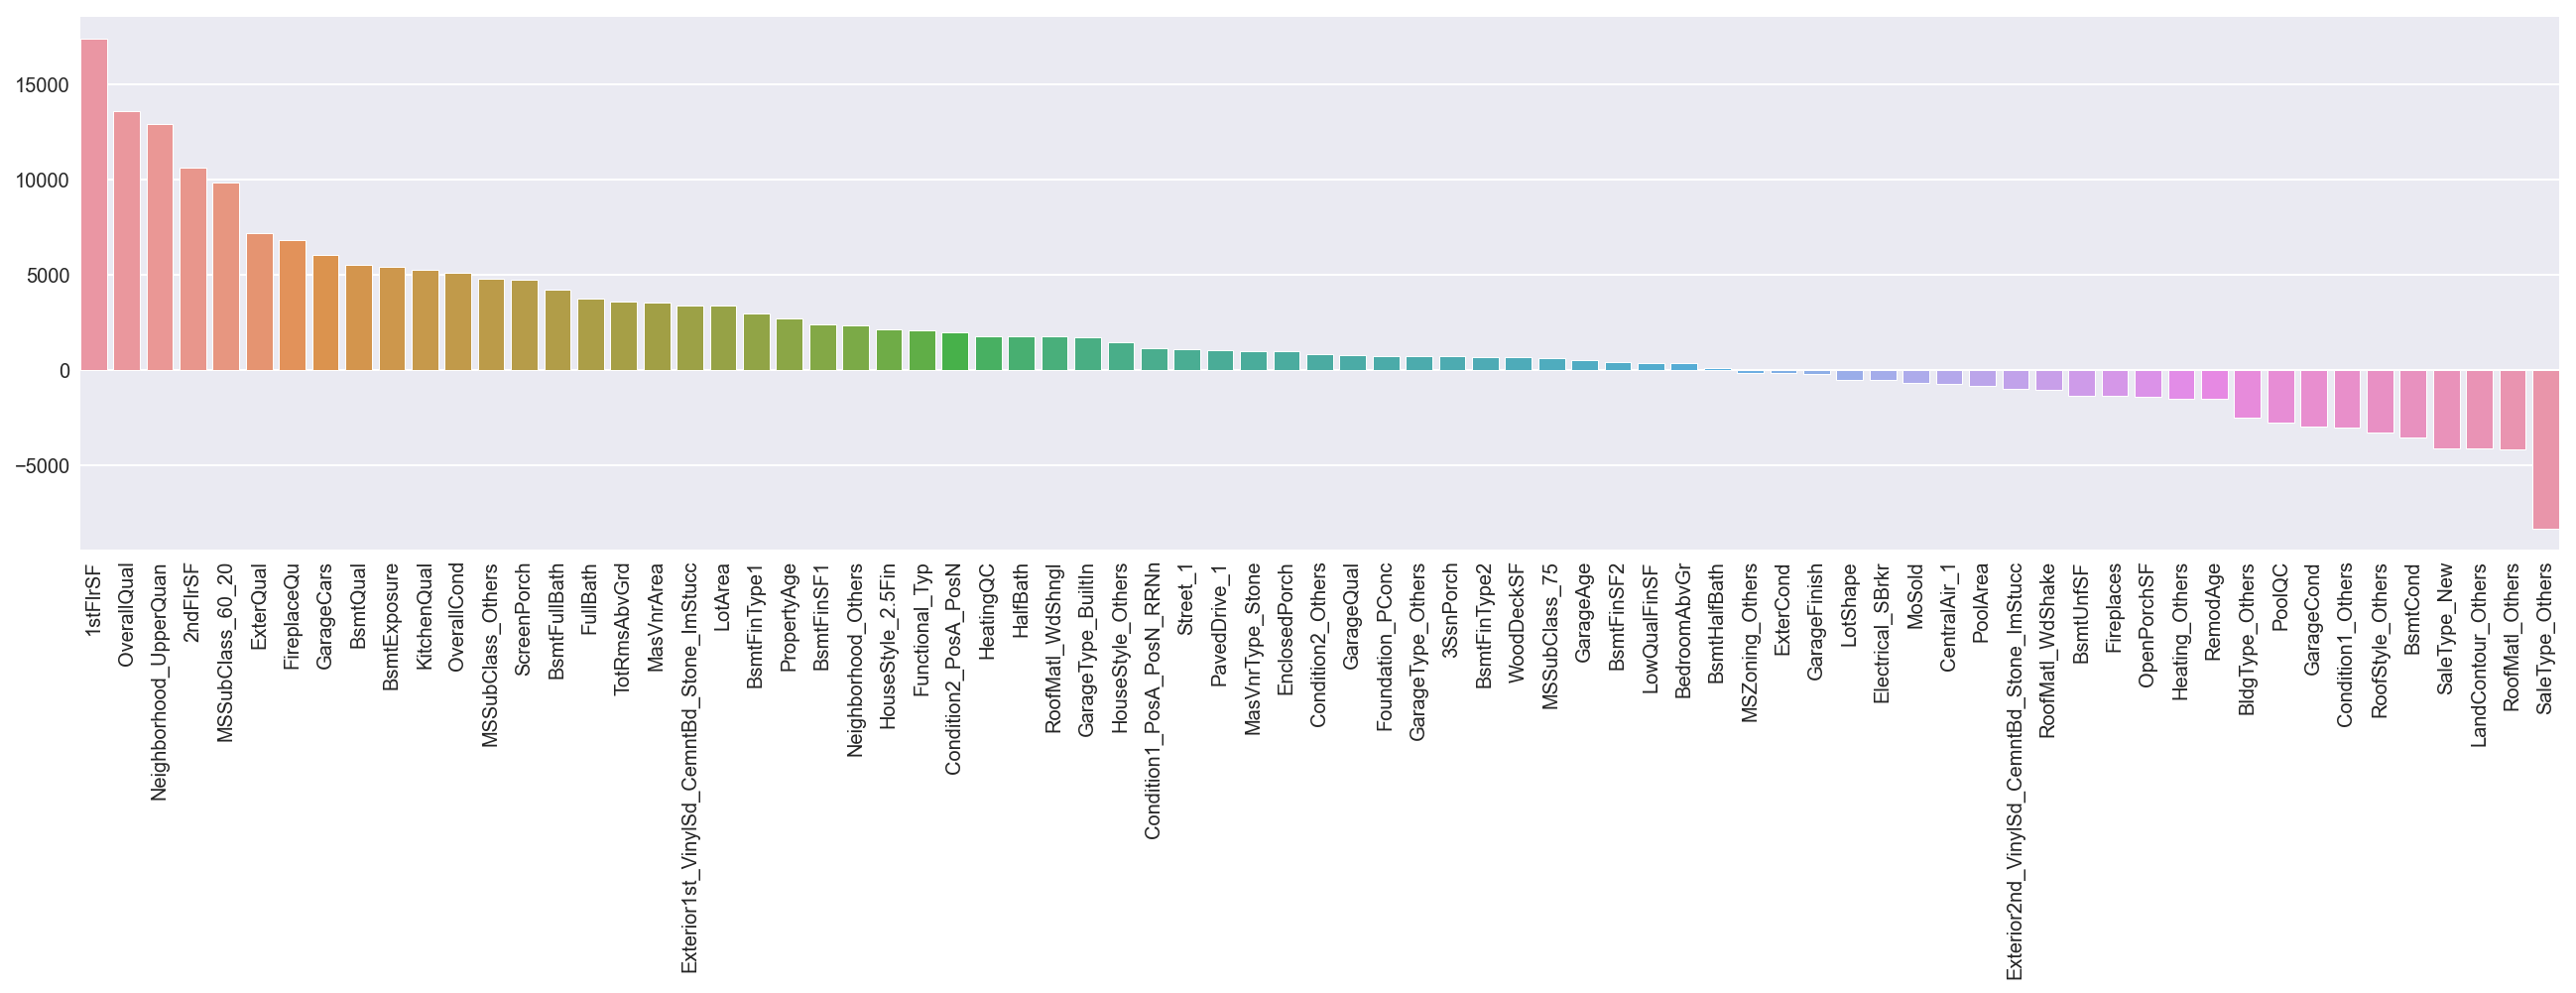

In [22]:
# Visualise the coefficient distribution
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(data=lr_coef_df.T);

In [23]:
# Describe the coefficient.
lr_coef_df.describe()

lr_coef
count     75.000000
mean    1637.542313
std     4186.772820
min    -8353.951292
25%     -709.813323
50%      832.001593
75%     3395.718590
max    17447.925599

#### Plots Analysis

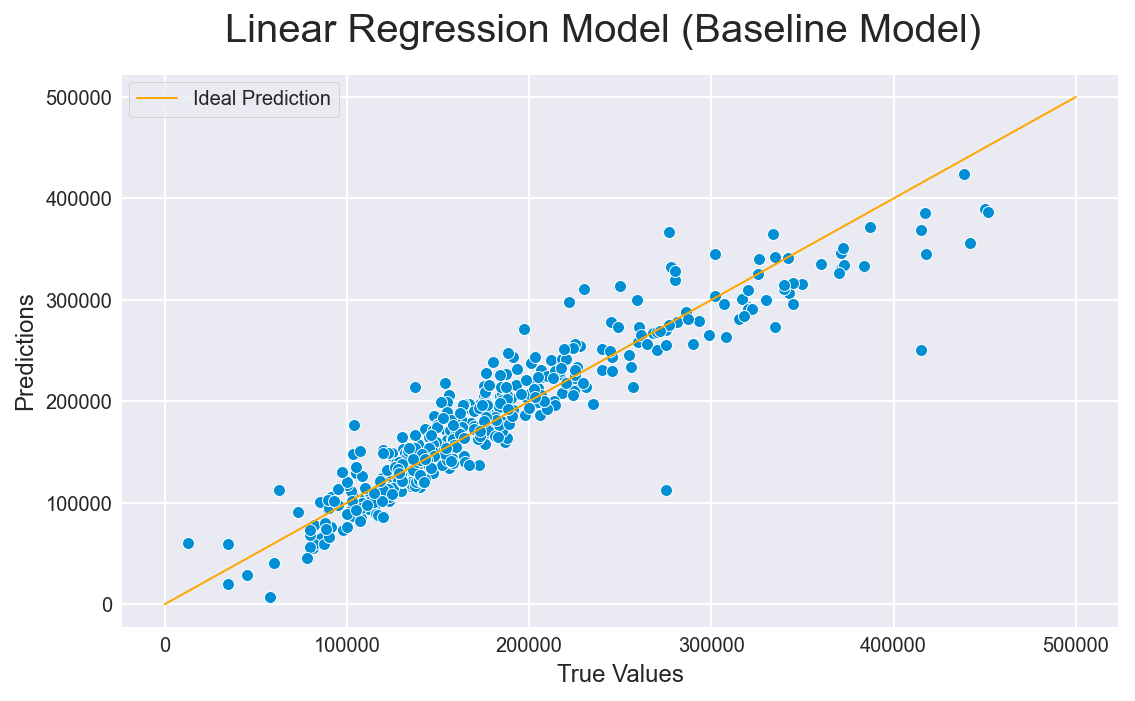

In [24]:
# Plot true values and predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_test)
sns.lineplot(x=[0, 500000], y=[0, 500000], linewidth=1, color='orange', label='Ideal Prediction')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Linear Regression Model (Baseline Model)", size=20)
plt.subplots_adjust(top=.9)
plt.legend()
plt.show()

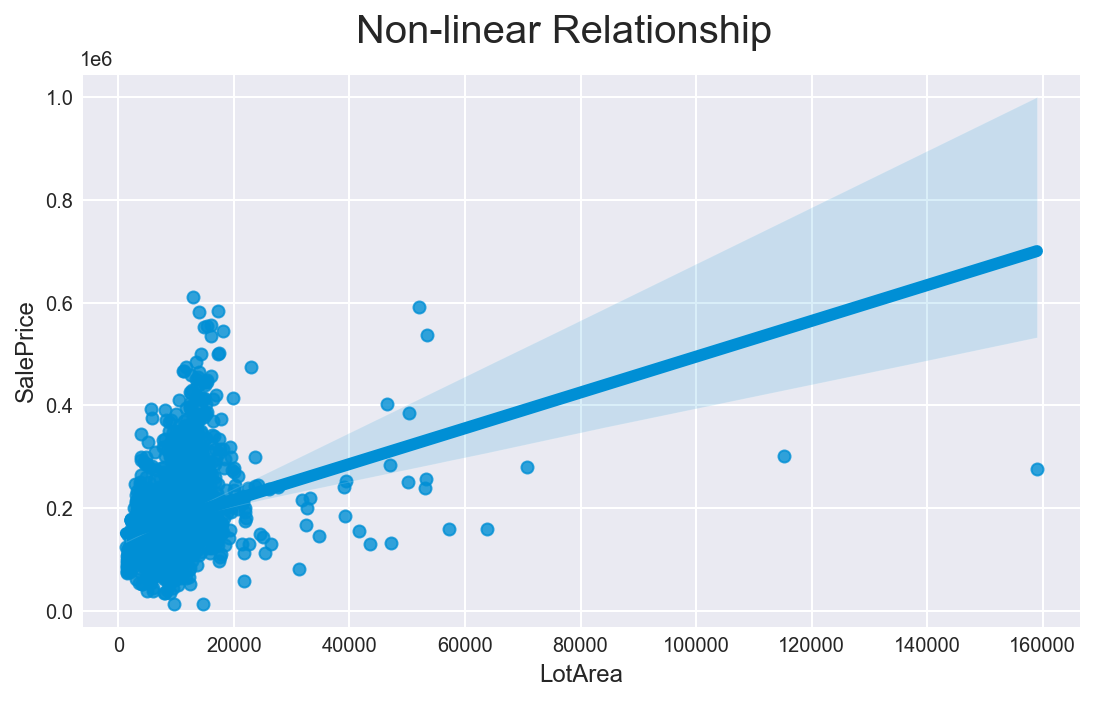

In [25]:
# L: Relationship between features and sale price is not linear
# PLot 'LotArea' against 'SalePrice' to check for linearity. 
plt.figure(figsize=(8,5))
sns.regplot(x=X['LotArea'], y=y)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.suptitle("Non-linear Relationship", size=20)
plt.subplots_adjust(top=.9)
plt.show()

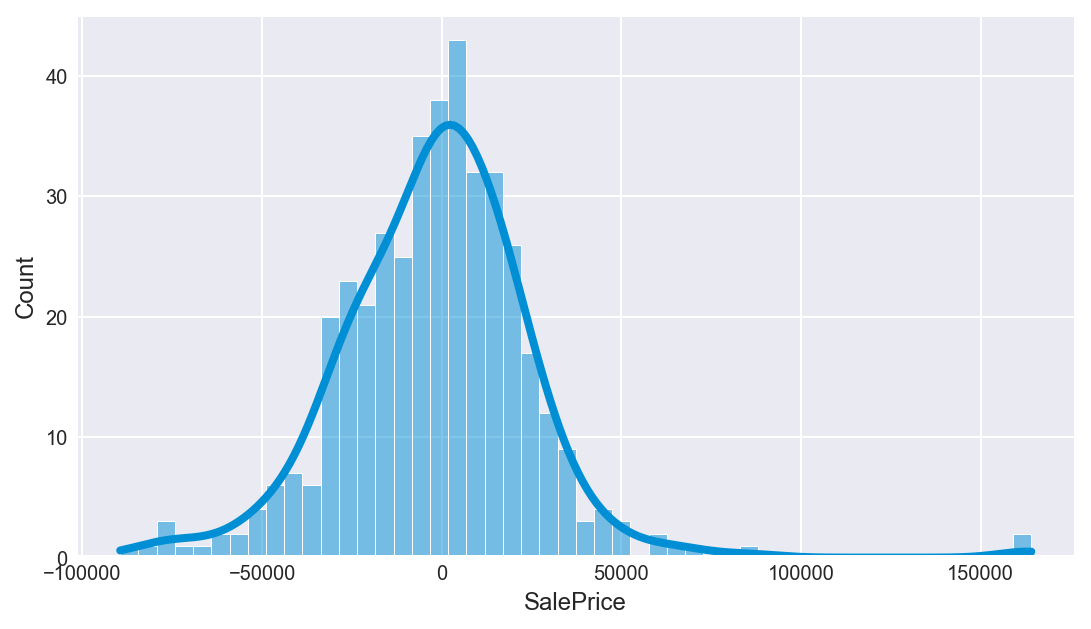

In [26]:
# N: Normally distributed errors
resids = y_test-y_pred_test

plt.figure(figsize=(8,5))
sns.histplot(resids, bins=50, kde=True);

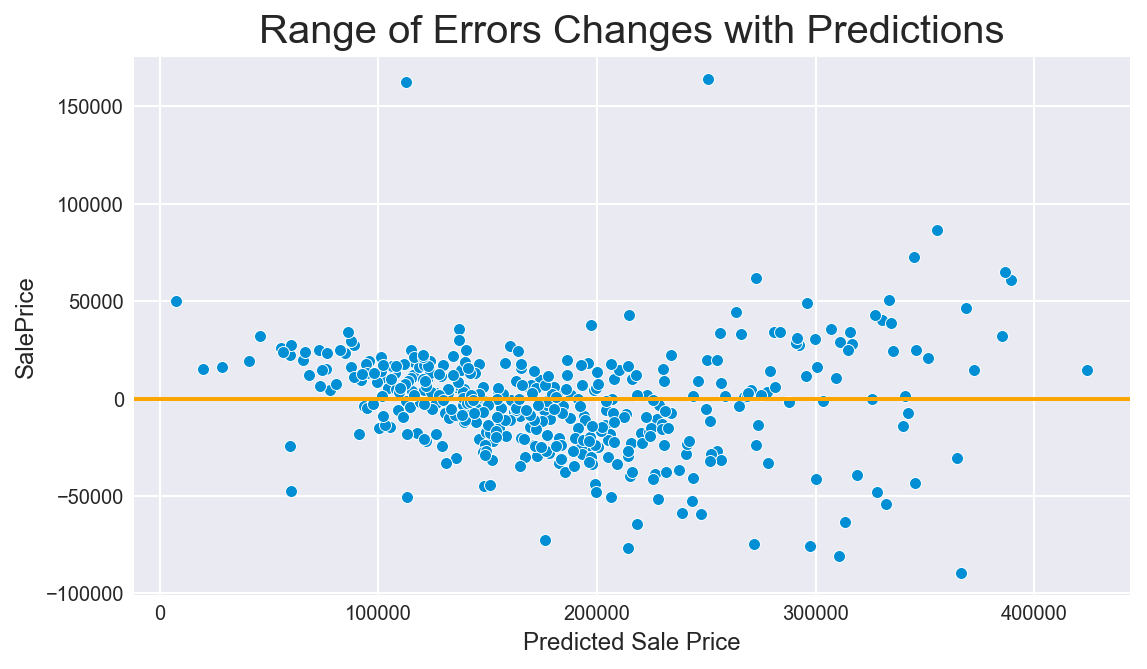

In [27]:
# E: Range of errors actually change. 
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test, y=resids);
plt.axhline(0, color="orange", linewidth=2);
plt.xlabel("Predicted Sale Price");
plt.title('Range of Errors Changes with Predictions', size=20);

From the heatmap below, the darker red and blue cell indicate that there are still some features that have significant correlation. 

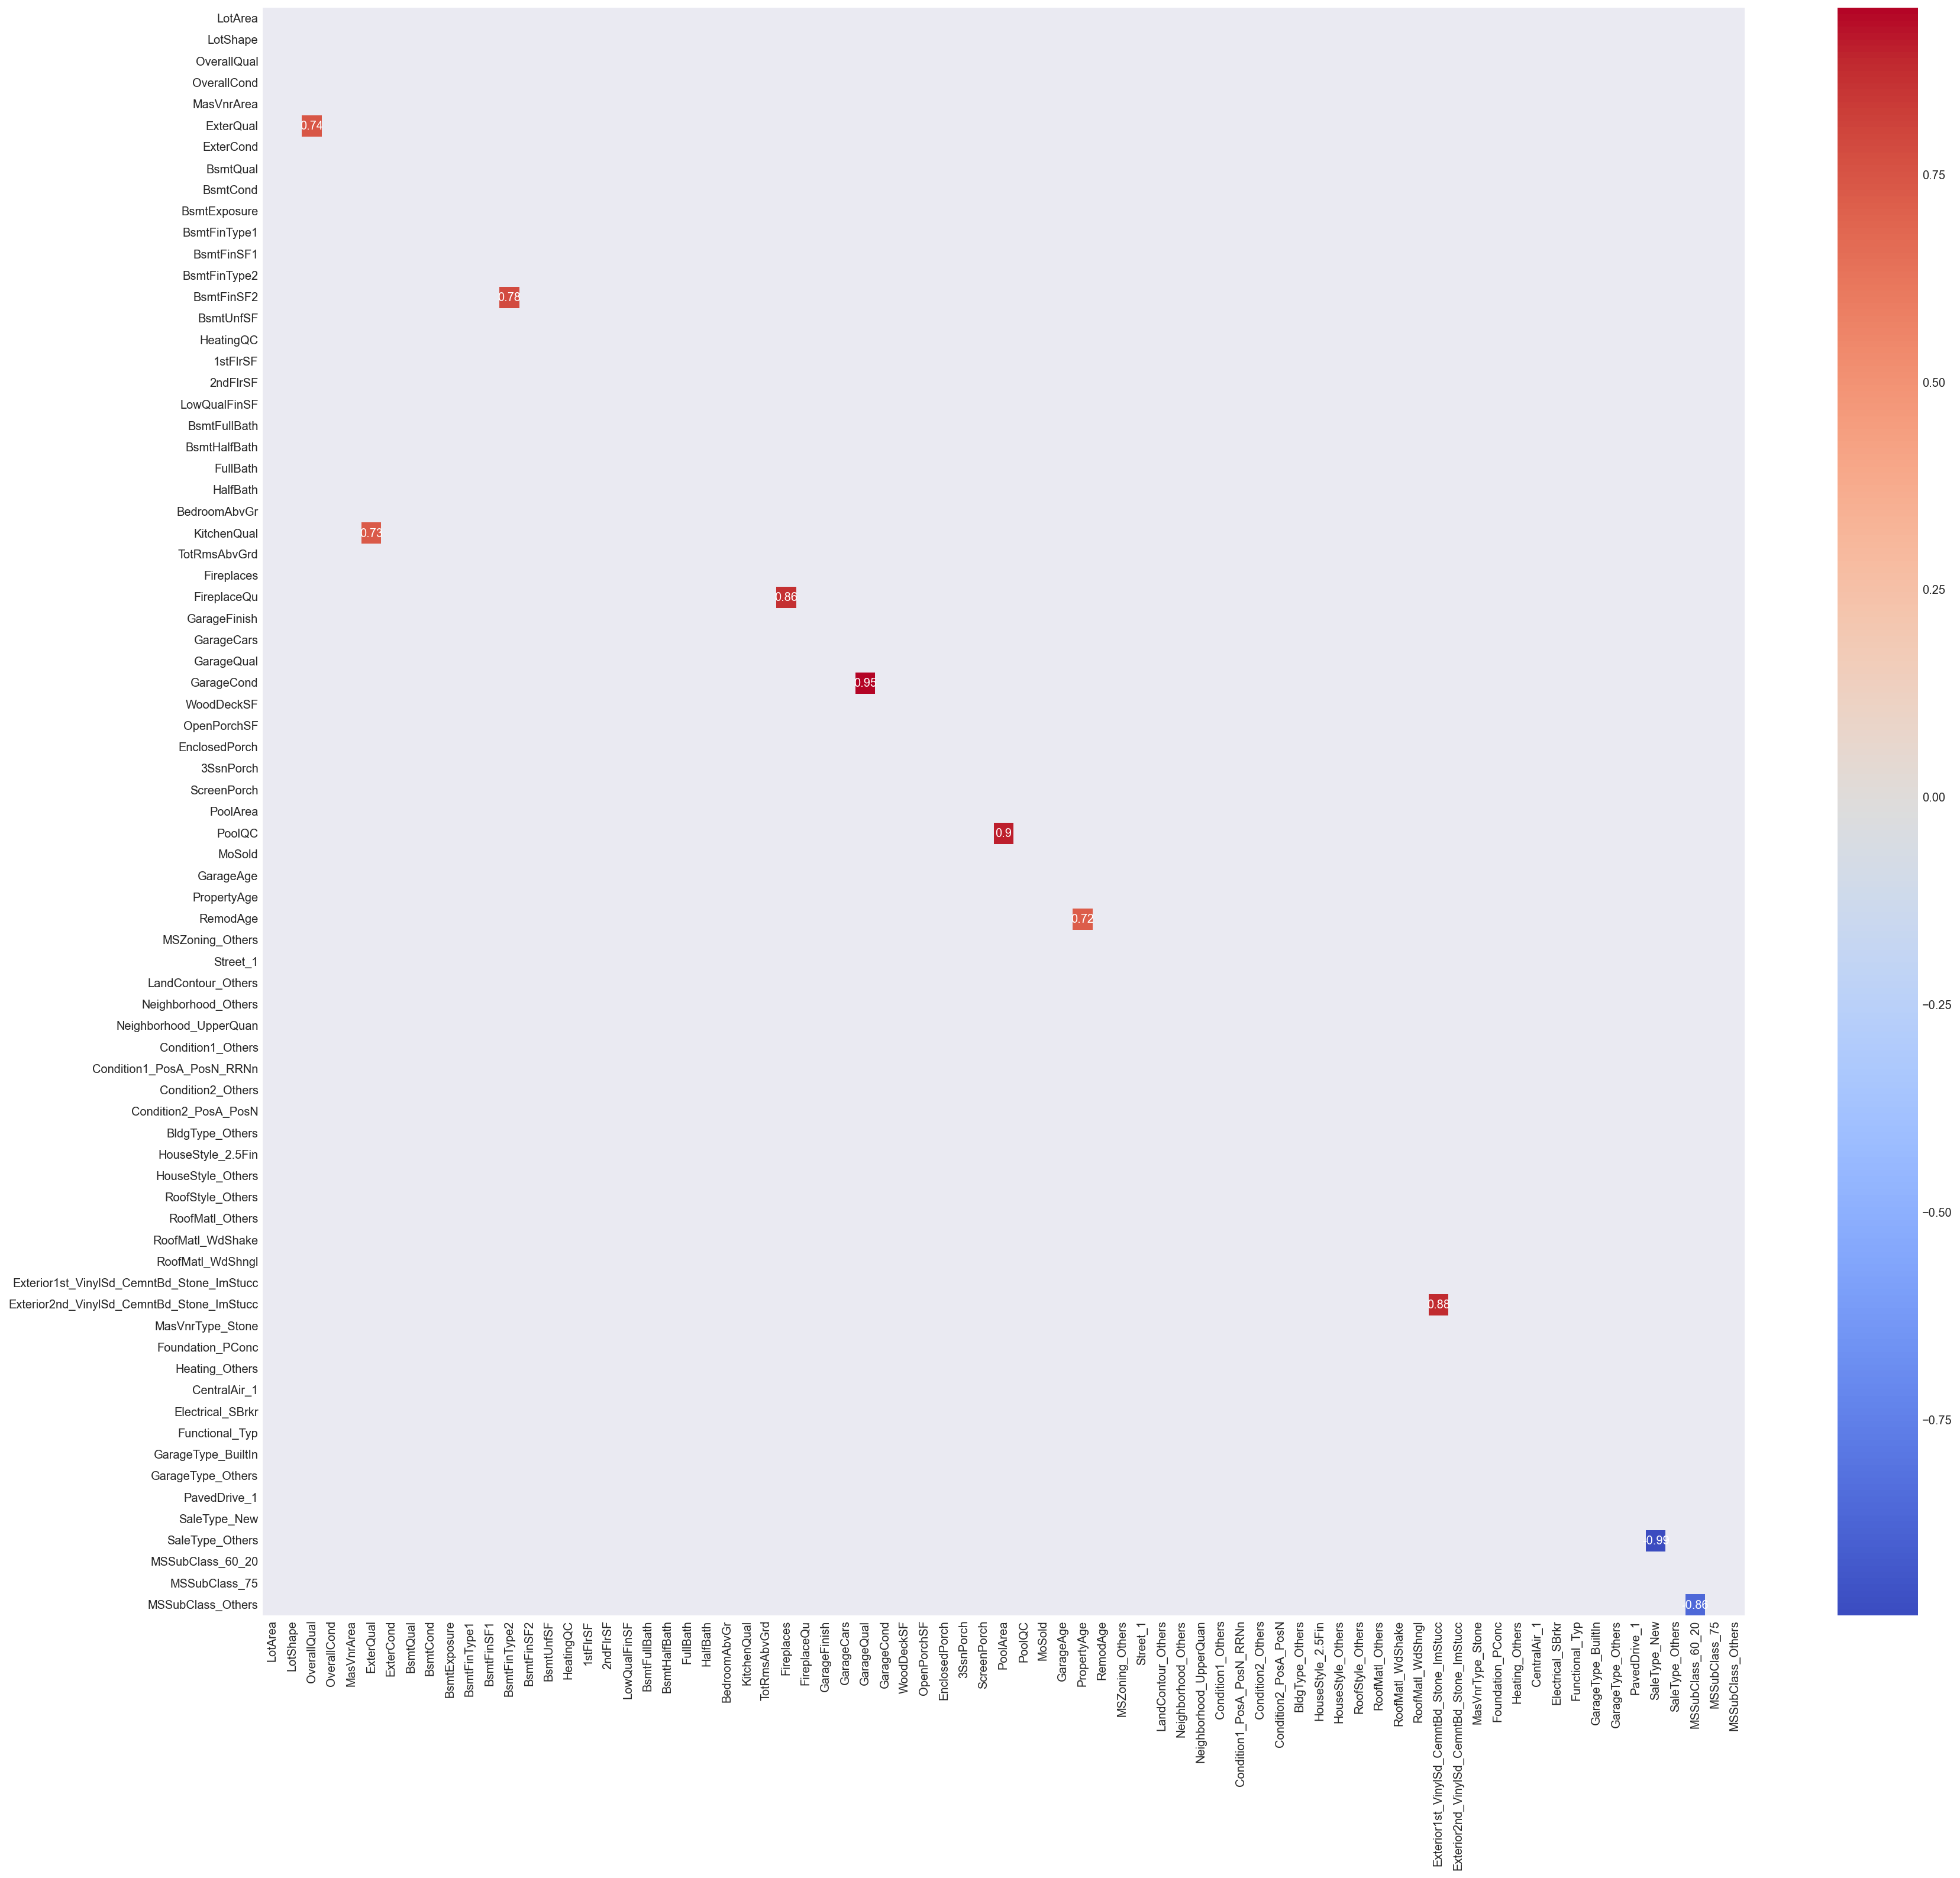

In [28]:
# M - Multicollinearity/Independence of Predictors still exist in the data set.
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 25))
sns.heatmap(X.corr()[abs(X.corr())>0.7], cmap='coolwarm', annot=True, mask = mask);

#### Scoring the Model

Scoring is based on Root Mean Square Error (RMSE). It is a metric that compute the average distance between the predicted values from the model and the actual values in the dataset.

In [29]:
# Compute RMSE score on the X_train data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

28446.40171475203

In [30]:
# Compute RMSE score on the X_test data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

27062.83262026084

In [31]:
# Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
np.sqrt(-1*cross_val_score(lr_base, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

33516.86350376669

#### Model Evaluation
1. The RMSE of the training data and test data are 28446 and 27062. The model seems to perform better on test data set and this is unusual. It is likely due to:
    - The two anomaly result identified earlier in under EDA was not removed. Hence, it may have contributed to the larger error in the training data. 
2. The model has a cross validation RMSE of 33517 on the train data. This means that the average price difference between the prediction and the actual sale price is \$33,517.  
3. From the difference in testing and training RMSE, it can be concluded that the model is underfitting the X_train data set (high Bias, low Varience). 
4. Assessment on the linearity assumptions:
    - L: As an example, the scatter plot of one of the feature against sale price shows that there is no absolute linearity. It seems to be curved. 
    - E: The range of errors changes.
    - M: Multicollinearity/Independence of Predictors still exist in the data set. Heatmap display some significant correlations, which may require further assessments to finetune the model. 
4. As the test RMSE still differ significantly from the cross validation RSME, the model requires further tuning. 
5. The linear model built on 75 model did not perform well. To minimise the biasness, regularization will be performed using Lasso and Ridge. 



### b. Model 2: Ridge Model
Ridge regression atempts to shrinks our regression coefficients closer to zero to make our model simpler.

#### Create the Ridge Model

In [32]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_sc, y_train)


RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='neg_mean_squared_error')

In [33]:
# Display optimal value of alpha
ridge_cv.alpha_

335.1602650938841

In [34]:
# Fit model using optimal value of alpha
ridge_base = Ridge(alpha=ridge_cv.alpha_)
ridge_base.fit(X_train_sc, y_train);

# generate predictions based on X_test set. 
y_pred_train = ridge_base.predict(X_train_sc)

# generate predictions based on X_test set. 
y_pred_test = ridge_base.predict(X_test_sc)

#### Assessment on coefficients
The coefficient ranges from -3930 to 10974. The highest coefficient of 10974 correspond to overall quality. This may be intepreted as an increase in 1 quality level corresponds to an increase in sale price of \$10,974,  holding all else constant. Refer to bar plot below. 


In [35]:
# Show coefficient of ridge_base
ridge_base.coef_

array([ 3.99195608e+03, -7.55743074e+02,  1.09740365e+04,  3.70143938e+03,
        4.64830172e+03,  6.67144390e+03,  2.44217612e+02,  3.94309459e+03,
       -2.18537130e+03,  4.88946093e+03,  2.71465344e+03,  4.67729869e+03,
        4.85191513e+02,  1.23554724e+03,  8.04509214e+02,  1.87291793e+03,
        9.71812945e+03,  5.51377003e+03,  4.77409132e+01,  3.59400764e+03,
       -4.20917894e+02,  4.37860070e+03,  2.16083635e+03,  1.58648197e+03,
        6.09604415e+03,  6.33370584e+03,  1.87838800e+03,  4.90763648e+03,
        5.87805328e+02,  5.69349586e+03, -1.73712966e+02, -6.96345062e+02,
        1.12857228e+03, -1.06184282e+02,  1.03142297e+03,  9.22066264e+02,
        4.17496384e+03, -1.56663560e+03, -1.39909478e+03, -4.12295709e+02,
       -2.56033583e+02, -3.27592005e+02,  3.09036917e+02, -9.75809542e+02,
        8.35862966e+02, -3.93055121e+03, -5.16899354e+02,  9.24865454e+03,
       -2.64050762e+03,  1.31898766e+03,  5.75787288e+02,  2.09352104e+03,
       -2.17934064e+03,  

In [36]:
# Display the model coefficient
ridge_coef_df = pd.DataFrame(data=ridge_base.coef_, index=X_train.columns, columns=['ridge_coef'])
ridge_coef_df

ridge_coef
LotArea             3991.956080
LotShape            -755.743074
OverallQual        10974.036460
OverallCond         3701.439382
MasVnrArea          4648.301720
...                         ...
SaleType_New        1935.435618
SaleType_Others    -2430.543179
MSSubClass_60_20    3914.258961
MSSubClass_75        345.652492
MSSubClass_Others     -7.143007

[75 rows x 1 columns]

In [37]:
# sort coef from highest to lowest
ridge_coef_df = ridge_coef_df.sort_values(by='ridge_coef', ascending=False)
ridge_coef_df

ridge_coef
OverallQual             10974.036460
1stFlrSF                 9718.129450
Neighborhood_UpperQuan   9248.654537
ExterQual                6671.443901
TotRmsAbvGrd             6333.705841
...                              ...
SaleType_Others         -2430.543179
Condition1_Others       -2640.507618
RoofMatl_Others         -3143.137132
RoofStyle_Others        -3479.918167
LandContour_Others      -3930.551212

[75 rows x 1 columns]

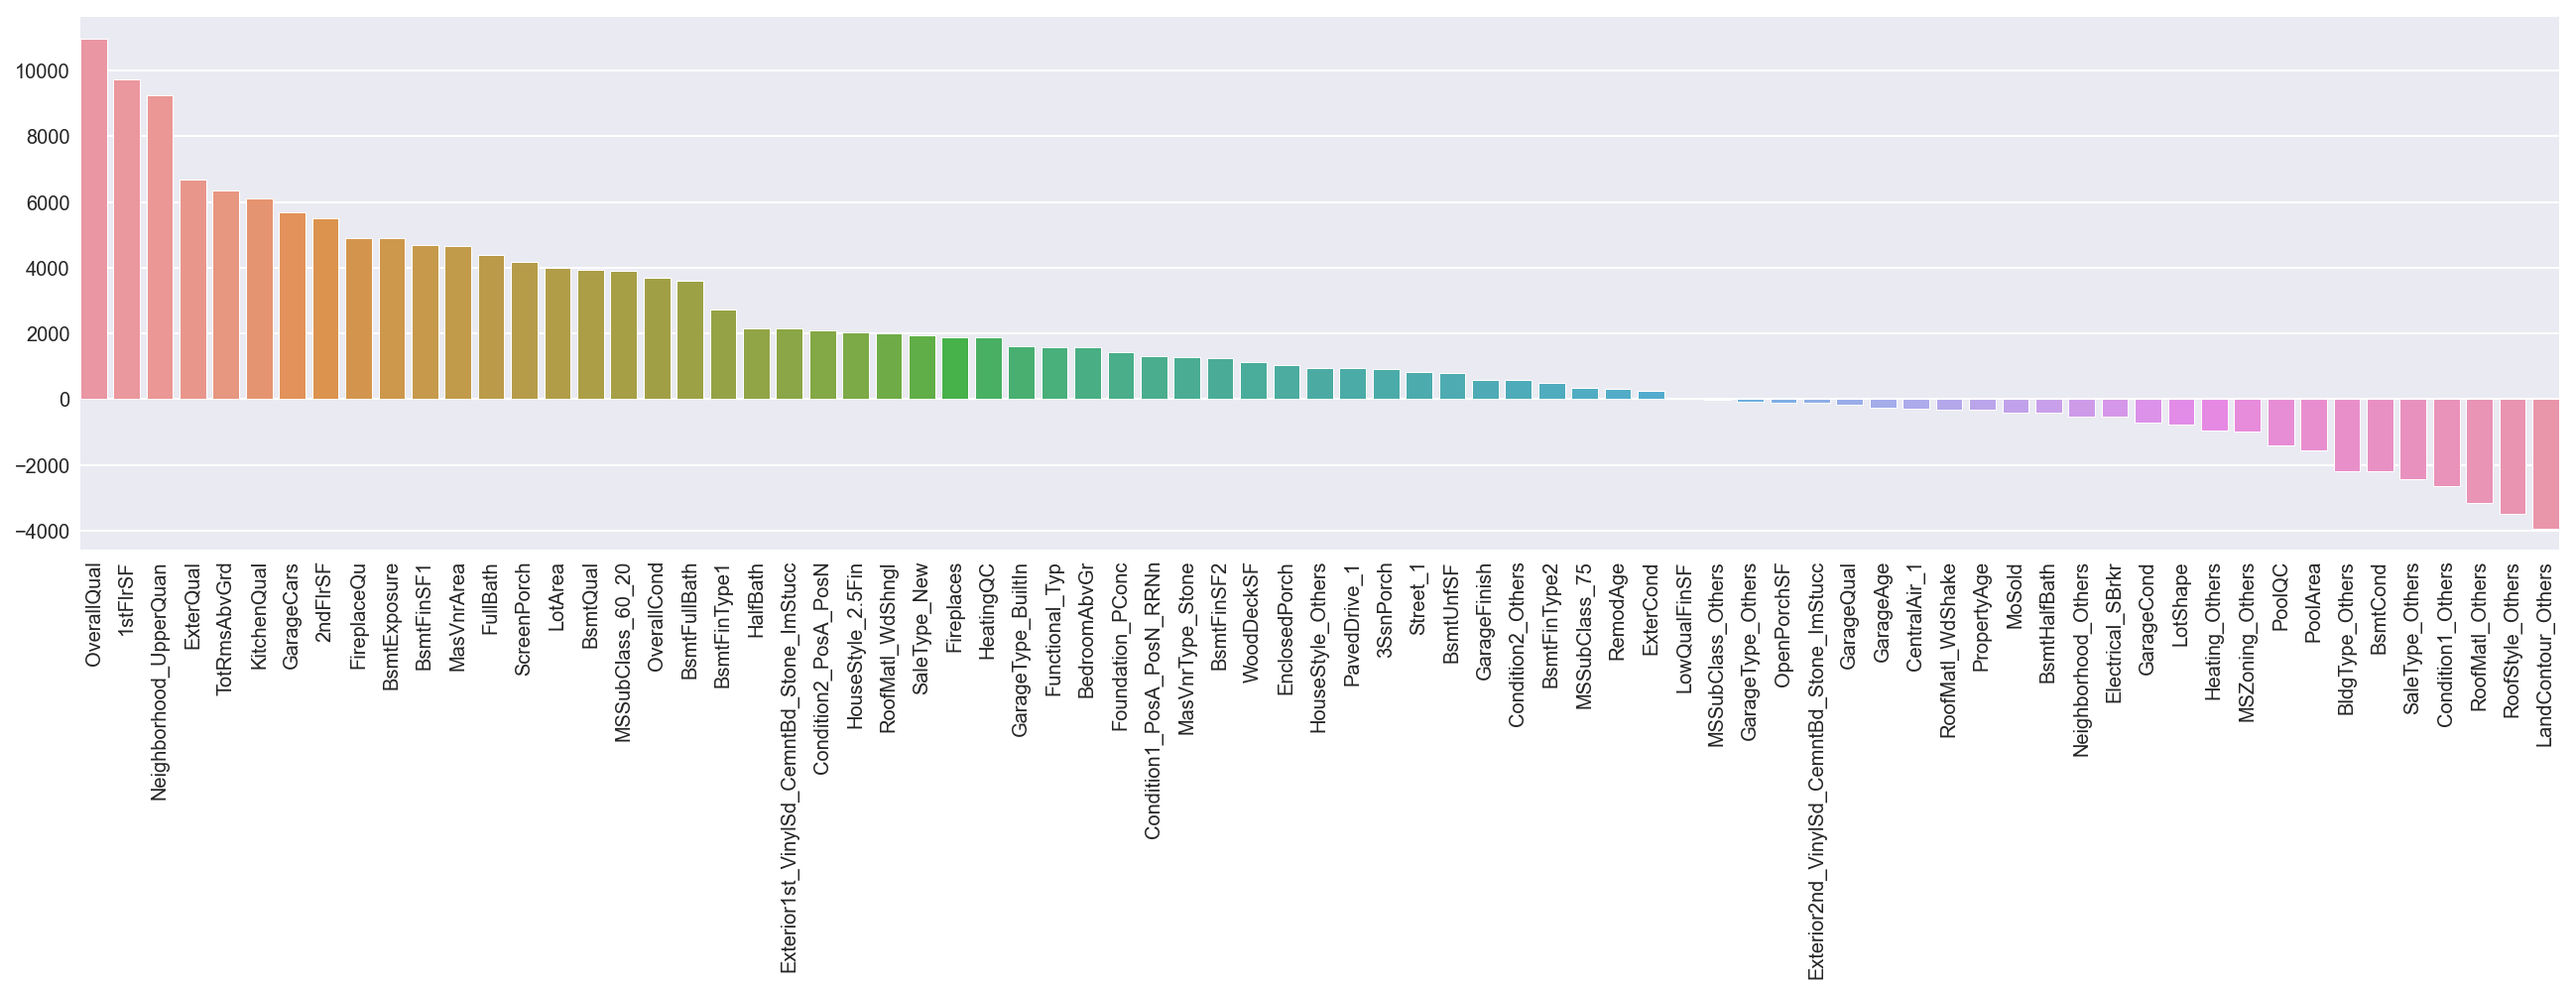

In [38]:
# Visualise the coefficient distribution
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(data=ridge_coef_df.T);

In [39]:
# Describe the coefficient.
ridge_coef_df.describe()

ridge_coef
count     75.000000
mean    1537.485678
std     2940.515159
min    -3930.551212
25%     -294.763074
50%      942.477709
75%     3154.330542
max    10974.036460

In [40]:
ridge_coef_df[ridge_coef_df['ridge_coef'].between(-100, 100)]

ridge_coef
LowQualFinSF        47.740913
MSSubClass_Others   -7.143007
GarageType_Others  -85.569252

#### Plotting True Sale Price against Predicted Sale Price

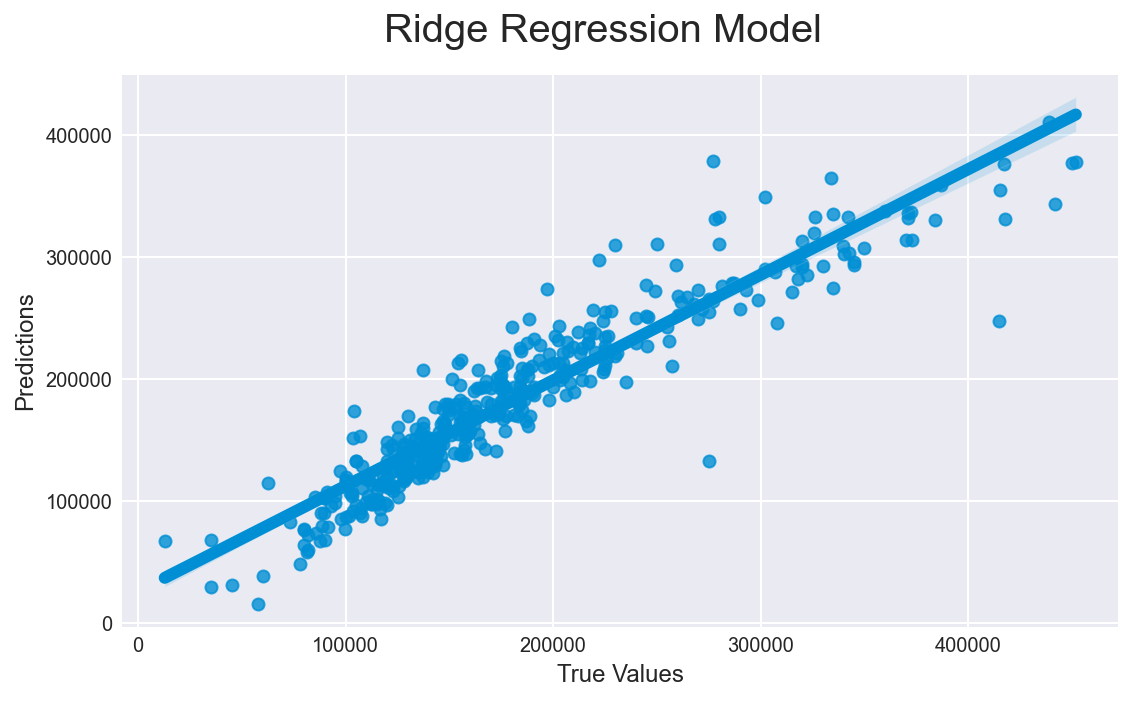

In [41]:
# Plot true values and predicted values
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Ridge Regression Model", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#### Scoring the Model

Scoring is based on Root Mean Square Error (RMSE). It is a metric that compute the average distance between the predicted values from the model and the actual values in the dataset.

In [42]:
# Compute RMSE score on the X_train data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

29084.464705959923

In [43]:
# Compute RMSE score on the X_test data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

27556.94571810025

In [44]:
# Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
np.sqrt(-1*cross_val_score(ridge_base, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

31492.76552655488

#### Model Evaluation
1. The RMSE of the training data and test data are 29084 and 27557. The model seems to perform better on test data set and this is unusual. It is likely due to:
    - The two anomaly result identified earlier in under EDA was not removed. Hence, it may have contributed to the larger error in the training data. 
2. The model has a cross validation RMSE of 31492 on the train data. This means that the average price difference between the prediction and the actual sale price is \$31,492.
3. Overall, the ridge model performs better than the baseline linear model (RMSE score of 33,517).  
4. From the difference in testing and training RMSE, it can be concluded that the model is underfitting the X_train data set (high Bias, low Varience). 
5. As the test RMSE still differ significantly from the cross validation RSME, the model requires further tuning. 
6. The linear model built on 75 model did not perform well. 



### c. Model 3: Lasso Model
Lasso regression attempts to shrinks our regression coefficients closer to zero to make our model simpler.

#### Create the Lasso Model

In [45]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, max_iter=50000)

In [46]:
# Display optimal value of alpha
lasso_cv.alpha_

533.6699231206308

In [47]:
# Fit model using optimal value of alpha
lasso_base = Lasso(alpha=lasso_cv.alpha_)
lasso_base.fit(X_train_sc, y_train);

# generate predictions based on X_test set. 
y_pred_train = lasso_base.predict(X_train_sc)

# generate predictions based on X_test set. 
y_pred_test = lasso_base.predict(X_test_sc)

#### Assessment on coefficients
The coefficient ranges from -3930 to 10974. The highest coefficient of 10974 correspond to overall quality. This may be intepreted as an increase in 1 quality level corresponds to an increase in sale price of \$10,974,  holding all else constant. Refer to bar plot below. 


In [48]:
# Show coefficient of lasso_base
lasso_base.coef_

array([ 3712.80870467,  -229.56074901, 14319.36989884,  3894.22345573,
        3692.8263886 ,  6577.60684697,     0.        ,  3687.22292363,
       -1618.64453944,  5282.18986208,  2374.31736383,  3615.76494453,
          58.62648339,   644.35208757,    -0.        ,  1382.96334211,
       15023.05945362, 10196.29184457,     0.        ,  3829.20617164,
          -0.        ,  2927.91663736,   906.51845342,     0.        ,
        5561.35960428,  5320.9074594 ,     0.        ,  5519.28586295,
           0.        ,  5423.30794151,    -0.        ,  -672.37551397,
         339.88611539,  -482.135086  ,   239.6850445 ,   402.35864019,
        4197.94149487,  -896.93843896, -2211.01116024,    -0.        ,
          -0.        ,    -0.        ,     0.        ,  -226.13966877,
         614.50130995, -4158.25605698,    66.31731221, 10887.75616725,
       -2317.584825  ,  1006.8262341 ,    19.97473785,  1633.74020149,
       -1653.66838115,  1708.71843535,  1019.87891742, -3137.98864086,
      

In [49]:
# Display the model coefficient
lasso_coef_df = pd.DataFrame(data=lasso_base.coef_, index=X_train.columns, columns=['lasso_coef'])
lasso_coef_df

lasso_coef
LotArea             3712.808705
LotShape            -229.560749
OverallQual        14319.369899
OverallCond         3894.223456
MasVnrArea          3692.826389
...                         ...
SaleType_New           0.000000
SaleType_Others    -3711.846092
MSSubClass_60_20    5217.389012
MSSubClass_75          0.000000
MSSubClass_Others      0.000000

[75 rows x 1 columns]

In [50]:
# sort coef from highest to lowest
lasso_coef_df = lasso_coef_df.sort_values(by='lasso_coef', ascending=False)
lasso_coef_df

lasso_coef
1stFlrSF                15023.059454
OverallQual             14319.369899
Neighborhood_UpperQuan  10887.756167
2ndFlrSF                10196.291845
ExterQual                6577.606847
...                              ...
Condition1_Others       -2317.584825
RoofStyle_Others        -3137.988641
RoofMatl_Others         -3596.584903
SaleType_Others         -3711.846092
LandContour_Others      -4158.256057

[75 rows x 1 columns]

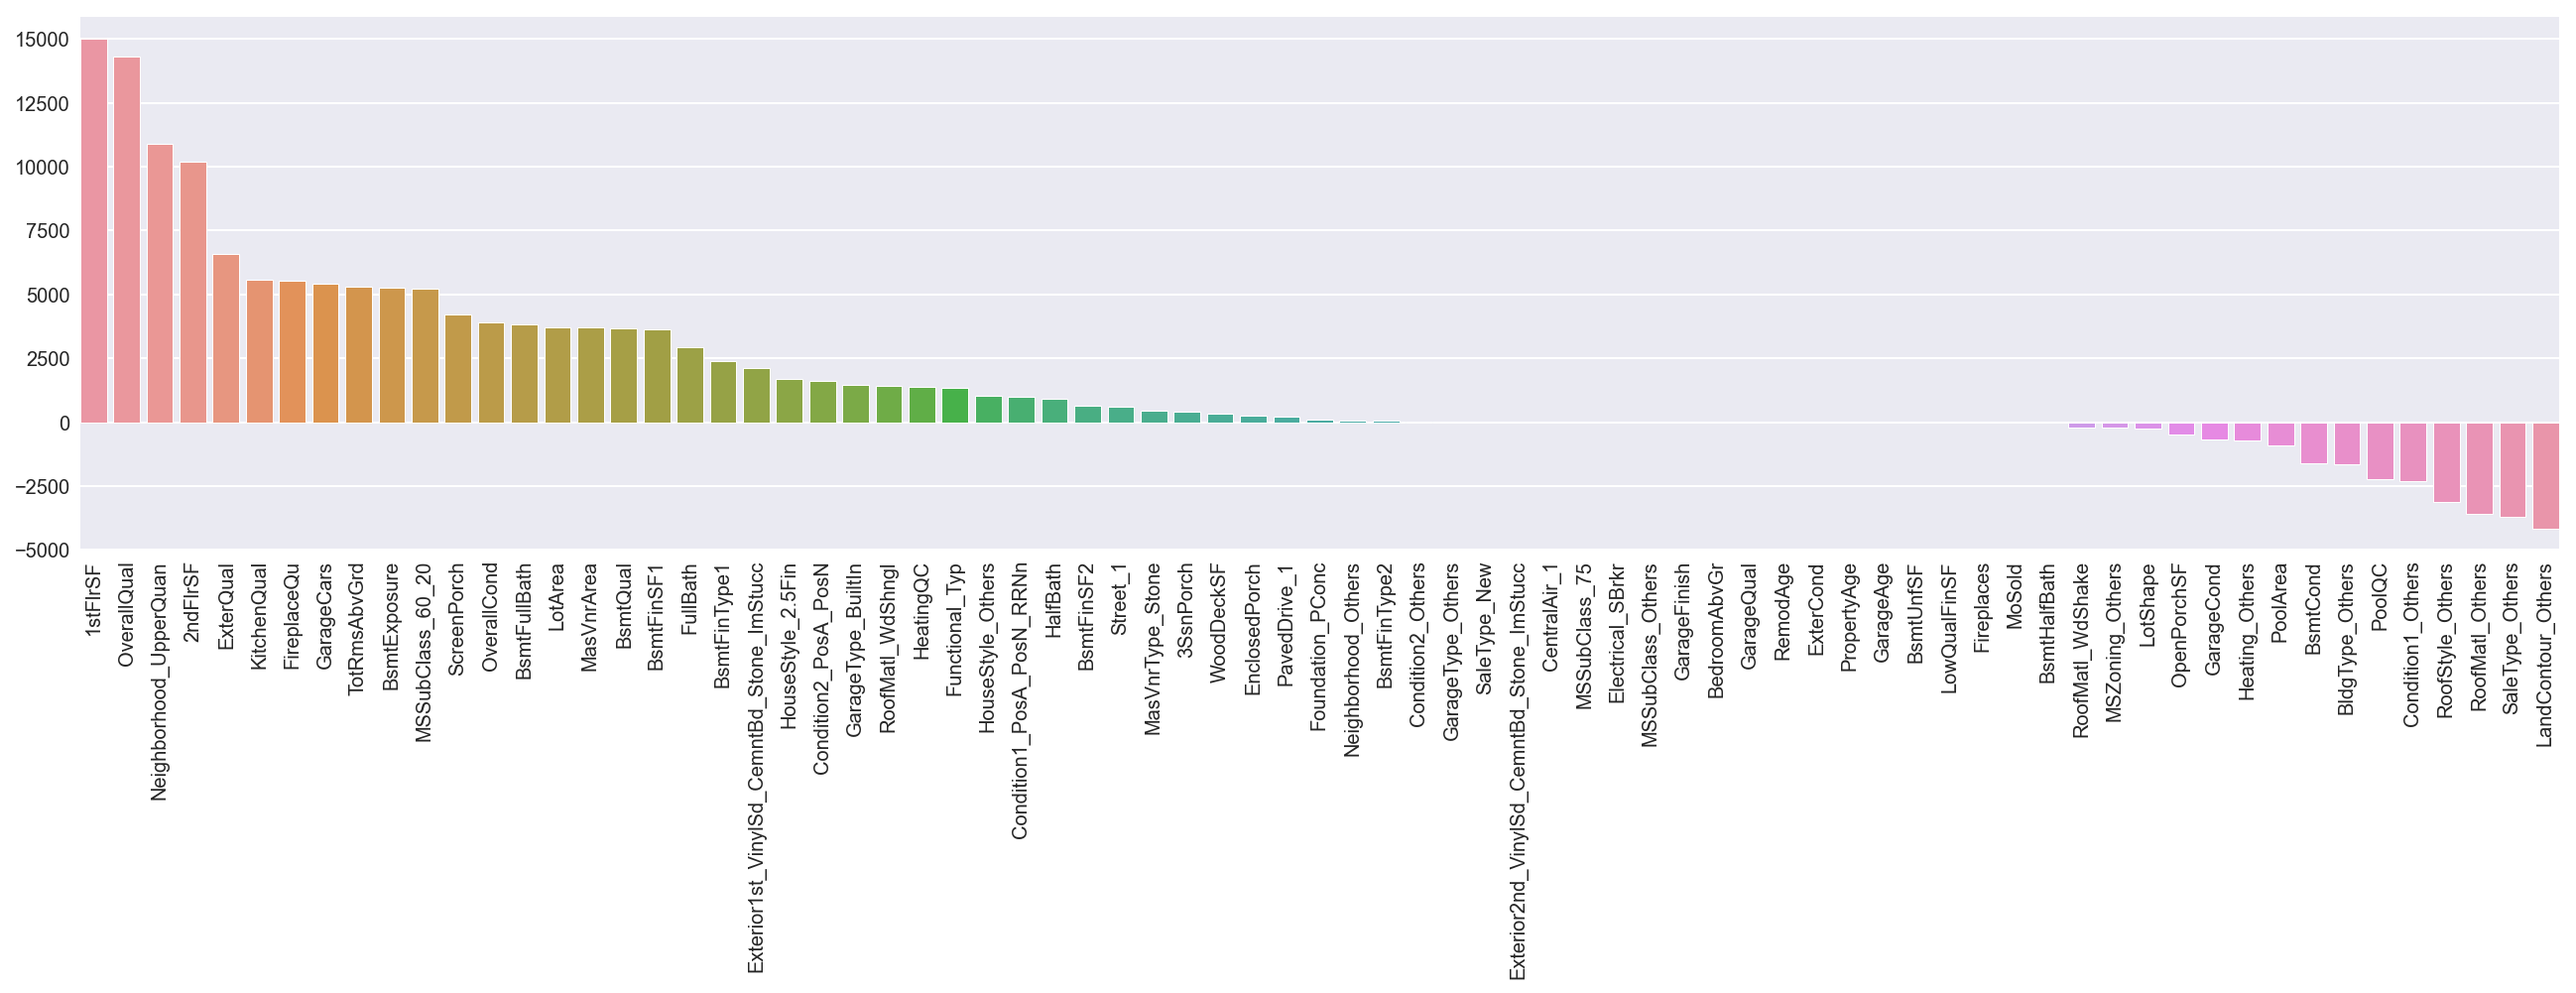

In [51]:
# Visualise the coefficient distribution
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(data=lasso_coef_df.T);

In [52]:
# Describe the coefficient.
lasso_coef_df.describe()

lasso_coef
count     75.000000
mean    1501.013334
std     3509.597840
min    -4158.256057
25%        0.000000
50%       84.649337
75%     2651.117001
max    15023.059454

In [53]:
lasso_coef_df[lasso_coef_df['lasso_coef']==0]

lasso_coef
GarageType_Others                                 0.0
SaleType_New                                      0.0
Exterior2nd_VinylSd_CemntBd_Stone_ImStucc         0.0
CentralAir_1                                     -0.0
MSSubClass_75                                     0.0
Electrical_SBrkr                                 -0.0
MSSubClass_Others                                 0.0
GarageFinish                                      0.0
BedroomAbvGr                                      0.0
GarageQual                                       -0.0
RemodAge                                          0.0
ExterCond                                         0.0
PropertyAge                                      -0.0
GarageAge                                        -0.0
BsmtUnfSF                                        -0.0
LowQualFinSF                                      0.0
Fireplaces                                        0.0
MoSold                                           -0.0
BsmtHalfBath                                     -0.0

In [54]:
zero_coef_features=lasso_coef_df[lasso_coef_df['lasso_coef']==0].index
zero_coef_features

Index(['GarageType_Others', 'SaleType_New',
       'Exterior2nd_VinylSd_CemntBd_Stone_ImStucc', 'CentralAir_1',
       'MSSubClass_75', 'Electrical_SBrkr', 'MSSubClass_Others',
       'GarageFinish', 'BedroomAbvGr', 'GarageQual', 'RemodAge', 'ExterCond',
       'PropertyAge', 'GarageAge', 'BsmtUnfSF', 'LowQualFinSF', 'Fireplaces',
       'MoSold', 'BsmtHalfBath'],
      dtype='object')

#### Plotting True Sale Price against Predicted Sale Price

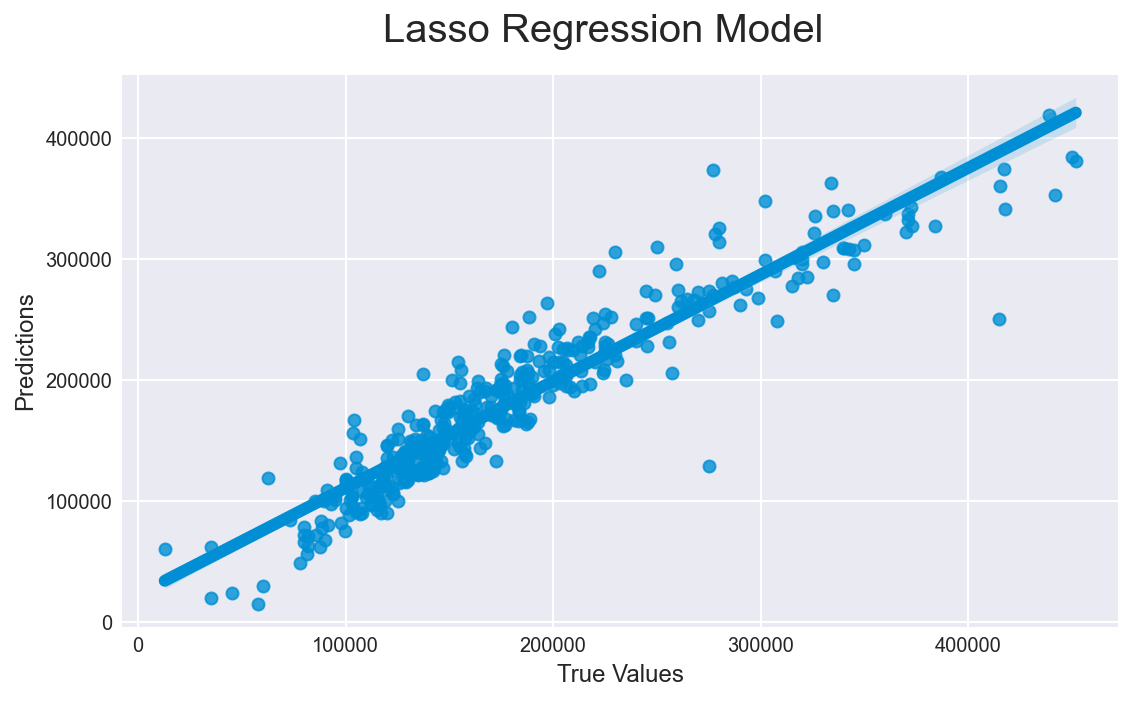

In [55]:
# Plot true values and predicted values
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Lasso Regression Model", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#### Scoring the Model

Scoring is based on Root Mean Square Error (RMSE). It is a metric that compute the average distance between the predicted values from the model and the actual values in the dataset.

In [56]:
# Compute RMSE score on the X_train data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

28830.481774446376

In [57]:
# Compute RMSE score on the X_test data set for linear regression base model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

26462.60691686392

In [58]:
# Compute cross_val_score (RMSE) on the X_train data set for linear regression base model
np.sqrt(-1*cross_val_score(lasso_base, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

31960.69837592283

#### Model Evaluation
1. The RMSE of the training data and test data are 28830 and 26462. The model seems to perform better on test data set and this is unusual. It is likely due to:
    - The two anomaly result identified earlier in under EDA was not removed. Hence, it may have contributed to the larger error in the training data. 
2. The model has a cross validation RMSE of 31960 on the train data. This means that the average price difference between the prediction and the actual sale price is \$31,960.
3. Overall, the lasso model performs better than the baseline linear model (RMSE score of 33,517) and comparable to the ridge model (31,492). 
4. From the difference in training and testing RMSE, it can be concluded that the model is underfitting the X_train data set (high Bias, low Varience). 
5. As the test RMSE still differ significantly from the cross validation RSME, the model requires further tuning. 
6. The linear model built on 75 model did not perform well. 



### d. Model 4: Ridge Model

#### Configure data set for subsequent modelling
1. Remove anomalies identified in [Part a](#a.-Model-1:-Linear-Regression-Model-(Baseline-Model))
2. Remove columns with zero lasso coefficient in [Part c](#c.-Lasso-Model).

In [59]:
# Identify outliers in train data set. 
X[X['BsmtFinSF1']>4000]

LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  ExterQual  \
960   63887.0         1           10            5       796.0          5   
1885  39290.0         3           10            5      1224.0          5   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
960           3         5         3             4             6      5644.0   
1885          3         5         3             4             6      4010.0   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  1stFlrSF  2ndFlrSF  \
960              1         0.0      466.0          5    4692.0     950.0   
1885             1         0.0     1085.0          5    5095.0       0.0   

      LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
960            0.0             2             0         2         1   
1885           0.0             1             1         2         1   

      BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
960              3            5            12           3            4   
1885             2            5            15           2            4   

      GarageFinish  GarageCars  ...  LandContour_Others  Neighborhood_Others  \
960              3           2  ...                   1                    0   
1885             3           3  ...                   1                    0   

      Neighborhood_UpperQuan  Condition1_Others  Condition1_PosA_PosN_RRNn  \
960                        0                  1                          0   
1885                       0                  0                          0   

      Condition2_Others  Condition2_PosA_PosN  BldgType_Others  \
960                   0                     0                0   
1885                  0                     0                0   

      HouseStyle_2.5Fin  HouseStyle_Others  RoofStyle_Others  RoofMatl_Others  \
960                   0                  0                 0                1   
1885                  0                  0                 0                0   

      RoofMatl_WdShake  RoofMatl_WdShngl  \
960                  0                 0   
1885                 0                 0   

      Exterior1st_VinylSd_CemntBd_Stone_ImStucc  \
960                                           0   
1885                                          1   

      Exterior2nd_VinylSd_CemntBd_Stone_ImStucc  MasVnrType_Stone  \
960                                           0                 1   
1885                                          0                 1   

      Foundation_PConc  Heating_Others  CentralAir_1  Electrical_SBrkr  \
960                  1               0             1                 1   
1885                 1               0             1                 1   

      Functional_Typ  GarageType_BuiltIn  GarageType_Others  PavedDrive_1  \
960                1                   0                  0             1   
1885               1                   0                  0             1   

      SaleType_New  SaleType_Others  MSSubClass_60_20  MSSubClass_75  \
960              1                0                 1              0   
1885             1                0                 1              0   

      MSSubClass_Others  
960                   0  
1885                  0  

[2 rows x 75 columns]

In [60]:
# Drop outliers
X4 = X.drop(index=[960, 1885])
y4 = y.drop(index=[960, 1885])

In [61]:
# verify dataframe shape
X4.shape, y4.shape

((2049, 75), (2049,))

In [62]:
# recap features with zero coefficient. 
zero_coef_features

Index(['GarageType_Others', 'SaleType_New',
       'Exterior2nd_VinylSd_CemntBd_Stone_ImStucc', 'CentralAir_1',
       'MSSubClass_75', 'Electrical_SBrkr', 'MSSubClass_Others',
       'GarageFinish', 'BedroomAbvGr', 'GarageQual', 'RemodAge', 'ExterCond',
       'PropertyAge', 'GarageAge', 'BsmtUnfSF', 'LowQualFinSF', 'Fireplaces',
       'MoSold', 'BsmtHalfBath'],
      dtype='object')

In [63]:
# Drop zero_coef_features in X.
X4 = X4.drop(columns=zero_coef_features)

In [64]:
# verify the size of X, y
X4.shape, y4.shape

((2049, 56), (2049,))

#### Run Models

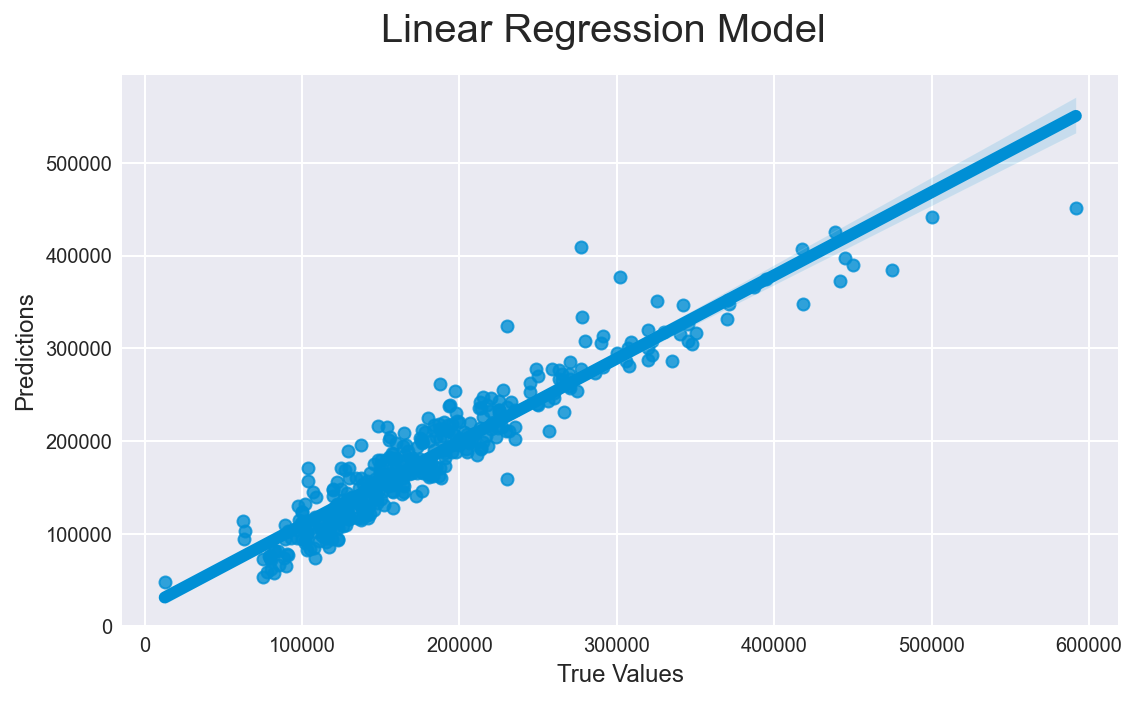

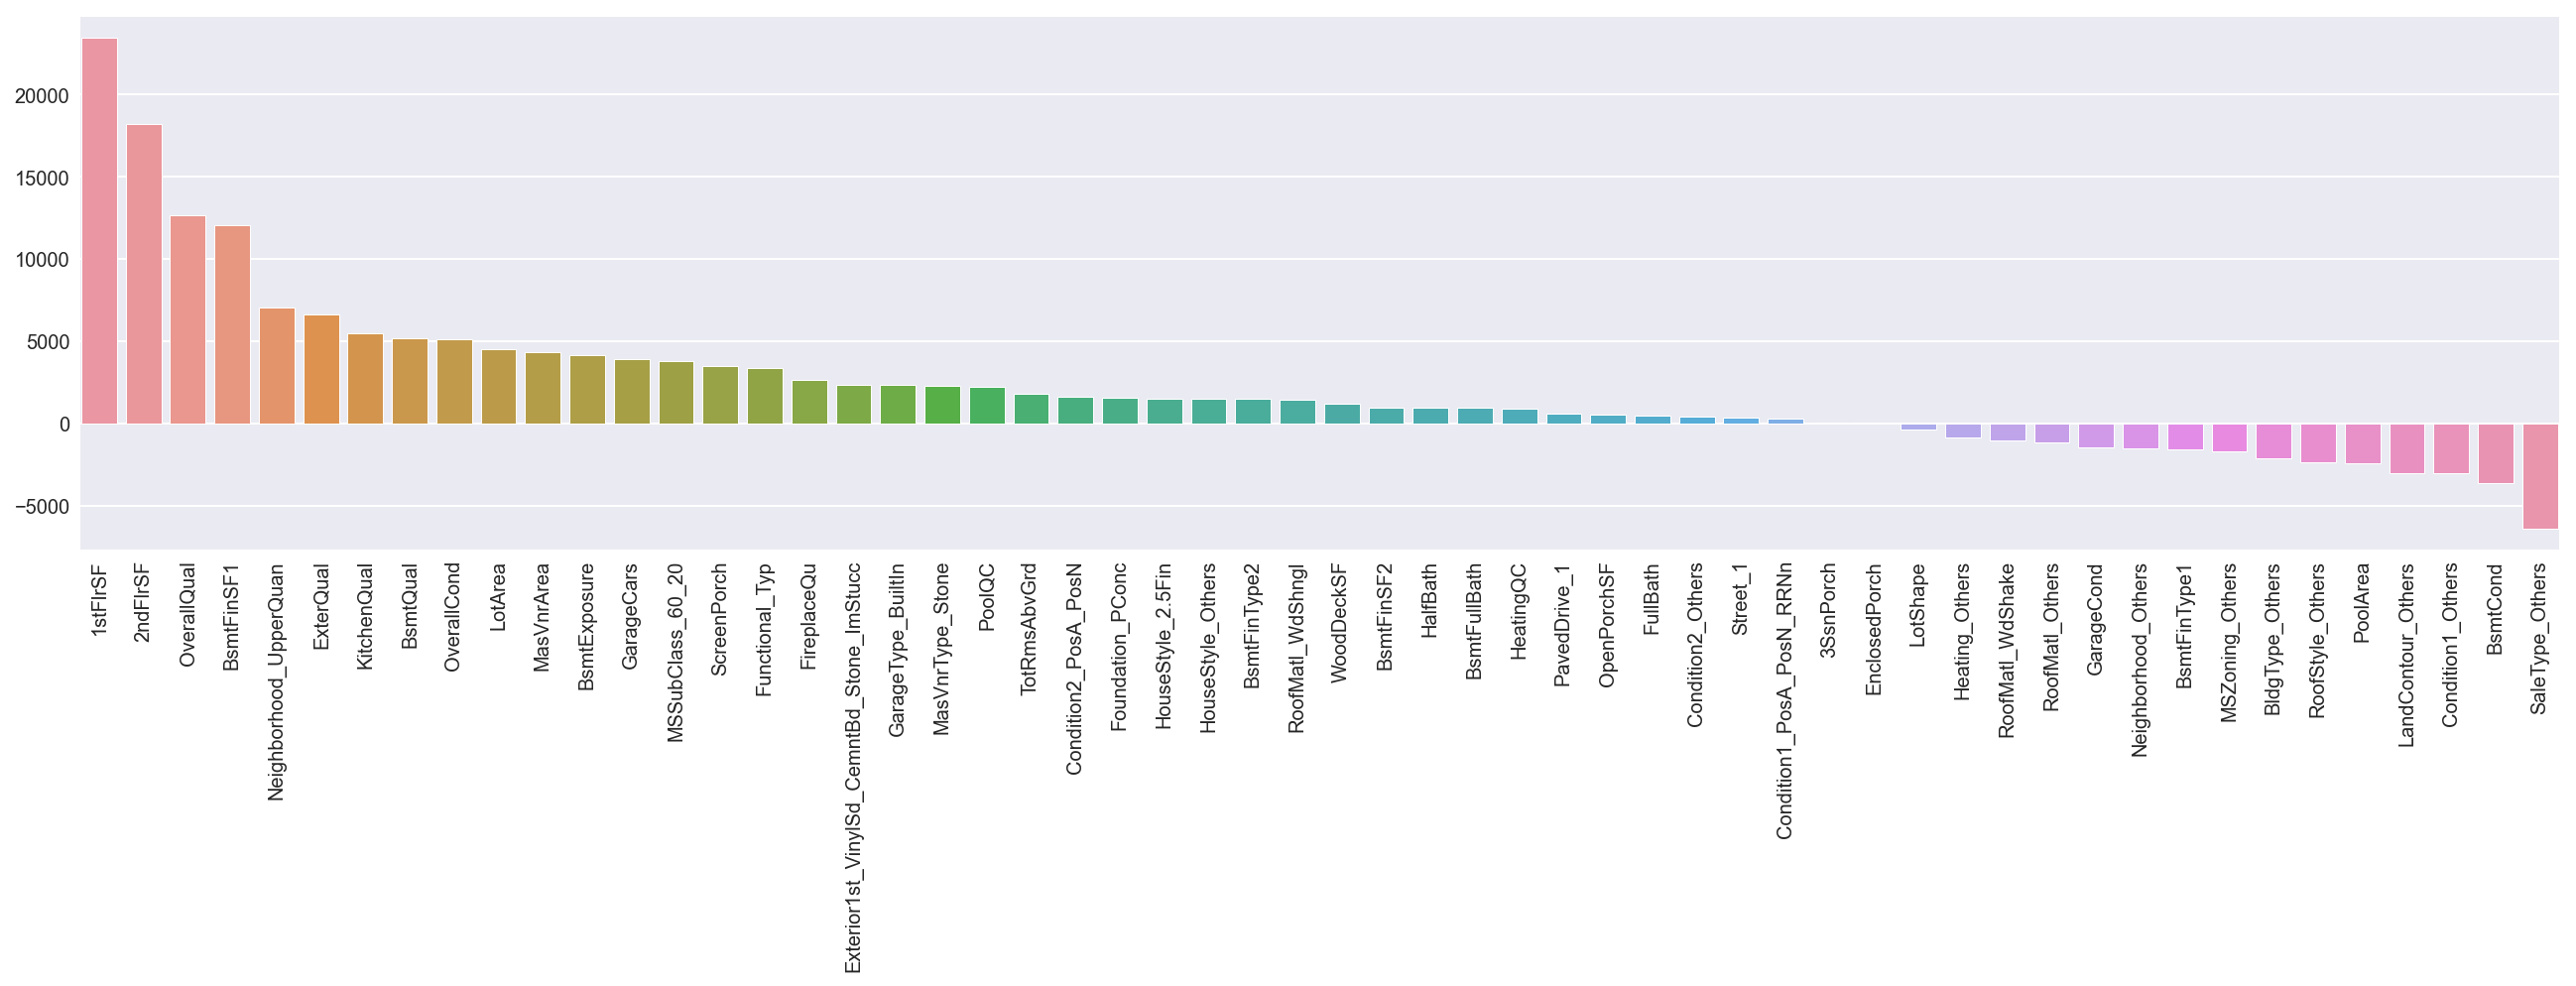

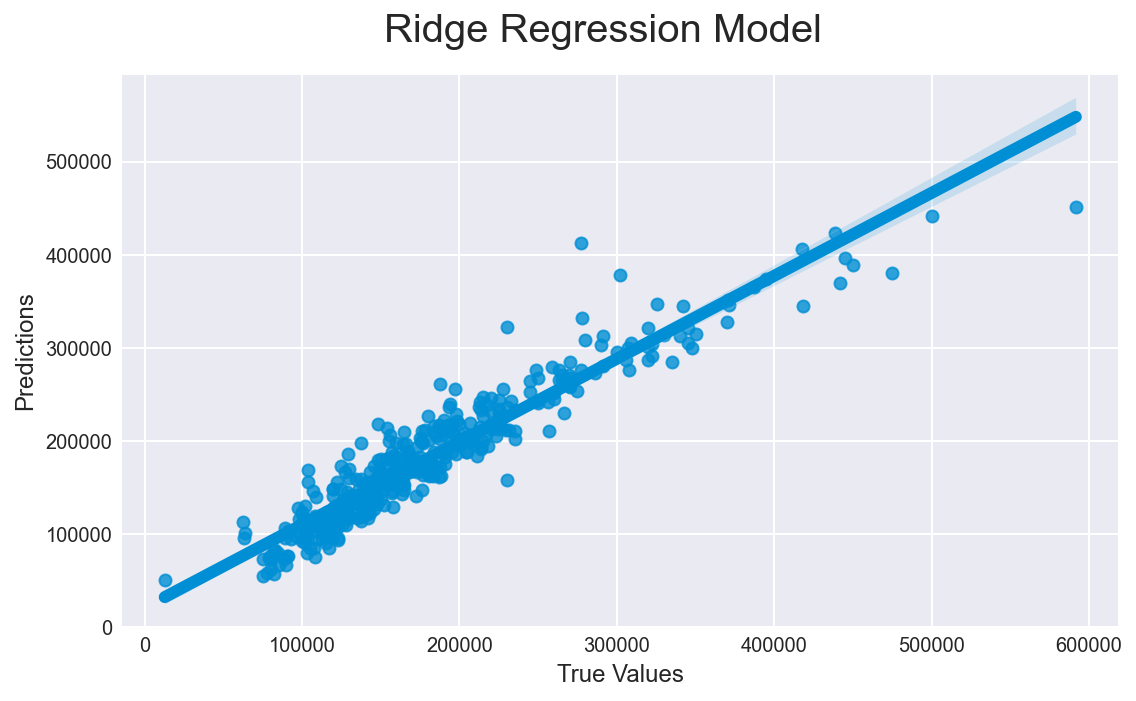

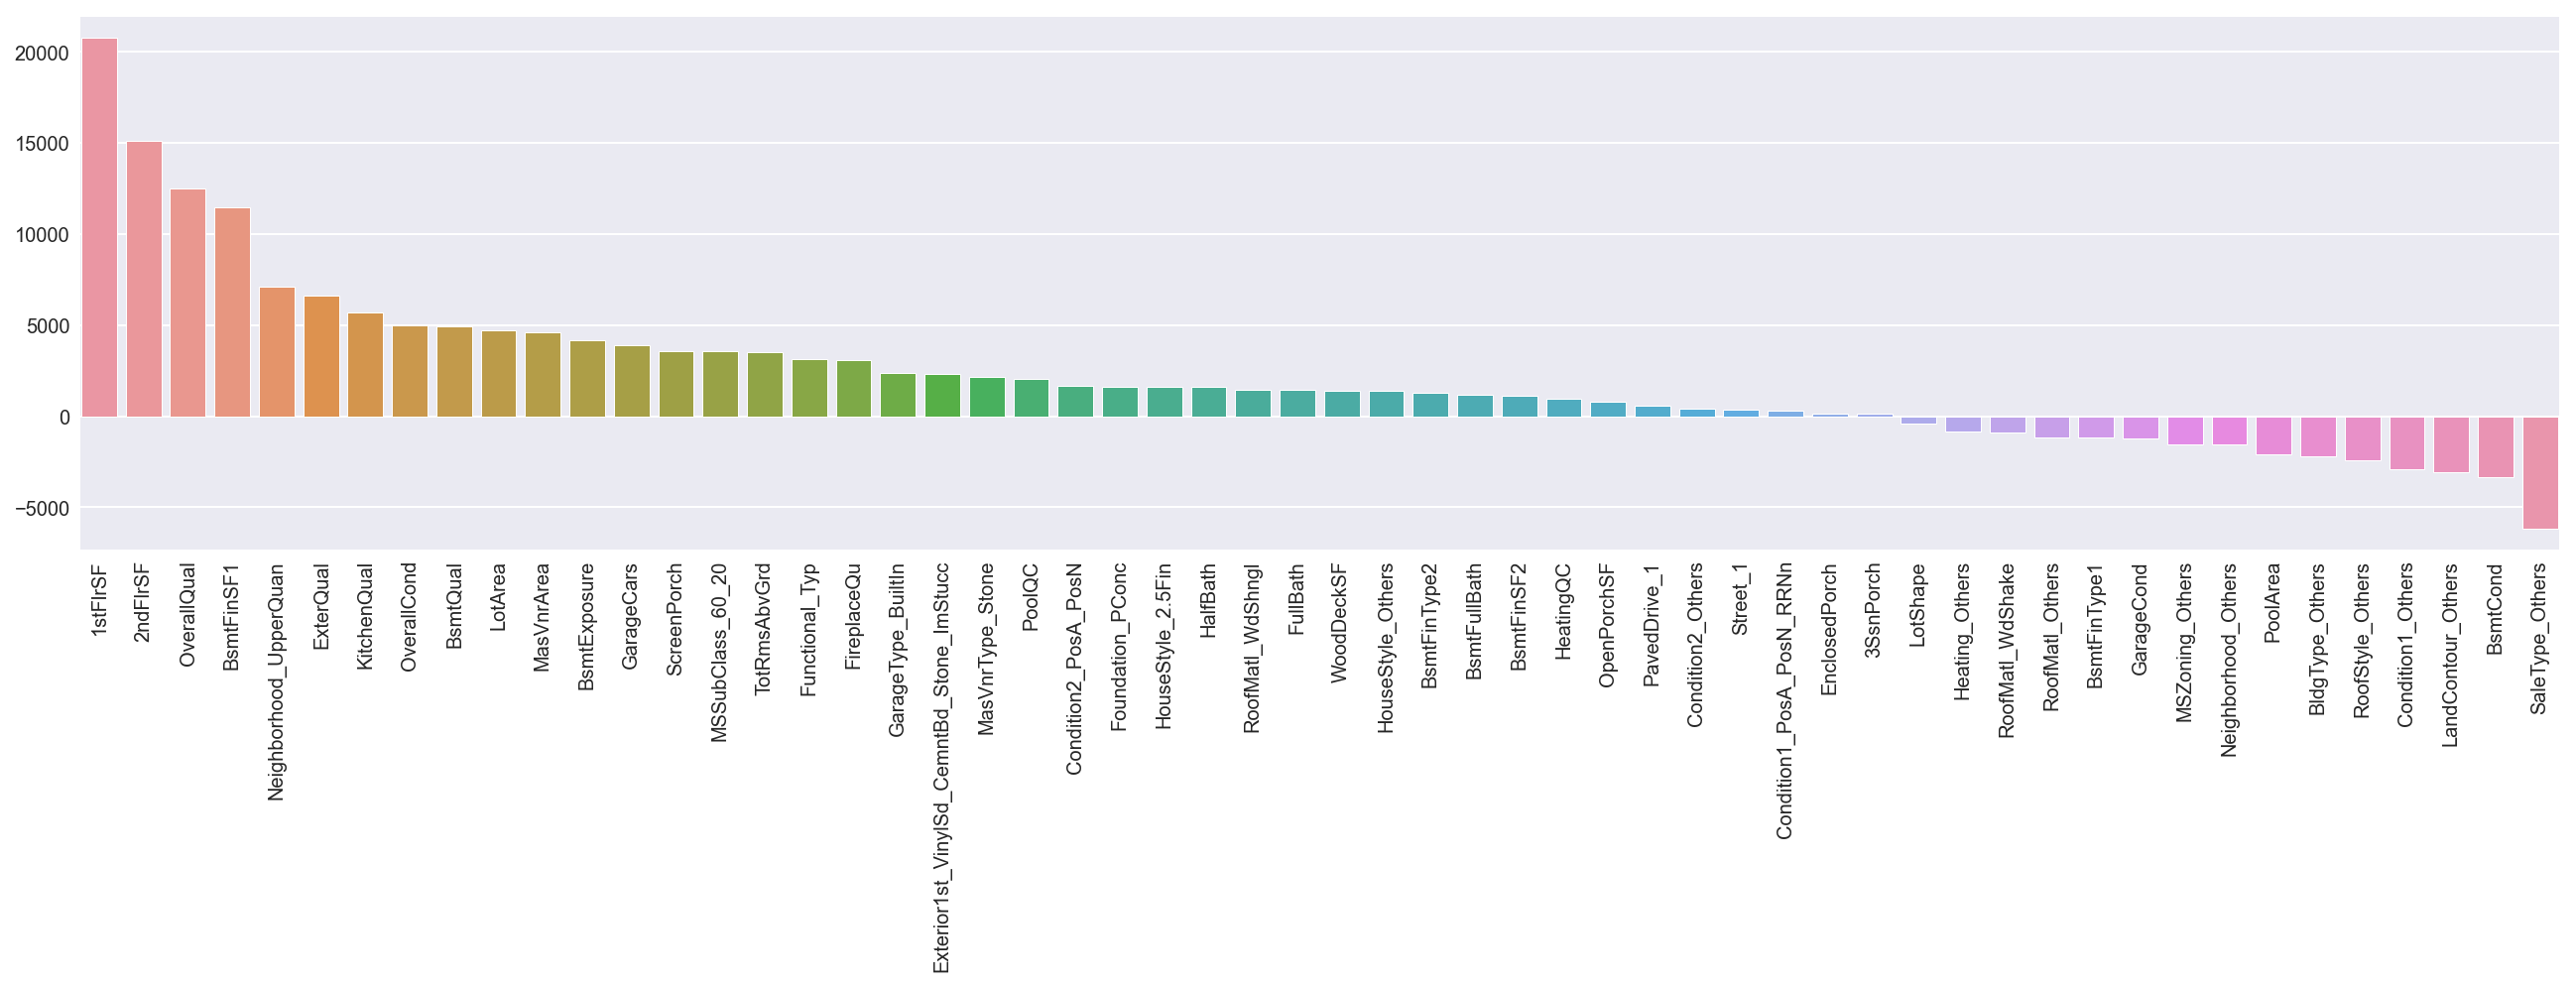

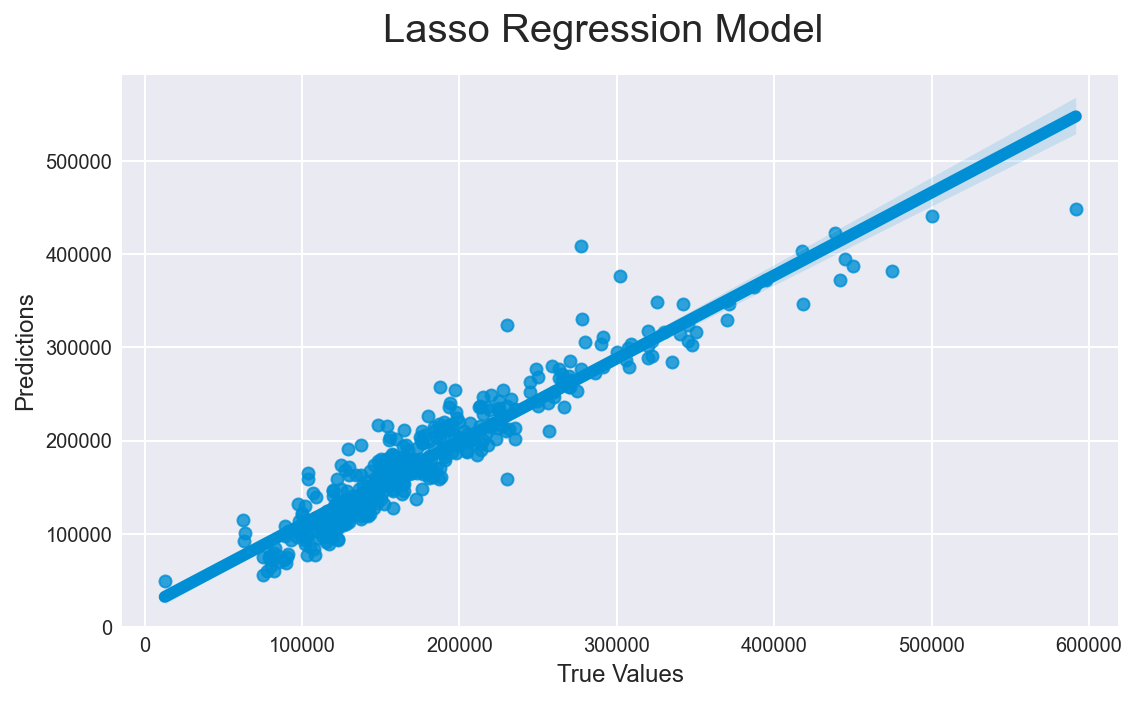

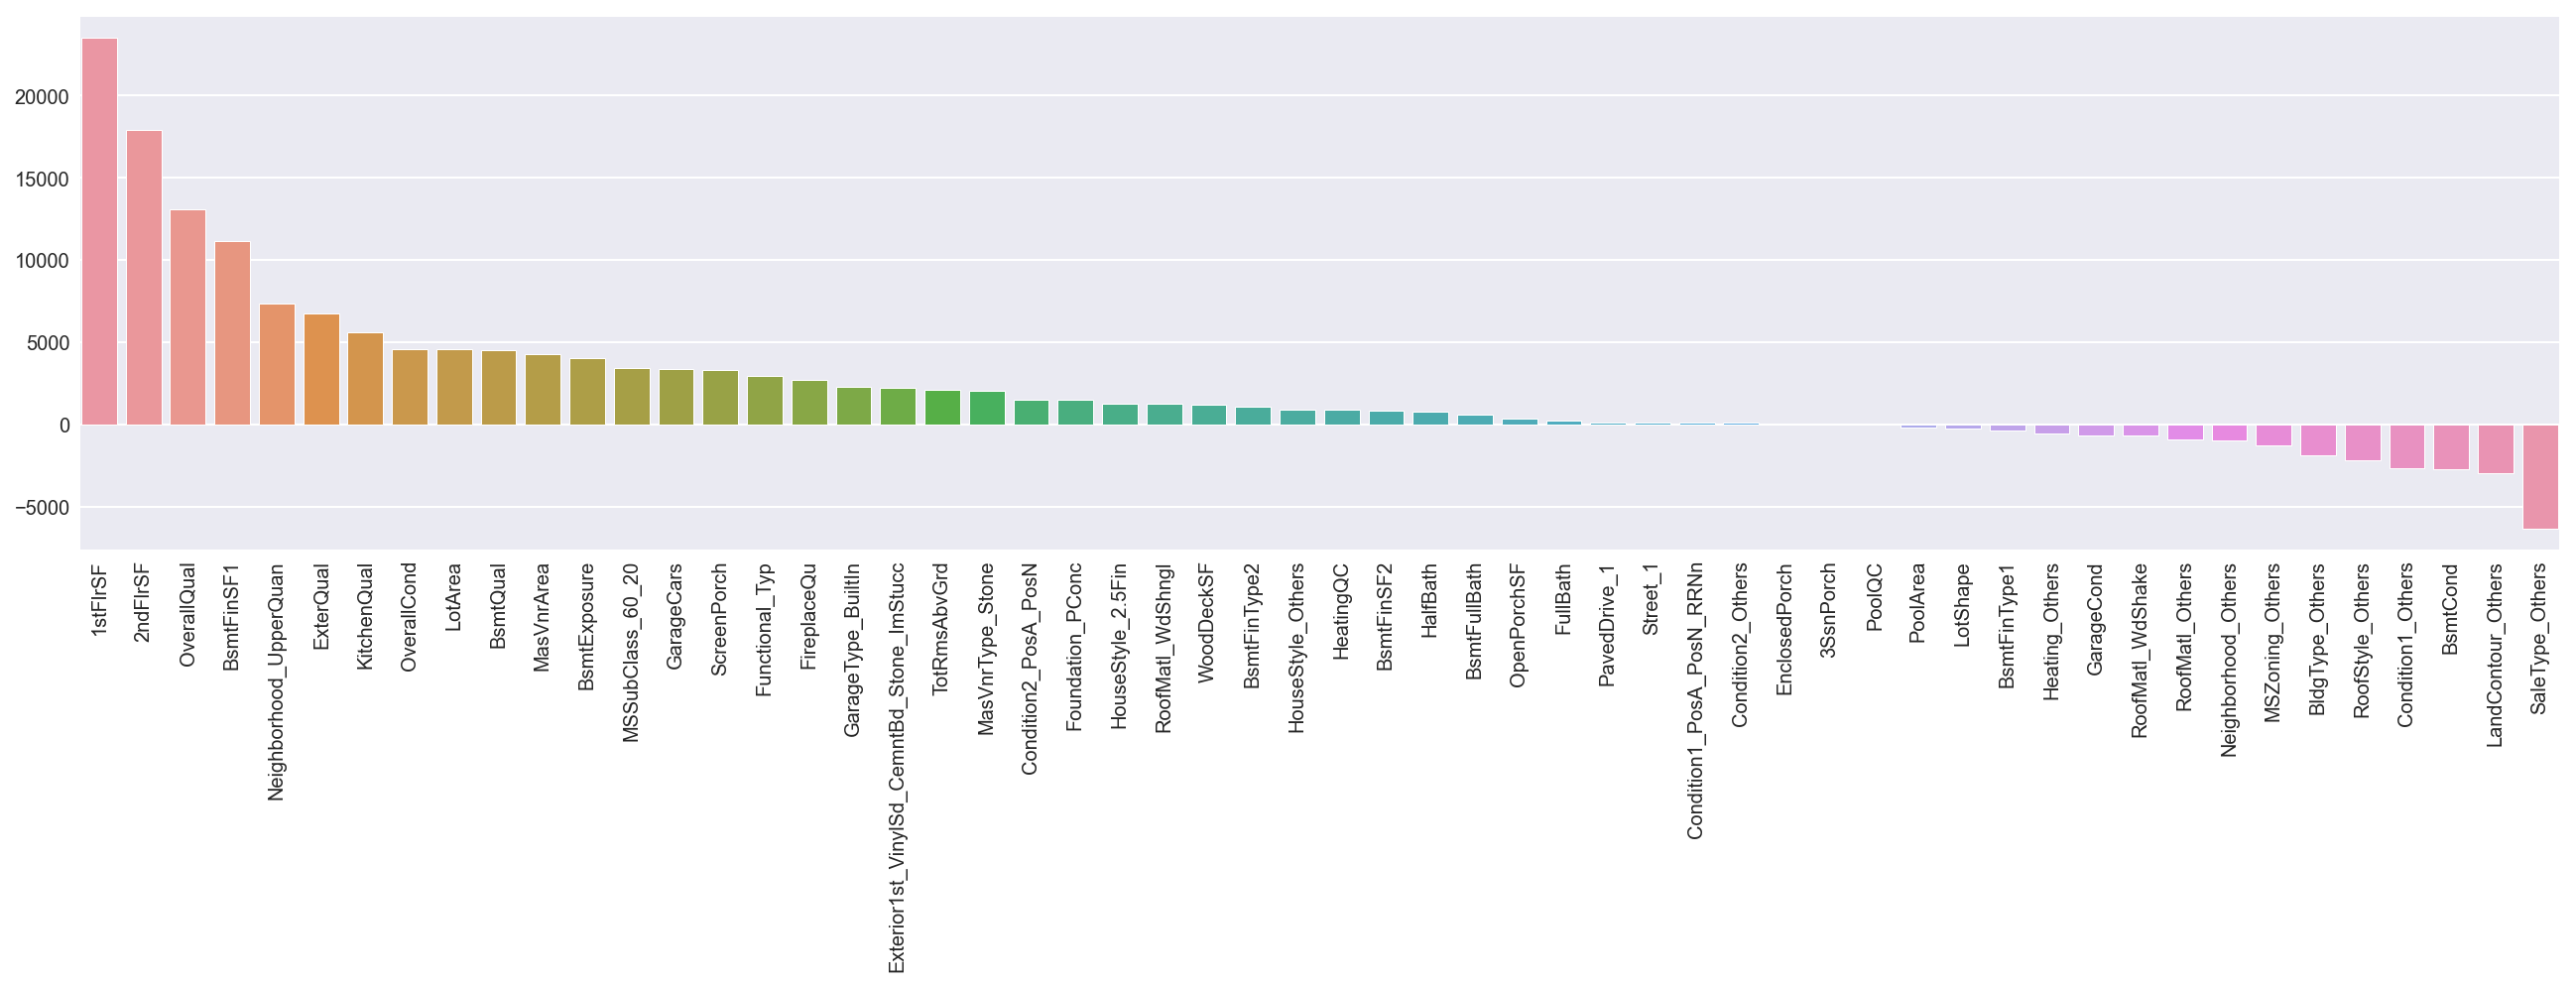

In [65]:
# Run linear, ridge and lasso
model4_results = run_models(X4, y4);

In [66]:
model4_results

Optimal alpha  Training RMSE  Testing RMSE  \
Linear            NA   24300.147023  24890.298162   
Ridge      41.320124   24354.261283  25070.074619   
Lasso     265.608778   24388.508480  24854.975628   

        Testing RMSE - Training RMSE  Training Cross Validation RMSE  
Linear                    590.151139                    25920.183684  
Ridge                     715.813336                    25825.909445  
Lasso                     466.467148                    25848.770685

#### Exploratory Data Analysis (EDA)
1. From the distribution of coefficients above, it can be observed that `EnclosedPorch` and `3SsnPorch` have insignificant or zero cofficients in all three models and may be removed. 
2. From the heatmap below, it can be observed that there are still features with significant correlations. 
    - `PoolQC` and `PoolArea` with correlation 0.898498
        - While the Lasso Model assigned `PoolQC` with coefficient of zero, it has notable coefficients in the other models. 
        - Hence, `PoolArea` will be kept and `PoolQC` will be removed. 
    - `BsmtFinSF2` and `BsmtFinType2` with correlation 0.779429: a new feature that is the multiplication of the both features will be created.
    - `ExterQual` and `OverallQual` with correlation 0.738370: a new feature that is the multiplication of the both features will be created.
    - `KitchenQual` and `ExterQual` with correlation 0.729048: a new feature that is the multiplication of the both features will be created.
    - `BsmtFinSF1` and `BsmtFinType1` with correlation 0.722999: a new feature that is the multiplication of the both features will be created.

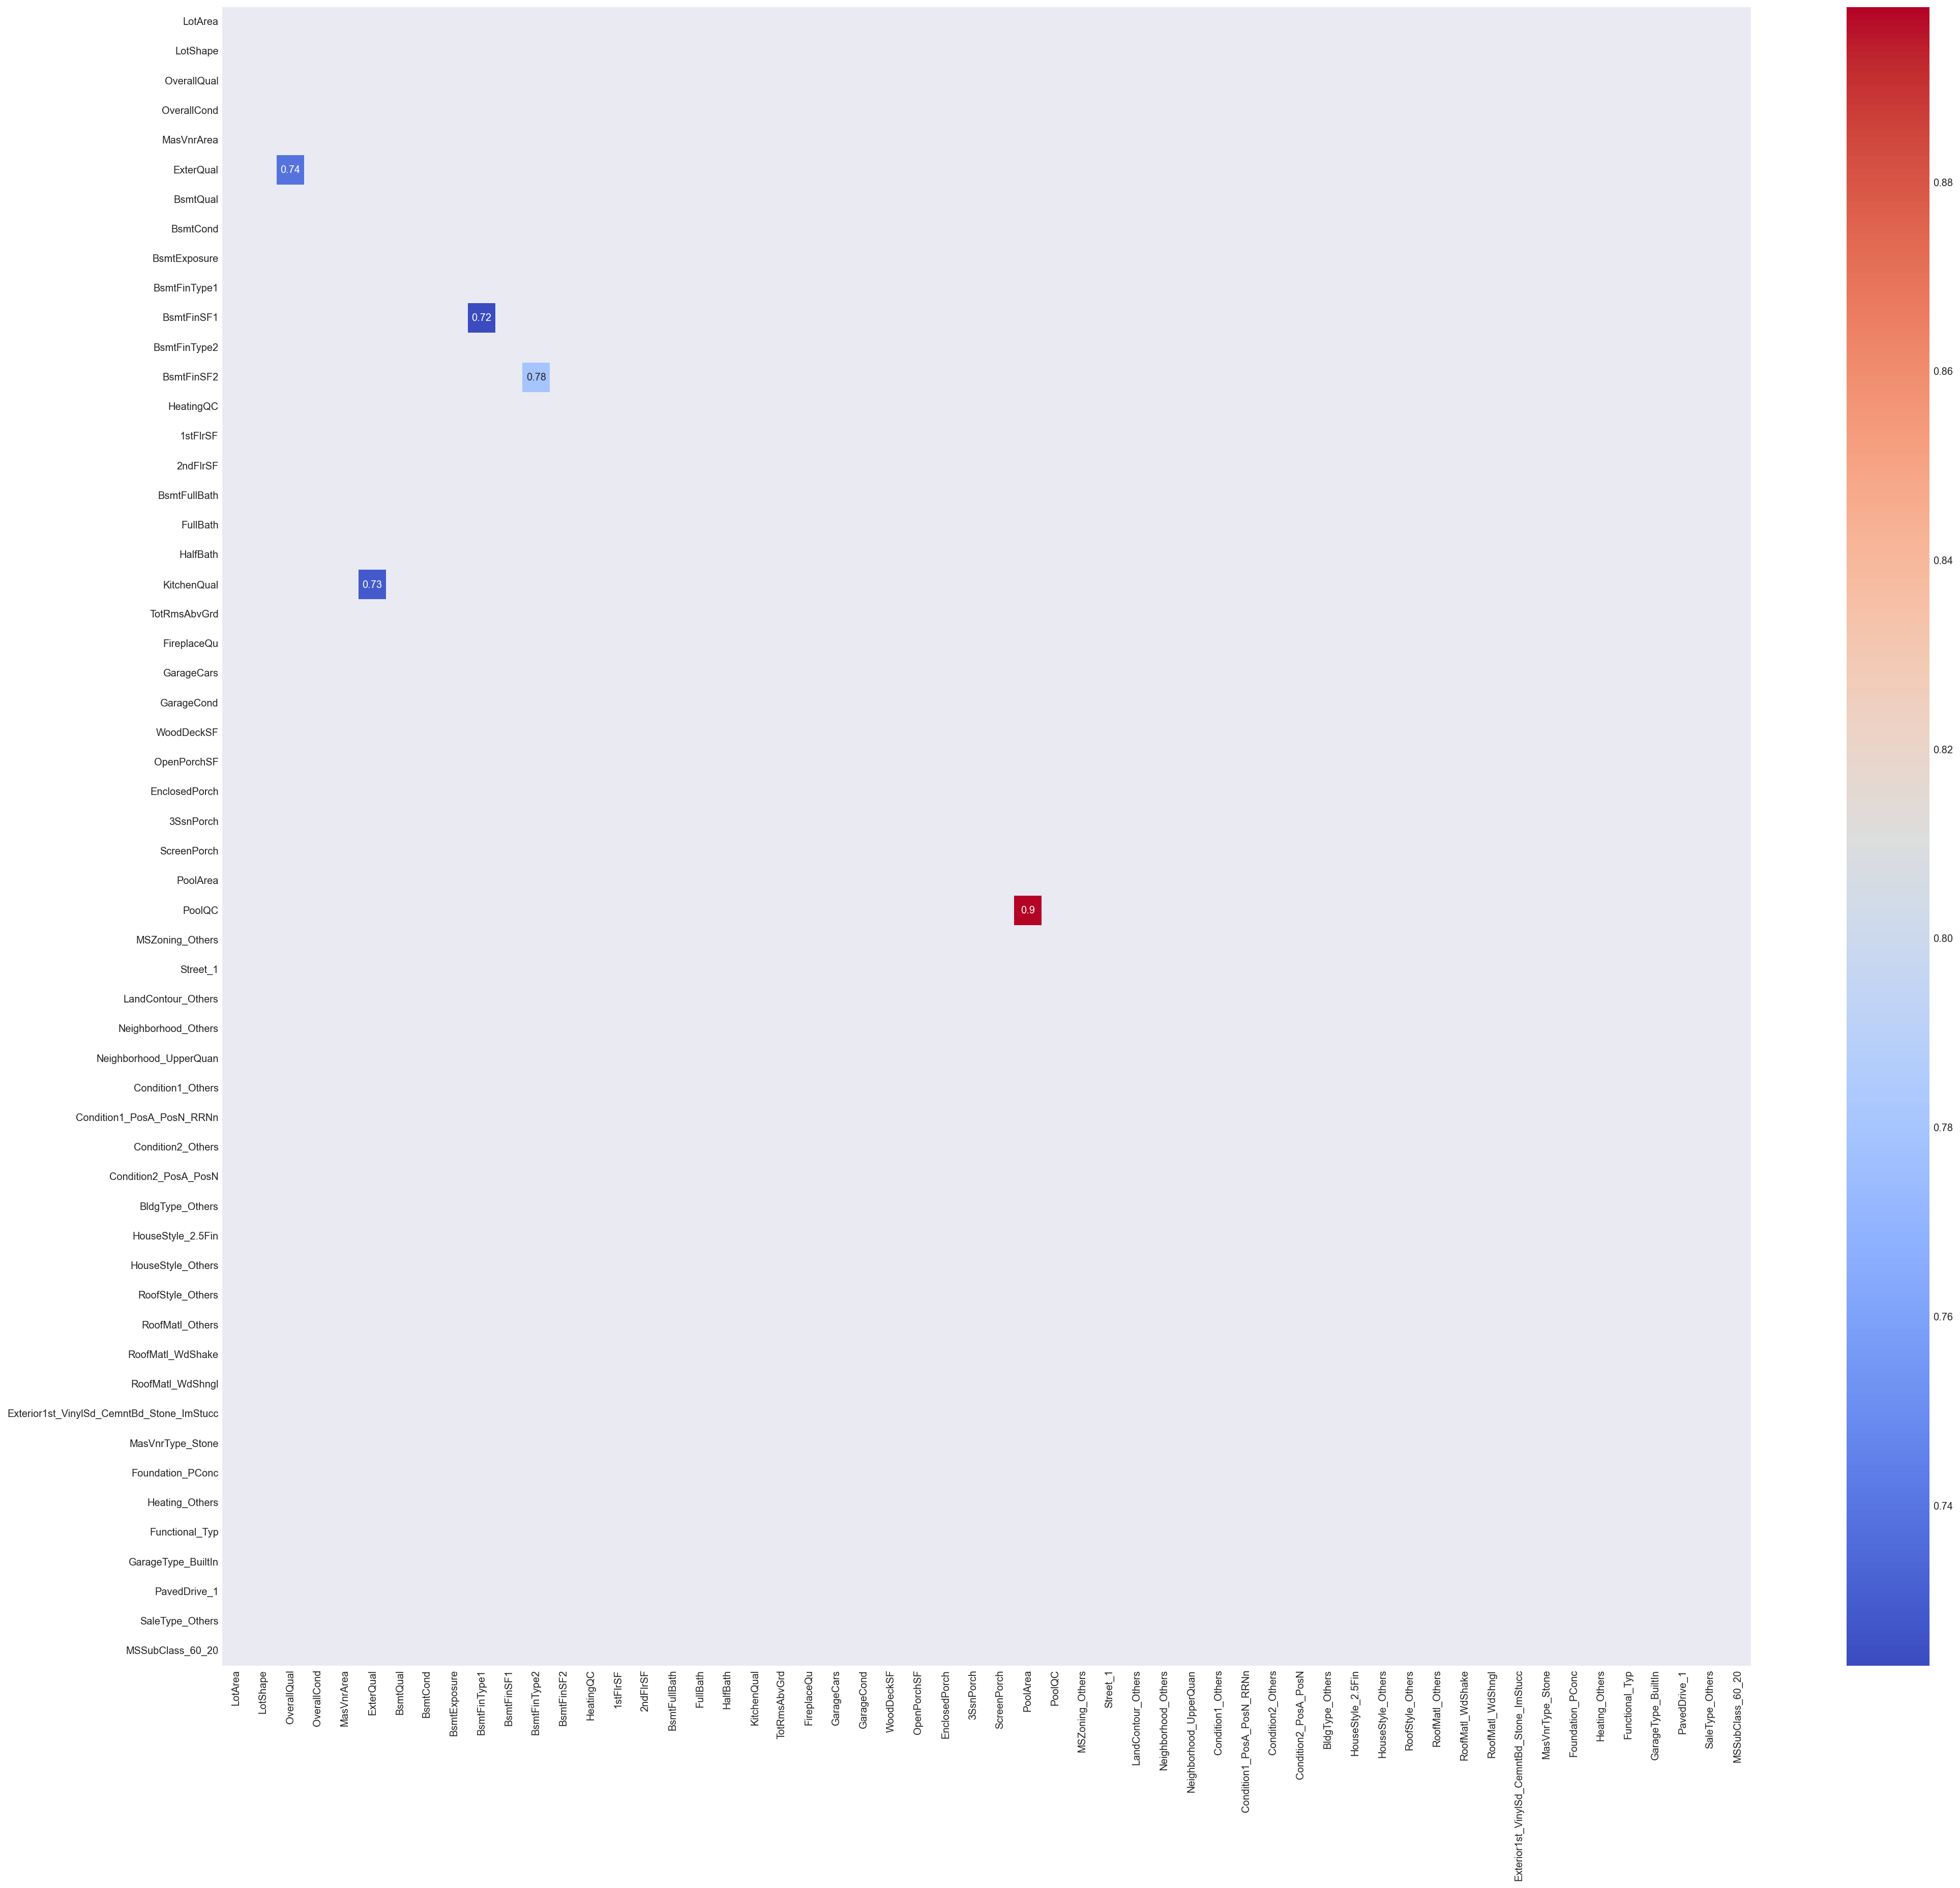

In [67]:
# Plotting heatmap to understand correlation of remaining features. 
mask = np.zeros_like(X4.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30, 30))
sns.heatmap(X4.corr()[abs(X4.corr())>0.7], cmap='coolwarm', annot=True, mask = mask);

In [68]:
# The values and features in the heatmap is too small to be seen.
# Get correlations between features that are more than 0.7 in magnitude

# Create dataframe of correlations 
X4_corr = X4.corr()

# use only lower triangle
X4_corr = pd.DataFrame(np.tril(X4_corr), columns=X4_corr.columns, index=X4_corr.index)

# Iterating through the dataframe to get correlations that are more than 0.7 in magnitude
corr_value = []

for i in range(len(X4_corr)):
    for j in range(len(X4_corr)):
        if abs(X4_corr.iloc[i, j]>0.7) and abs(X4_corr.iloc[i, j]<1):
            corr_value.append([X4_corr.index[i], X4_corr.columns[j], X4_corr.iloc[i, j]])
 
# convert corr_value into a dataframe
pd.DataFrame(data=corr_value, 
             columns=['Feature1', 
                      'Feature2', 
                      'Correlation']
            ).sort_values(by='Correlation', ascending=False)

Feature1      Feature2  Correlation
4       PoolQC      PoolArea     0.898498
2   BsmtFinSF2  BsmtFinType2     0.779429
0    ExterQual   OverallQual     0.738370
3  KitchenQual     ExterQual     0.729048
1   BsmtFinSF1  BsmtFinType1     0.722999

#### Model Evaluation
1. The ridge model, with a cross validation RMSE of 25825, performs the best among the models ran. This means that the average price difference between the prediction and the actual sale price is \$25,825. Compared to Model 2, the cross validation RMSE reduced significantly by about 5700 (18% reduction).
2. It is also observed that the Testing RMSE is higher than the Training RMSE. This verified that the two anomaly result identified earlier in under EDA have contributed to the larger error in the training RSME.
3. It is also observed that the difference between the testing RMSE and training RMSE ranges from 500 to 700 (2%-3% of the training RMSE). This means that the model performed well in predicting the test data.  
4. All three models has insignificant or zero cofficient for `EnclosedPorch` and `3SsnPorch`. This means that these features are not useful in predicting the propterty prices. 
5. Features with significant correlations were identified. To address this, either one of the two features will be removed or new features will be engineered. 



### e. Model 5: Ridge Model

#### Configure data set for subsequent modelling (Built on Model 4)
1. `EnclosedPorch` and `3SsnPorch` have insignificant or zero cofficients in all three models and will be removed. 
2. Engineering of features with significant correlations. 
    - `PoolQC` and `PoolArea` with correlation 0.898498: `PoolQC` will be removed. 
    - `BsmtFinSF2` and `BsmtFinType2` with correlation 0.779429: a new feature that is the multiplication of the both features will be created.
    - `ExterQual` and `OverallQual` with correlation 0.738370: a new feature that is the multiplication of the both features will be created.
    - `KitchenQual` and `ExterQual` with correlation 0.729048: a new feature that is the multiplication of the both features will be created.
    - `BsmtFinSF1` and `BsmtFinType1` with correlation 0.722999: a new feature that is the multiplication of the both features will be created.

In [69]:
# Drop EnclosedPorch, 3SsnPorch and PoolQC columns
X5 = X4.drop(columns=['EnclosedPorch', '3SsnPorch', 'PoolQC'])

In [70]:
# create new features.
X5['BsmtFinSF2_BsmtFinType2'] = X5['BsmtFinSF2']*X5['BsmtFinType2']
X5['ExterQual_OverallQual'] = X5['ExterQual']*X5['OverallQual']
X5['KitchenQual_ExterQual'] = X5['KitchenQual']*X5['ExterQual']
X5['BsmtFinSF1_BsmtFinType1'] = X5['BsmtFinSF1']*X5['BsmtFinType1']

In [71]:
# drop unnecessary features
X5.drop(columns=['BsmtFinSF2', 'BsmtFinType2', 'ExterQual', 'OverallQual', 
                 'KitchenQual', 'ExterQual', 'BsmtFinSF1', 'BsmtFinType1'], 
        inplace=True)

In [72]:
# instantiate y5
y5 = y4

In [73]:
# verify the size of X, y
X5.shape, y5.shape

((2049, 50), (2049,))

#### Run Models

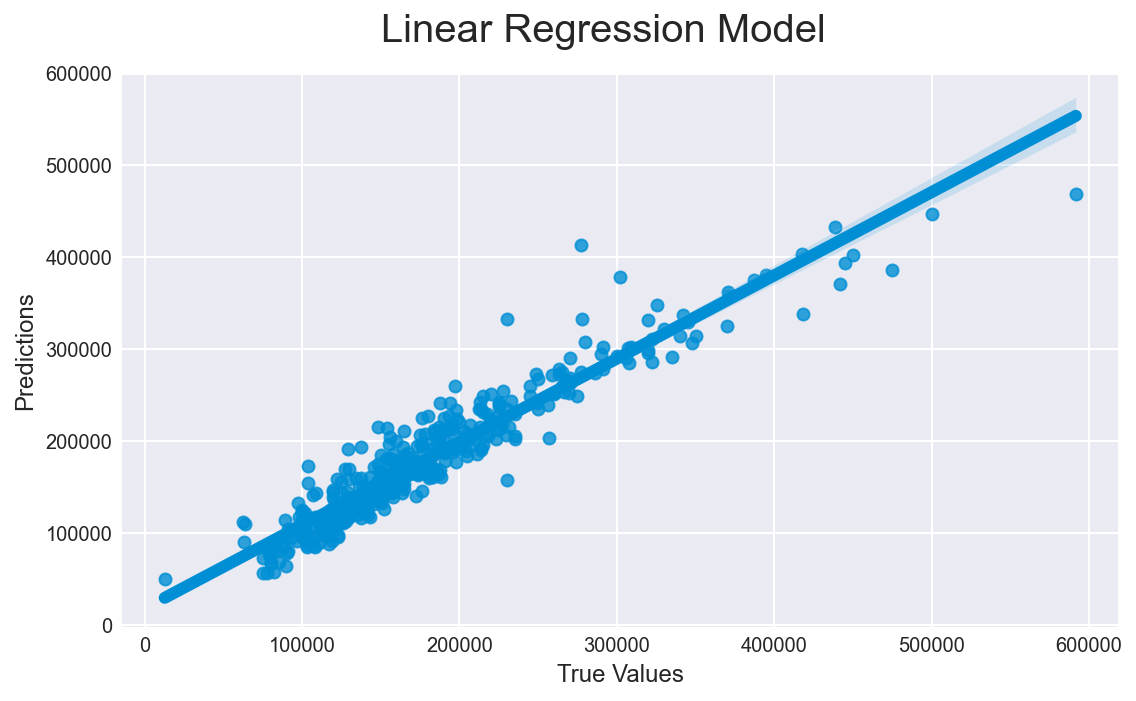

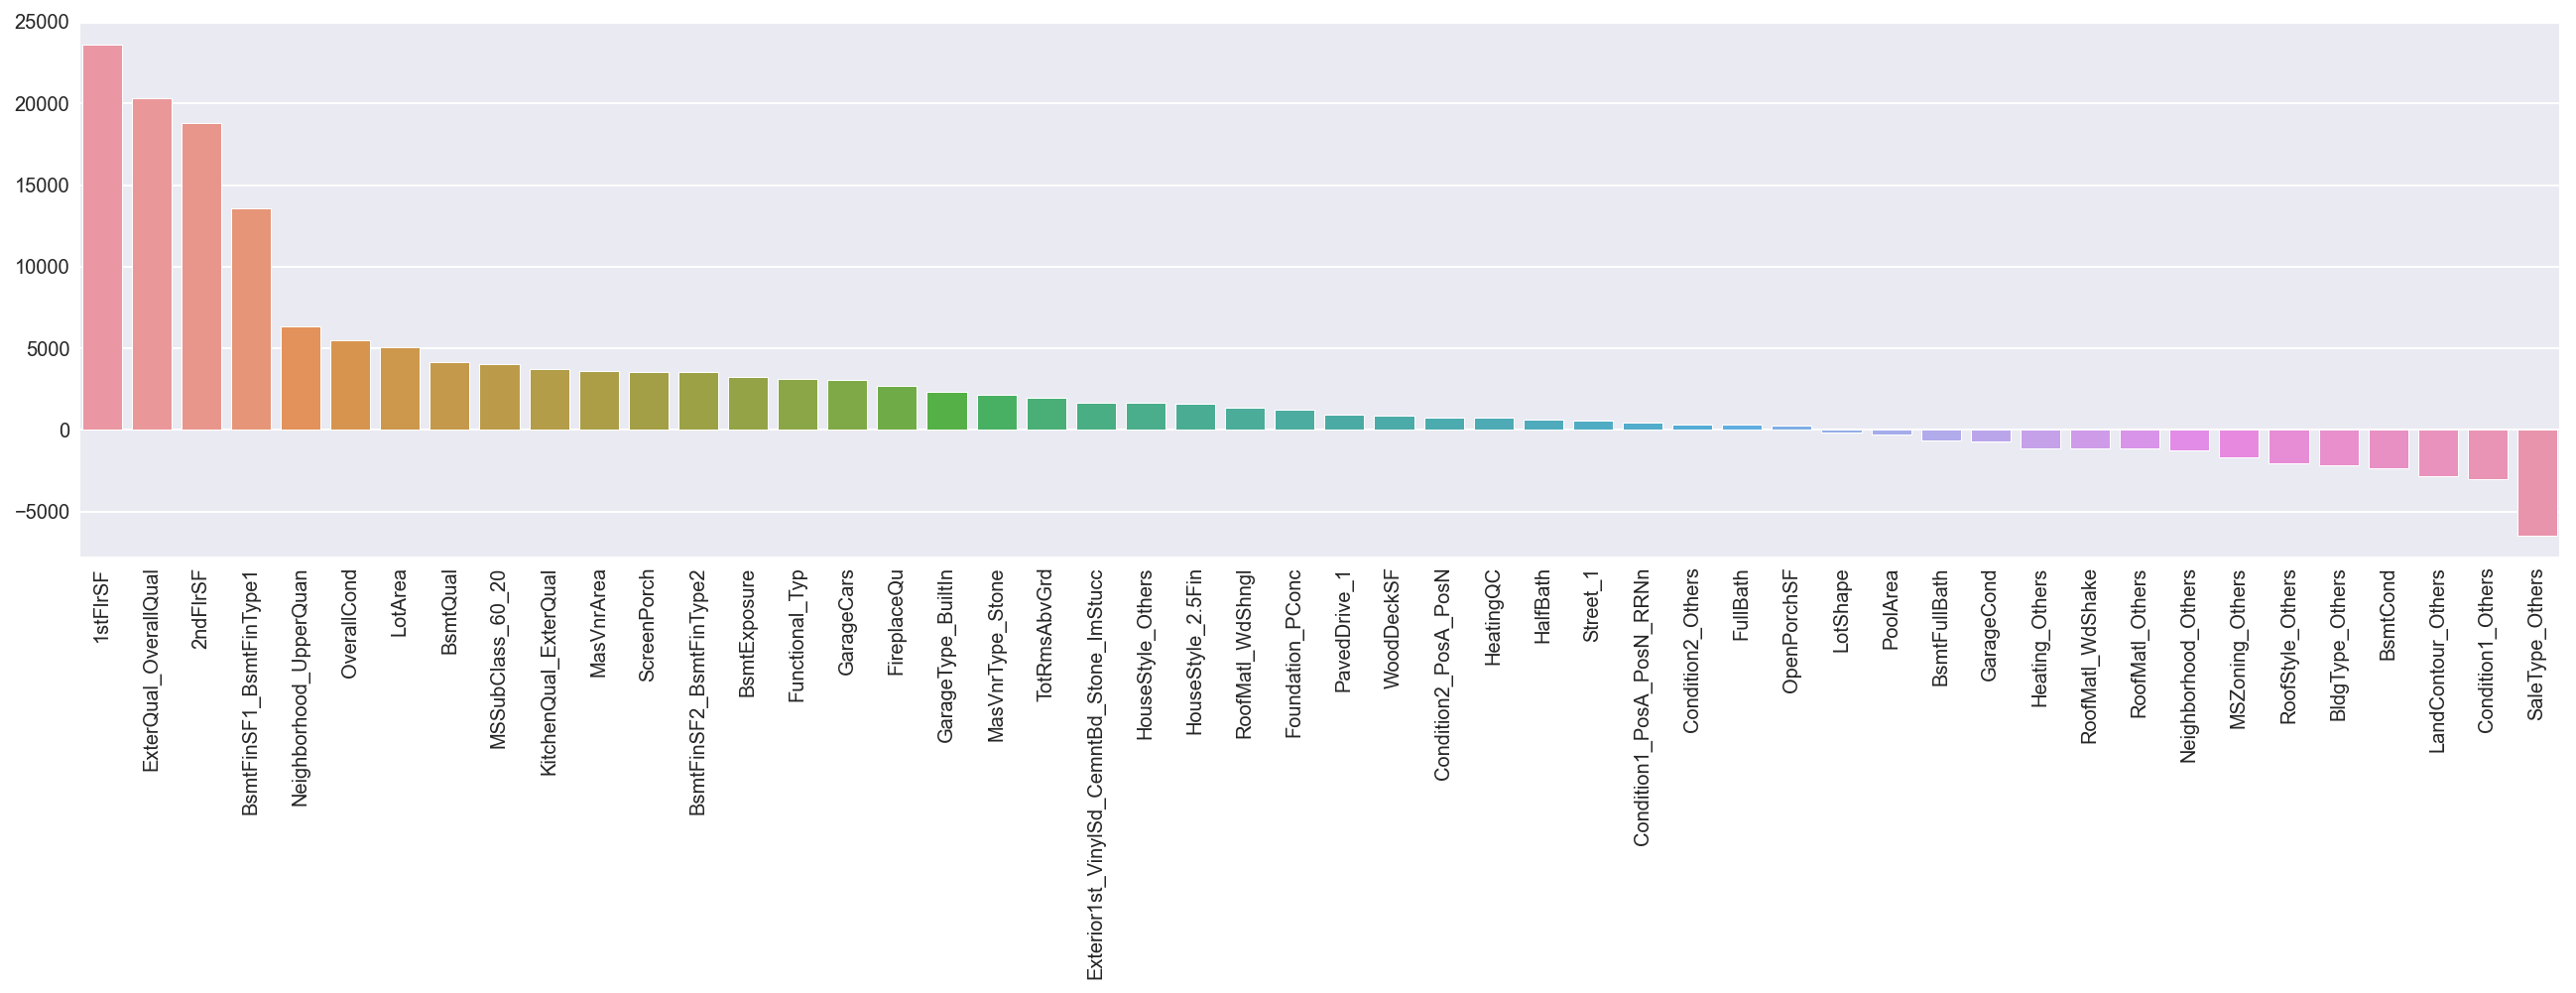

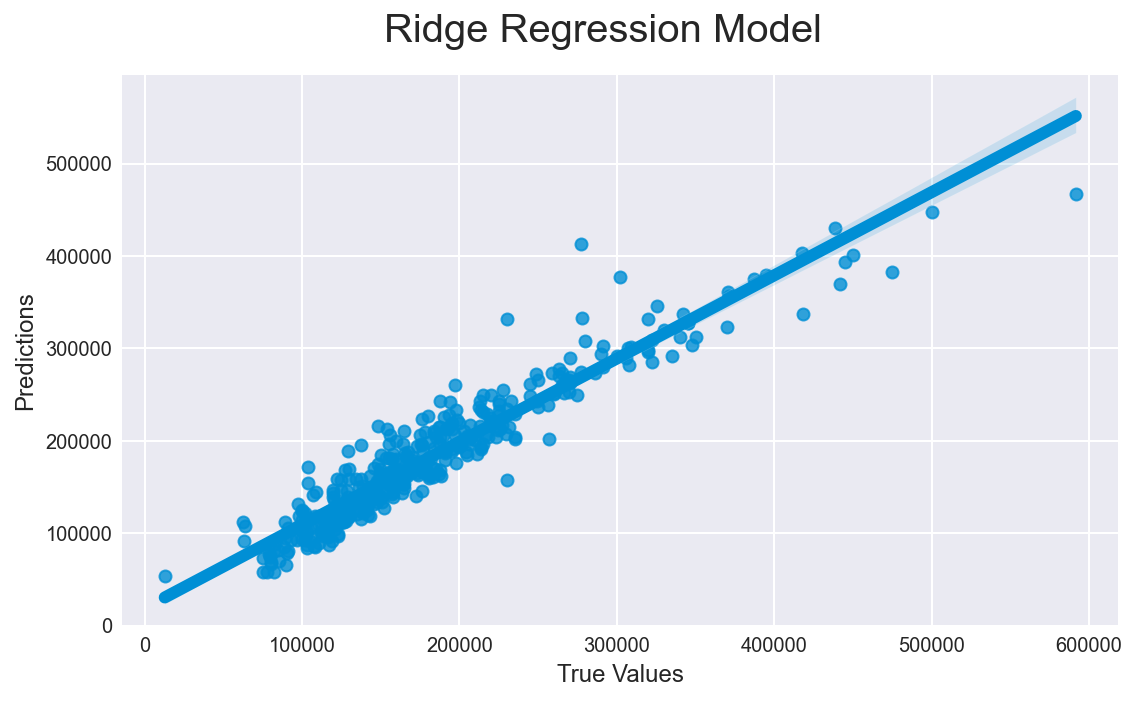

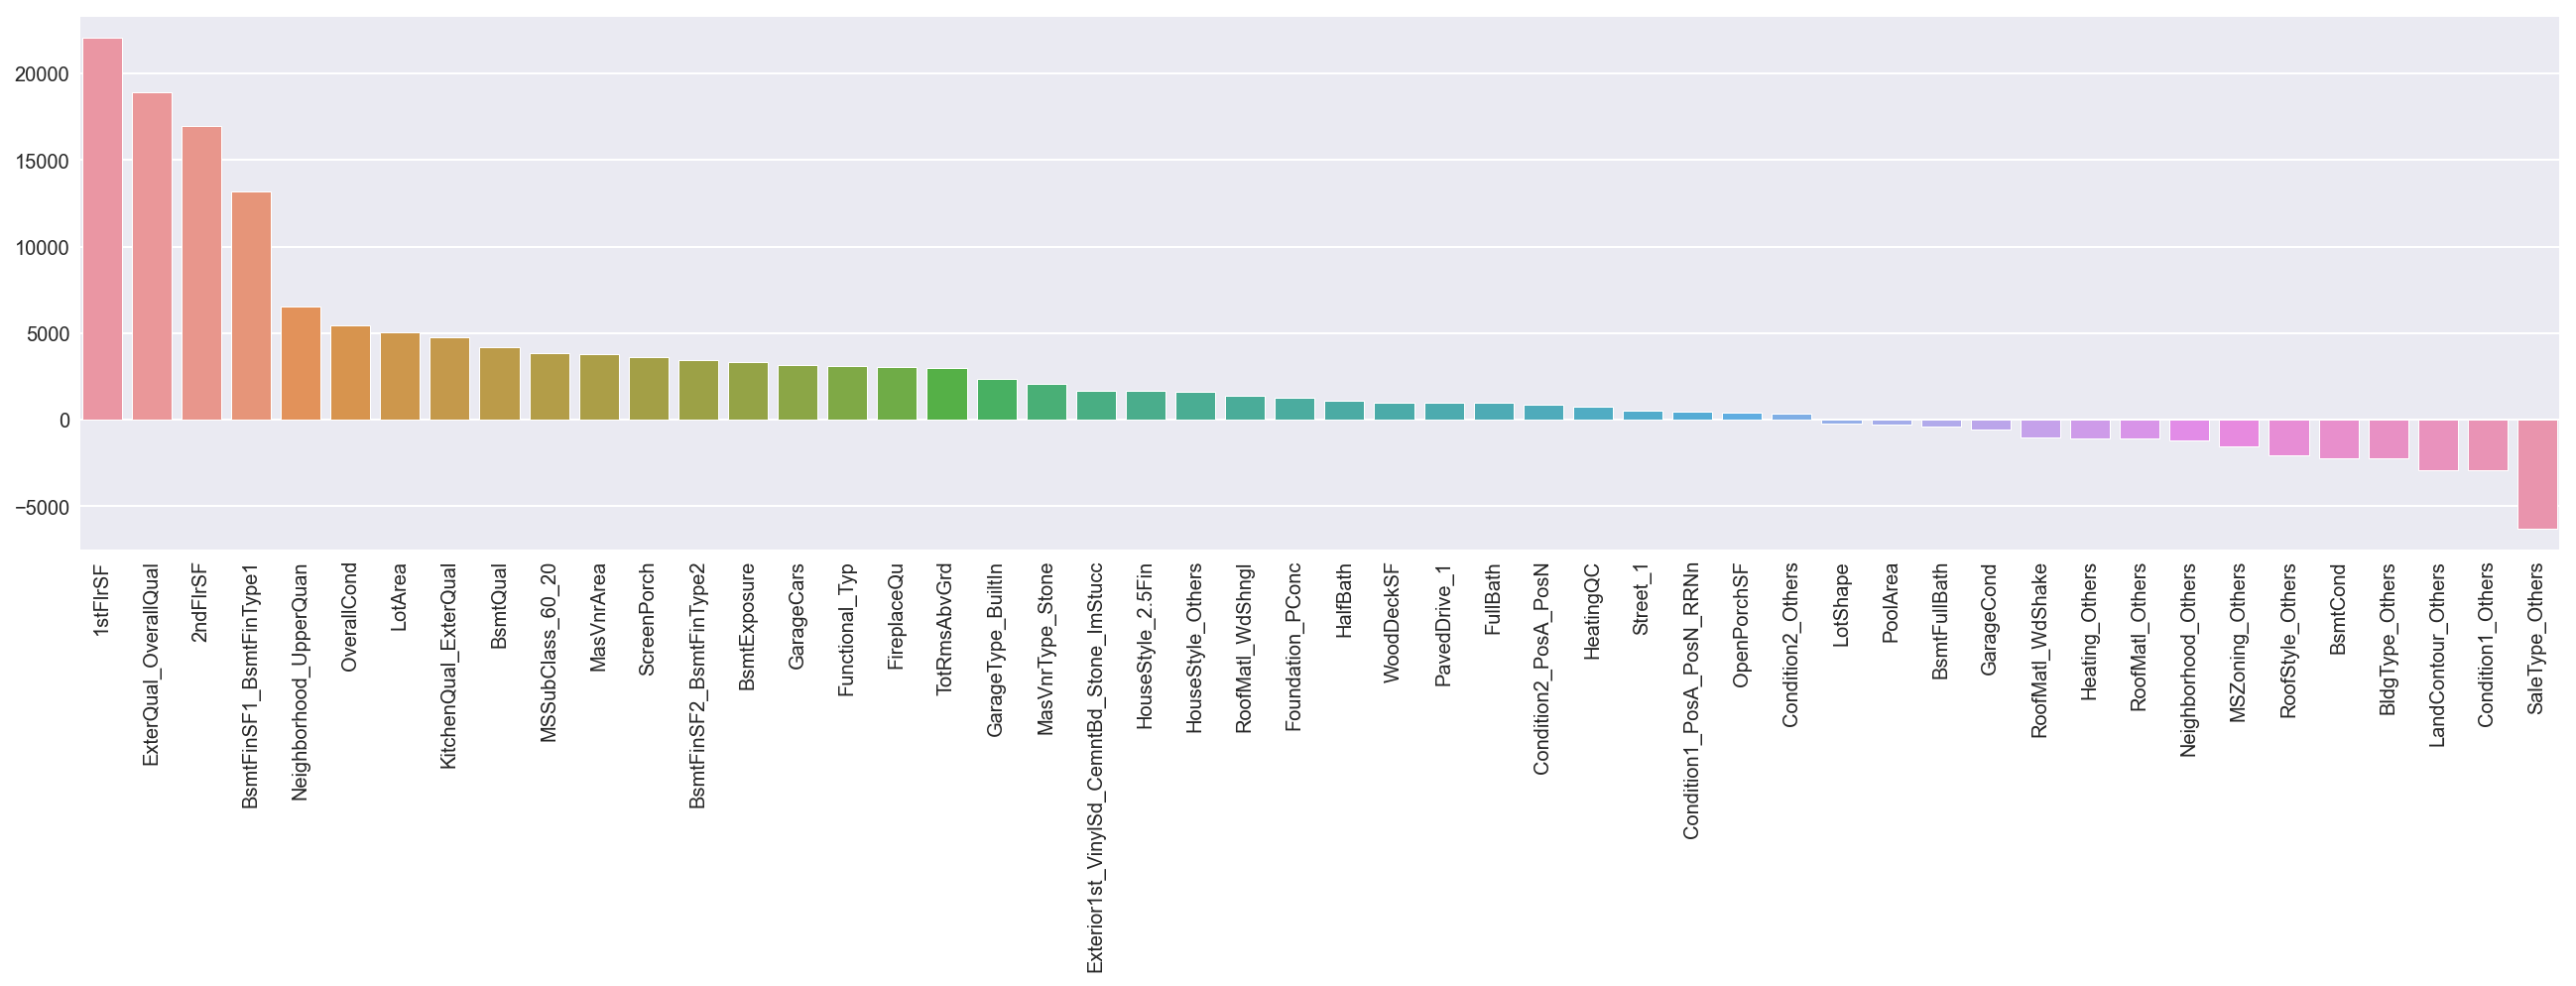

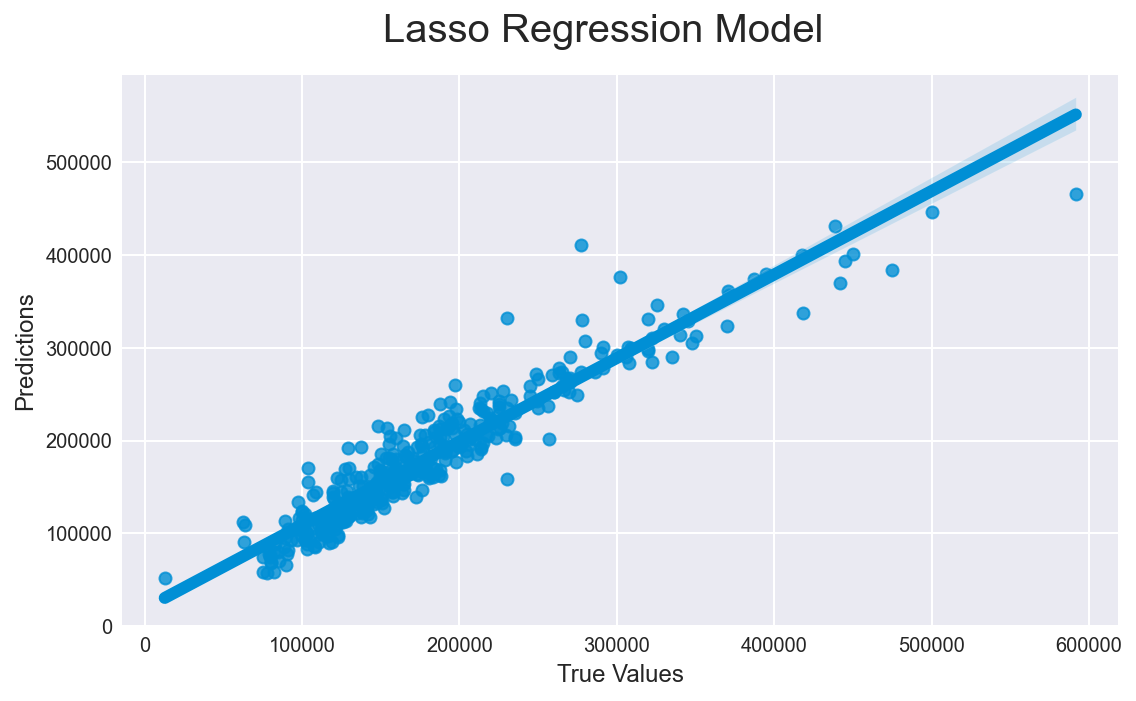

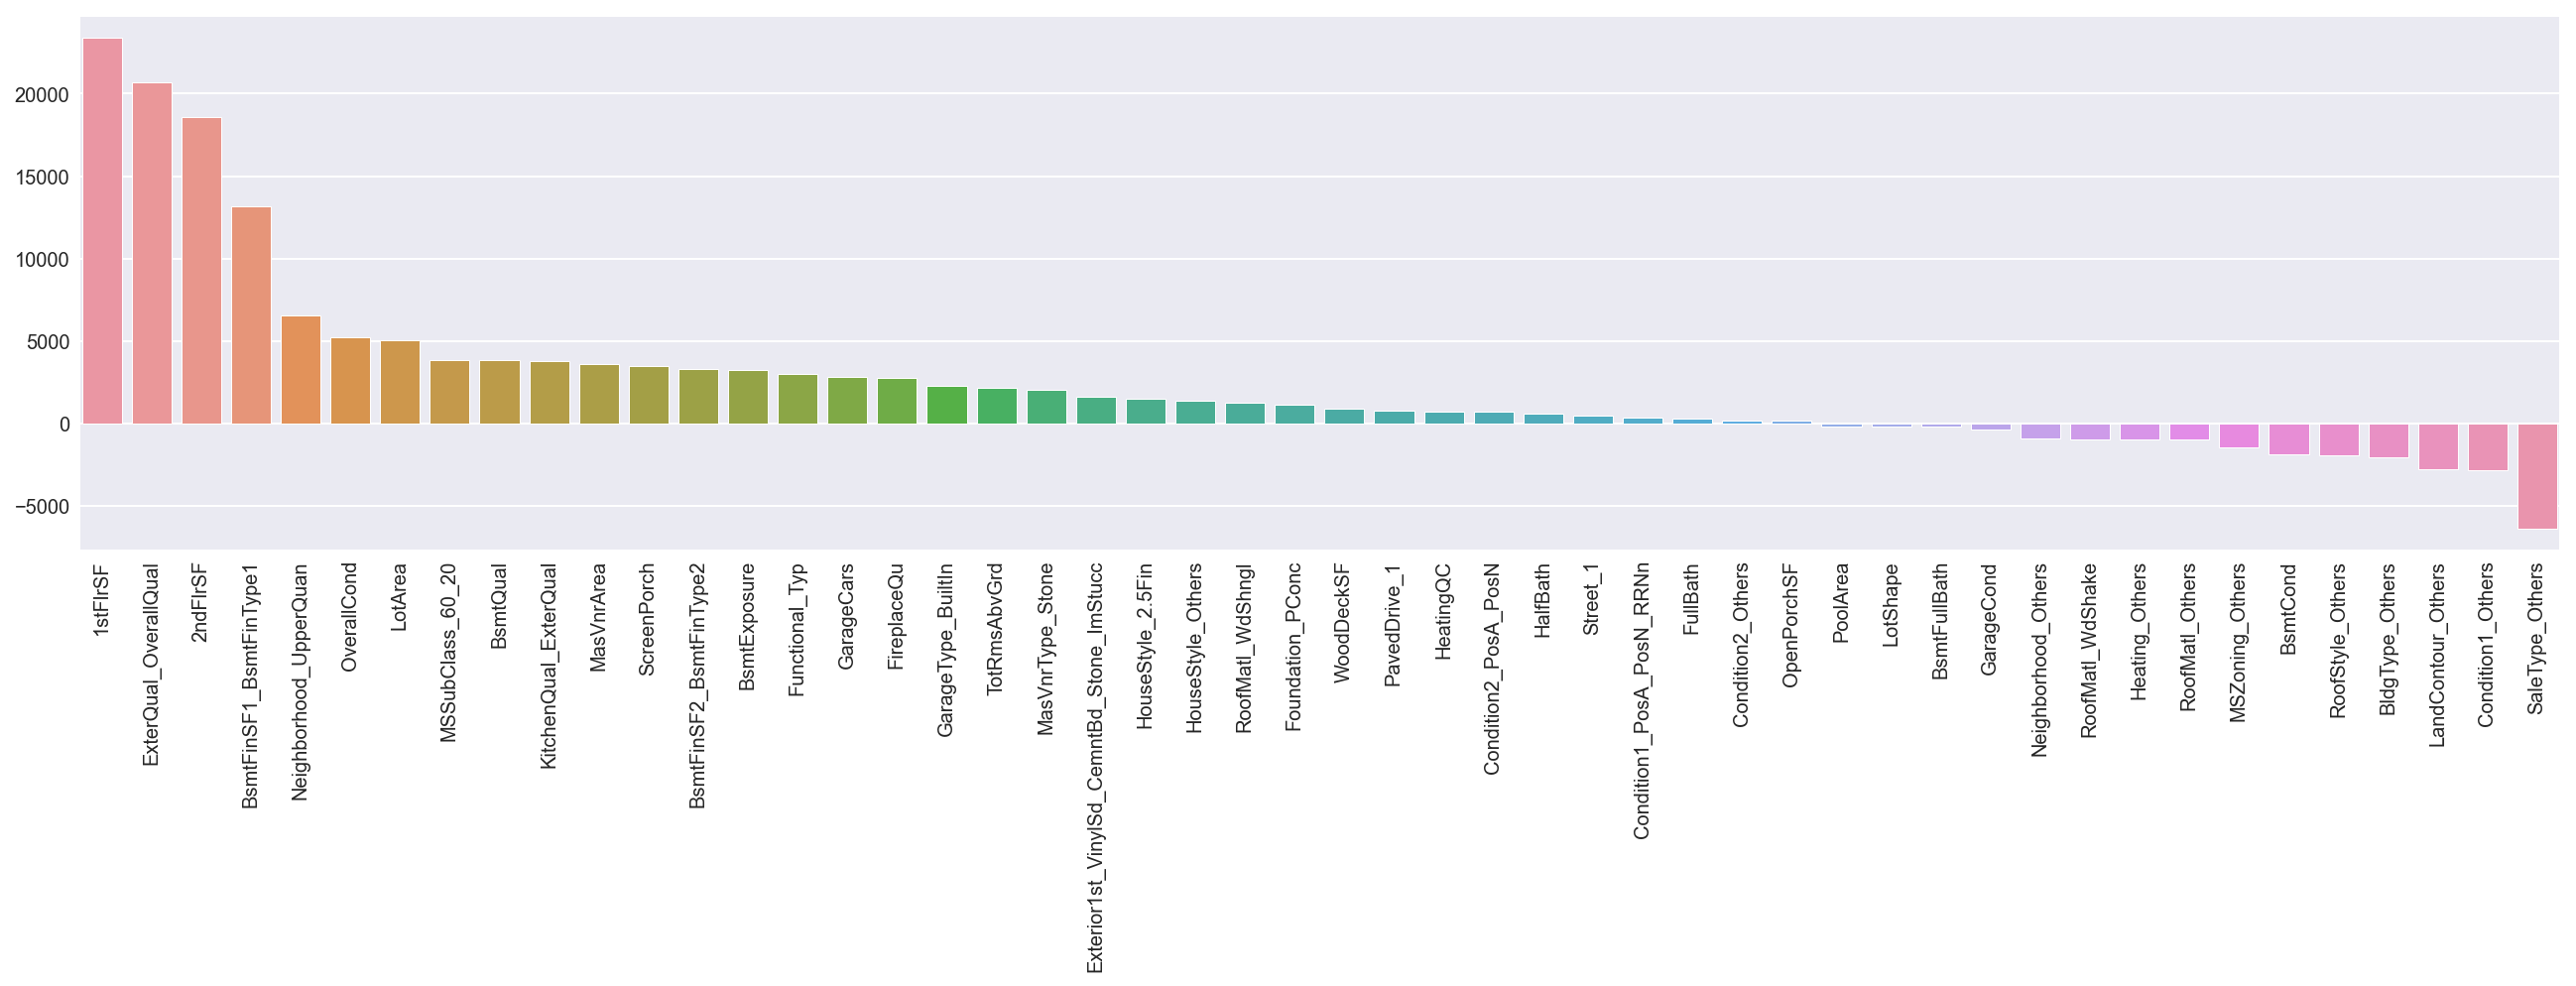

In [74]:
# Run linear, ridge and lasso
model5_results = run_models(X5, y5);

In [75]:
model5_results

Optimal alpha  Training RMSE  Testing RMSE  \
Linear            NA   23437.190676  24197.615645   
Ridge      23.101297   23463.149029  24279.572765   
Lasso     132.194115   23453.947947  24160.101499   

        Testing RMSE - Training RMSE  Training Cross Validation RMSE  
Linear                    760.424969                    24879.443834  
Ridge                     816.423736                    24839.733935  
Lasso                     706.153552                    24859.318180

#### Model Evaluation
1. The ridge model, with a cross validation RMSE of 24839, performs the best among the models ran. This means that the average price difference between the prediction and the actual sale price is \$24,839. Compared to Model 4, the cross validation RMSE reduced significantly by about 986 (4% reduction).
2.  It is also observed that the difference between the testing RMSE and training RMSE ranges from 700 to 800 (about 3% of the training RMSE). This means that the model performed well in predicting the test data.
3. It can be concluded that while the columns dropped and new engineered features helped in reducing the RMSE of the model, it is as good in predicting the sale price as Model 4 (considering only 1% increase in the difference between testing and training RMSE). 



### Overview of all models

|Model|Description|Value of $\alpha$|Related Model|Training RMSE|Testing RMSE|Training Cross Validation RMSE|
|-|-|-|-|-|-|-|
|<center>Model 1 (lr_base): <br />Simple Linear Regression Model|<center>NA|<center>NA|<center>**Baseline Model**|<center>28446|<center>27062|<center>33517|
|<center>Model 2 (ridge_base): <br />Ridge Model|<center>NA|<center>335|<center>NA|<center>29084|<center>27557|<center>31493|
|<center>Model 3 (lasso_base): <br />Lasso Model|<center>NA|<center>534|<center>NA|<center>28830|<center>26463|<center>31961|
|<center>Model 4: <br />Ridge Model|<center>With outliers removed, <br />Zero Lasso Coefficient features removed|<center>266|<center>Model 2|<center>24354|<center>25070|<center>25825|
|<center>Model 5: <br />Ridge Model|<center>Engineered new features, <br />Zero Lasso Coefficient features removed|<center>23|<center>Model 4|<center>23463|<center>24280|<center>24840|
    

### Evaluation
1. Of all the models created, Model 5 (Ridge Model) performed the best based on the lowest Training Cross Validation RMSE of 24840. This is a significant improvement from the Model 1 (Baseline Model), with a reduction of about 8700 RMSE (26% reduction).
2. The difference in the testing and training RMSE also reduced from about 1400 (Model 1) to about 800 (Model 5) (40% reduction).
3. The model has a Training Cross Validation $R^2$ score of 90%. This means that 90% of the variability in SalePrice is explained by the features in Model 5.
4. The top 5 features in terms of absolute coefficients are `1stFlrSF`, `ExterQual_OverallQual` metric, `2ndFlrSF`, `BsmtFinSF1_BsmtFinType1` metric and `Neighborhood_UpperQuan`. This means that the price varies significantly with these features. For example, an increase in 1 $𝑓𝑡^2$  in first floor area corresponds to an increase in sale price of \$22,046, holding all else constant.
5. The improvement in the accuracy of the model is likely due to reduction in multi-colinearity in the model and eliminating of redundant features(features with zero or near zero coefficient), resulting in lower biasness and higher variance. 
6. It is recommended that Model 5 is the best Predicting Property Price model of all the models and will be proposed to the senior management to equip all consultants. 
7. LINEM assessment.
    - **Linear Relationships**: 
        - As seen from the scatterplots of individual features, there is a linear relationship with SalePrice in general.
    - **Independ error:** 
        - It is assumed that the errors are independent.
    - **Normally distributed errors**: 
        - It is observed from the histplot of residuals against frequency that the residual's are somewhat normally distributed around 0. 
    - **Equal variance of errors:** 
        - In the scatterplot of residual against predicted sale price, it is observed that range of error have equal variance up to about \$330k sale price and diverge slightly with increasing predicted sale price. This is likely due to the lack of data with higher sale price in the training set (refer to the boxplot for SalePrice).
        - The model is assessed to be accurate in predicting houses up to about S$330k.
    - **Multicollinearity/Independence of Predictors** 
        - Based on the heatmap, only one pair of features(`KitchenQual_ExterQual` and `ExterQual_OverallQual`) exhibits high correlation (>0.7). It is assessed that the predictors are mostly independent.

In [76]:
# Recap X5
X5.head()

LotArea  LotShape  OverallCond  MasVnrArea  BsmtQual  BsmtCond  \
0  13517.0         3            8       289.0         3         3   
1  11492.0         3            5       132.0         4         3   
2   7922.0         4            7         0.0         3         3   
3   9802.0         4            5         0.0         4         3   
4  14235.0         3            8         0.0         2         4   

   BsmtExposure  HeatingQC  1stFlrSF  2ndFlrSF  BsmtFullBath  FullBath  \
0             1          5     725.0     754.0             0         2   
1             1          5     913.0    1209.0             1         2   
2             1          3    1057.0       0.0             1         1   
3             1          4     744.0     700.0             0         2   
4             1          3     831.0     614.0             0         2   

   HalfBath  TotRmsAbvGrd  FireplaceQu  GarageCars  GarageCond  WoodDeckSF  \
0         1             6            0           2           3         0.0   
1         1             8            3           2           3         0.0   
2         0             5            0           1           3         0.0   
3         1             7            0           2           3       100.0   
4         0             6            0           2           3         0.0   

   OpenPorchSF  ScreenPorch  PoolArea  MSZoning_Others  Street_1  \
0         44.0          0.0       0.0                0         1   
1         74.0          0.0       0.0                0         1   
2         52.0          0.0       0.0                0         1   
3          0.0          0.0       0.0                0         1   
4         59.0          0.0       0.0                0         1   

   LandContour_Others  Neighborhood_Others  Neighborhood_UpperQuan  \
0                   1                    0                       0   
1                   1                    1                       0   
2                   1                    1                       0   
3                   1                    1                       0   
4                   1                    1                       0   

   Condition1_Others  Condition1_PosA_PosN_RRNn  Condition2_Others  \
0                  1                          0                  0   
1                  0                          0                  0   
2                  0                          0                  0   
3                  0                          0                  0   
4                  0                          0                  0   

   Condition2_PosA_PosN  BldgType_Others  HouseStyle_2.5Fin  \
0                     0                0                  0   
1                     0                0                  0   
2                     0                0                  0   
3                     0                0                  0   
4                     0                0                  0   

   HouseStyle_Others  RoofStyle_Others  RoofMatl_Others  RoofMatl_WdShake  \
0                  0                 1                0                 0   
1                  0                 1                0                 0   
2                  0                 1                0                 0   
3                  0                 1                0                 0   
4                  1                 1                0                 0   

   RoofMatl_WdShngl  Exterior1st_VinylSd_CemntBd_Stone_ImStucc  \
0                 0                                          0   
1                 0                                          1   
2                 0                                          1   
3                 0                                          1   
4                 0                                          0   

   MasVnrType_Stone  Foundation_PConc  Heating_Others  Functional_Typ  \
0                 0                 0               0               1   
1                 0                 1 

In [77]:
# Recap y5
y5.head()

0    130500.0
1    220000.0
2    109000.0
3    174000.0
4    138500.0
Name: SalePrice, dtype: float64

In [78]:
# verify the size of X, y
X5.shape, y5.shape

((2049, 50), (2049,))

In [79]:
# Create train/test splits.
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [80]:
# Check shape of Xs
X5_train.shape, X5_test.shape

((1639, 50), (410, 50))

In [81]:
# Check shape of ys
y5_train.shape, y5_test.shape

((1639,), (410,))

#### Standard Scaling

In [82]:
# Scale our data.
ss_5 = StandardScaler()
X5_train_sc = ss_5.fit_transform(X5_train)
X5_test_sc = ss_5.transform(X5_test)

#### Create Model 5: Ridge Model

In [83]:
# Fit model using optimal value of alpha
ridge_5 = Ridge(alpha=23.101297)
ridge_5.fit(X5_train_sc, y5_train);

# generate predictions based on X_test set. 
y5_pred_train = ridge_5.predict(X5_train_sc)

# generate predictions based on X_test set. 
y5_pred_test = ridge_5.predict(X5_test_sc)

#### Assessment on coefficients
1. The coefficient ranges from -6263 to 22046. 
2. The top 5 features in terms of absolute coefficients are `1stFlrSF`, `ExterQual_OverallQual` metric, `2ndFlrSF`, `BsmtFinSF1_BsmtFinType1` and `Neighborhood_UpperQuan`. This means that the price varies significantly with these features. For example, an increase in 1$ft^2$ in first floor area corresponds to an increase in sale price of \$22,046,  holding all else constant. Refer to bar plot below.
3. Given the high correlation between 

In [84]:
# Display the model coefficient
ridge5_coef_df = pd.DataFrame(data=ridge_5.coef_, 
                              index=X5_train.columns, 
                              columns=['ridge5_coef']).sort_values(by='ridge5_coef', ascending=False)
ridge5_coef_df.head()

ridge5_coef
1stFlrSF                 22046.370580
ExterQual_OverallQual    18892.720160
2ndFlrSF                 16942.572595
BsmtFinSF1_BsmtFinType1  13189.840051
Neighborhood_UpperQuan    6528.339494

In [85]:
# Describe the coefficient.
ridge5_coef_df.describe()

ridge5_coef
count     50.000000
mean    2415.625883
std     5268.177097
min    -6263.772430
25%     -354.561067
50%     1163.371111
75%     3427.465978
max    22046.370580

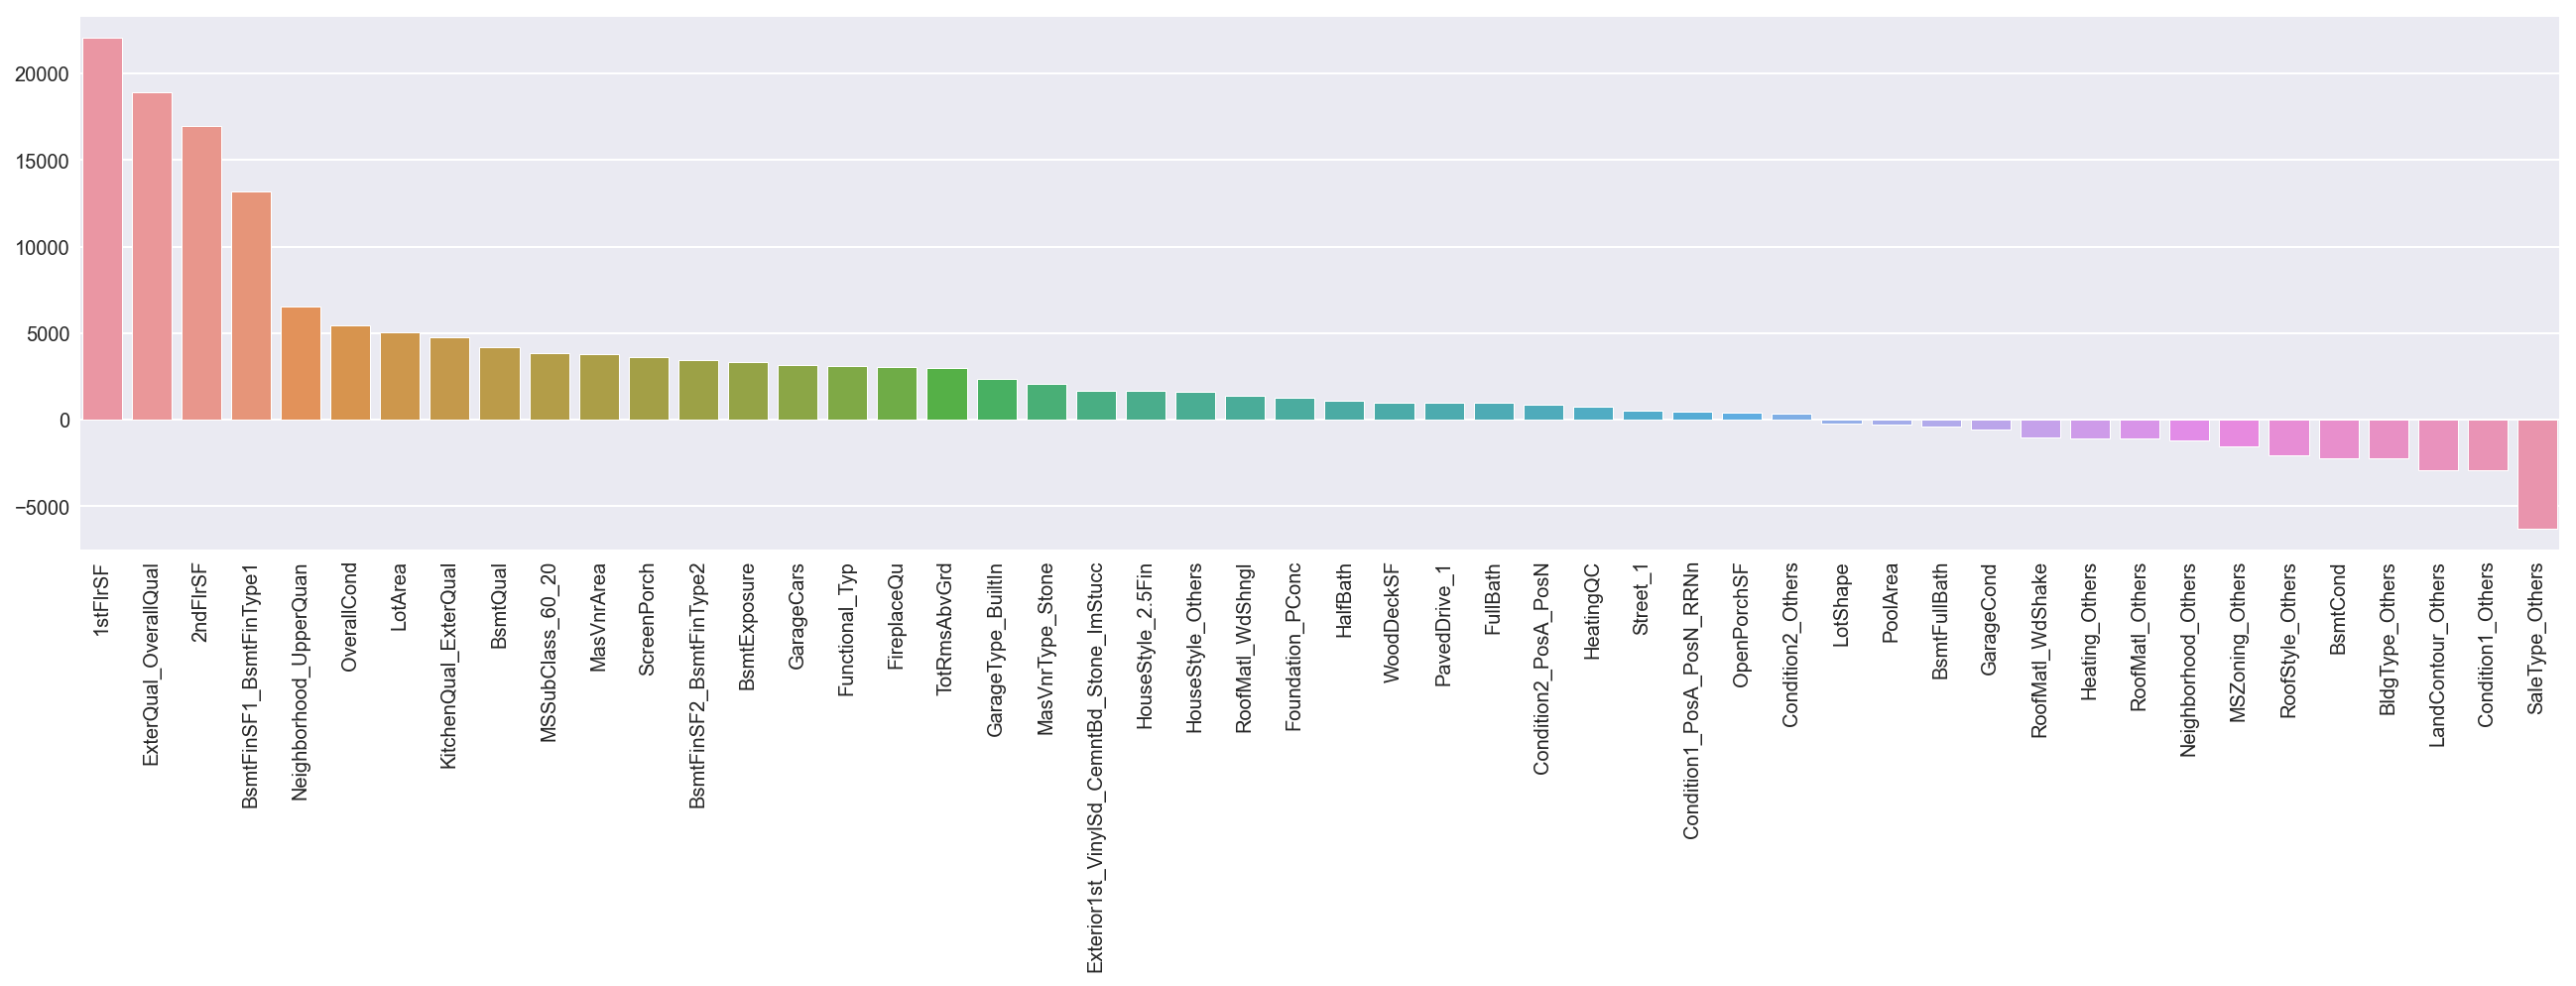

In [86]:
# Visualise the coefficient distribution
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(data=ridge5_coef_df.T);

In [87]:
# Get top 5 absolute coefficient in terms of absolute value. 
abs(ridge5_coef_df).sort_values(by='ridge5_coef', ascending=False).head()

ridge5_coef
1stFlrSF                 22046.370580
ExterQual_OverallQual    18892.720160
2ndFlrSF                 16942.572595
BsmtFinSF1_BsmtFinType1  13189.840051
Neighborhood_UpperQuan    6528.339494

#### Plots Analysis

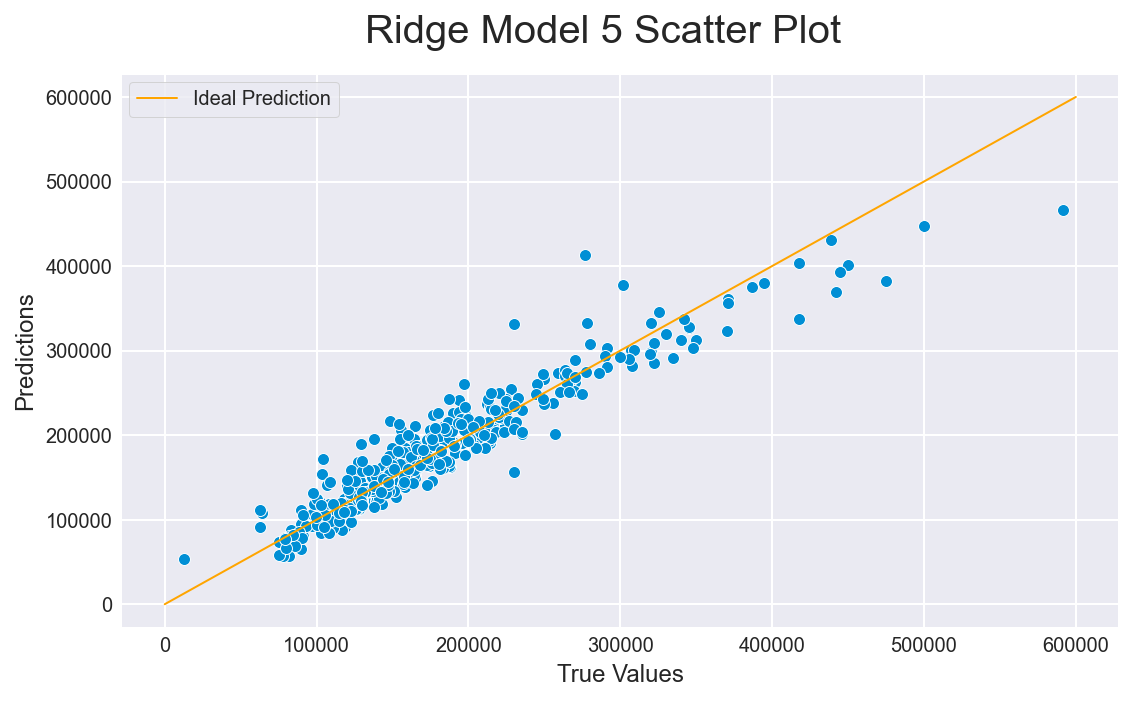

In [88]:
# Plot true values and predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y5_test, y=y5_pred_test)
sns.lineplot(x=[0, 600000], y=[0, 600000], linewidth=1, color='orange', label='Ideal Prediction')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Ridge Model 5 Scatter Plot", size=20)
plt.subplots_adjust(top=.9)
plt.legend()
plt.show()

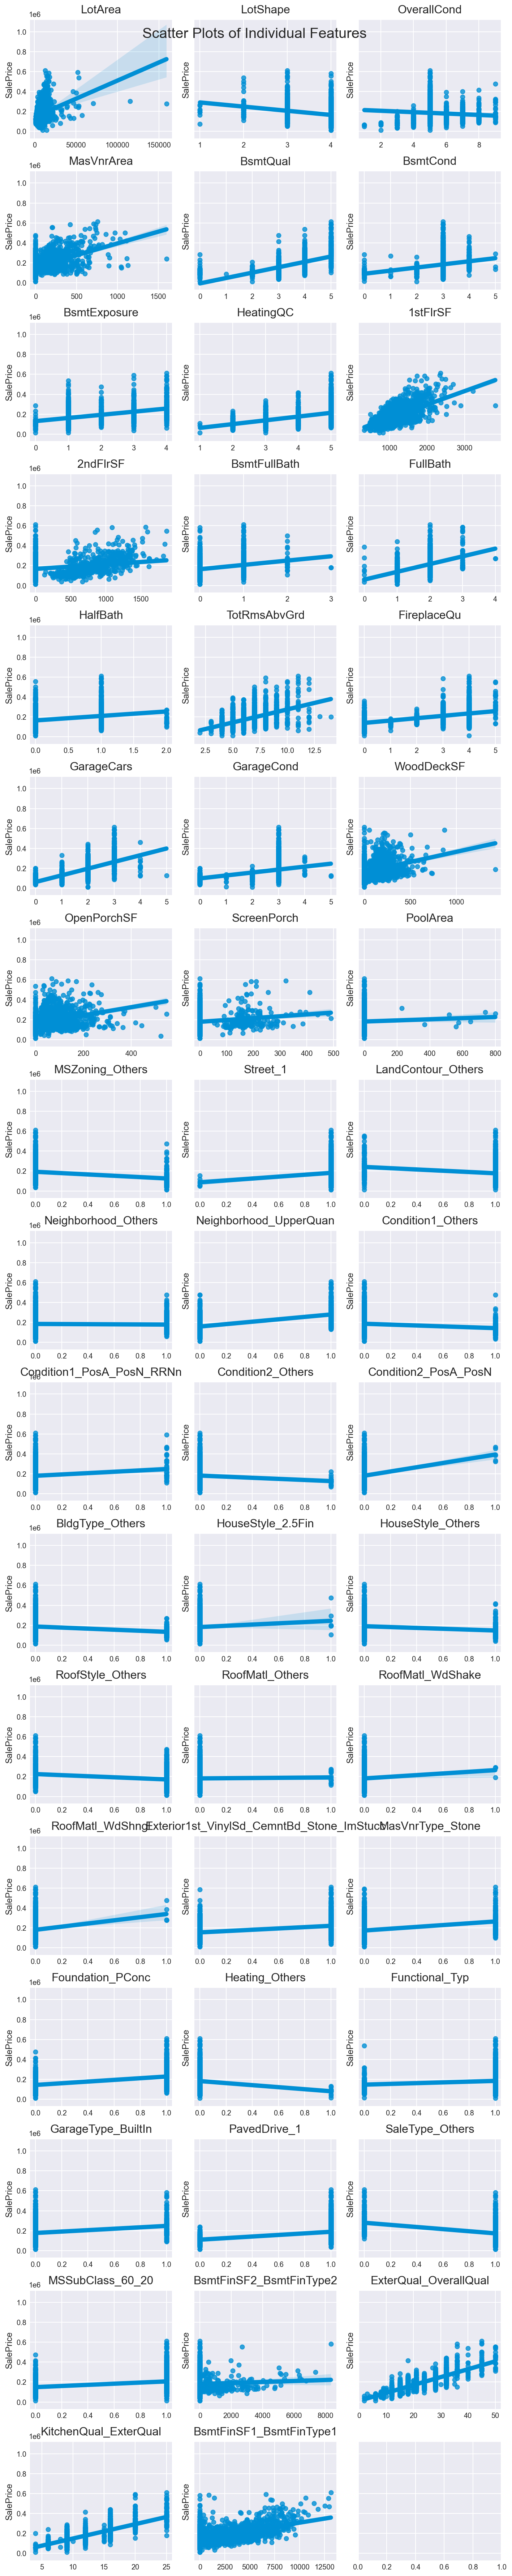

In [89]:
# L: Relationship between features and sale price is linear in general.
# PLot 'LotArea' against 'SalePrice' to check for linearity. 
subplot_regplot(dataframe=X5, 
                y_value=y5, 
                list_of_columns=X5.columns, 
                list_of_titles=X5.columns, 
                list_of_xlabels=['']*len(X5.columns), 
                ylabels='SalePrice', 
                plot_title='Scatter Plots of Individual Features', 
                figsize=(10,50));

In [90]:
# I: Features are generally independent of each other
# It is assume that observations are independent from each other. 

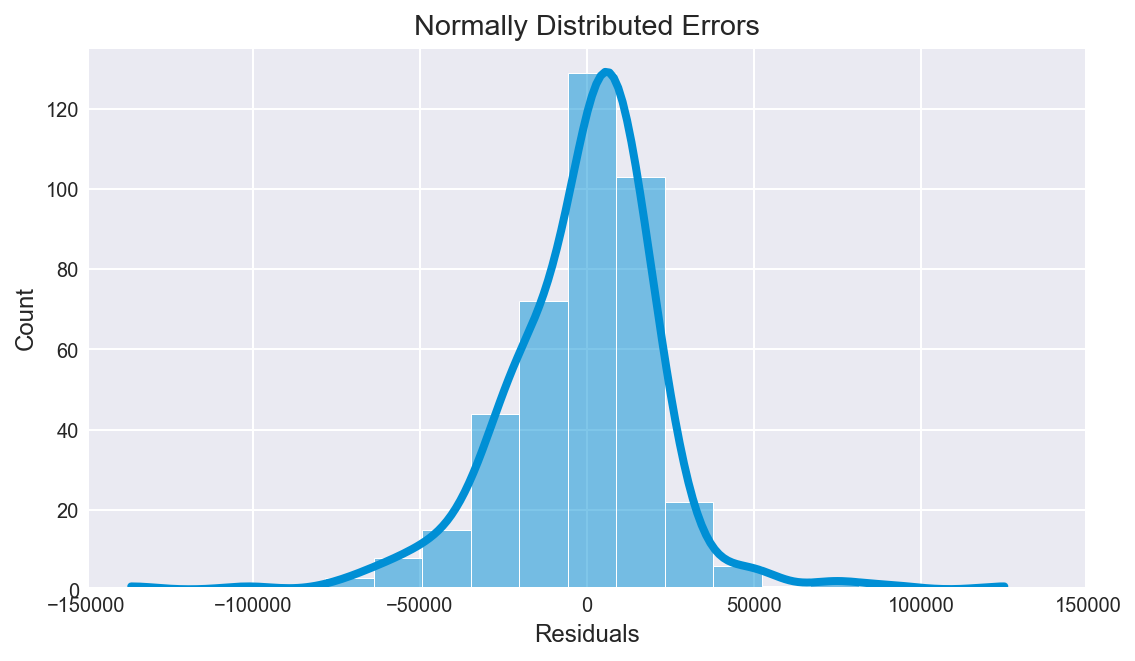

In [91]:
# N: Normally distributed errors
resids5 = y5_test-y5_pred_test

plt.figure(figsize=(8,5))
sns.histplot(resids5, bins=18, kde=True);
plt.xlabel('Residuals')
plt.title('Normally Distributed Errors')
plt.xlim(-150000, 150000);

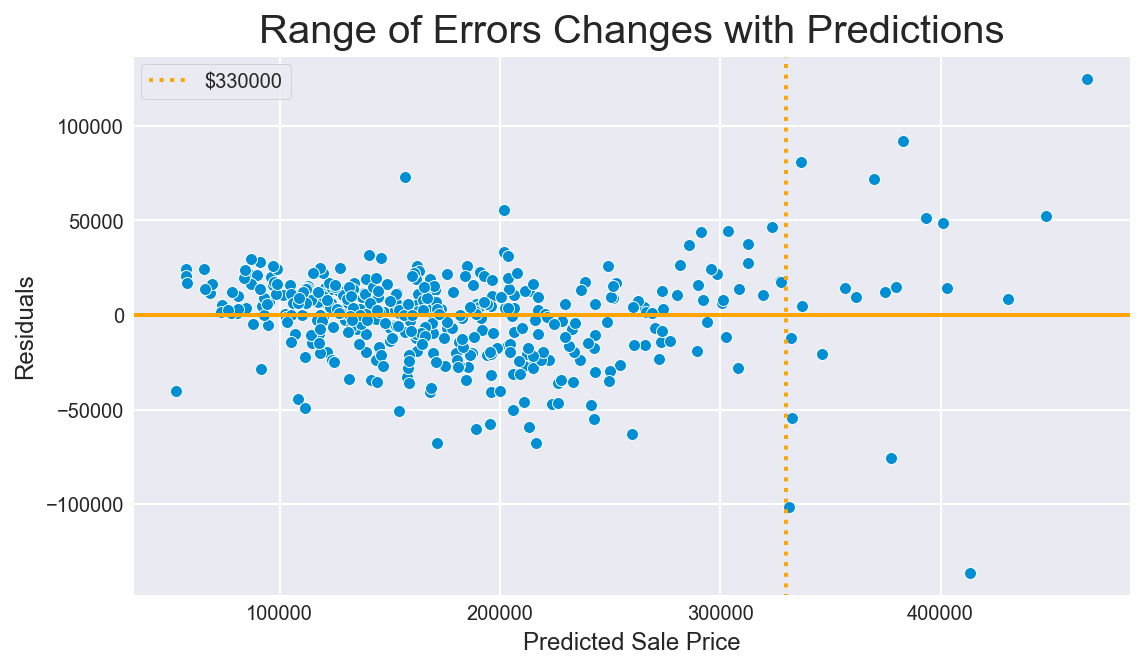

In [92]:
# E: Range of errors changes slightly. 
plt.figure(figsize=(8,5))
sns.scatterplot(x=y5_pred_test, y=resids5);
plt.axhline(0, color="orange", linewidth=2);
plt.axvline(330000, color="orange", linestyle=':',linewidth=2, label='$330000');
plt.xlabel("Predicted Sale Price");
plt.ylabel("Residuals");
plt.legend()
plt.title('Range of Errors Changes with Predictions', size=20);

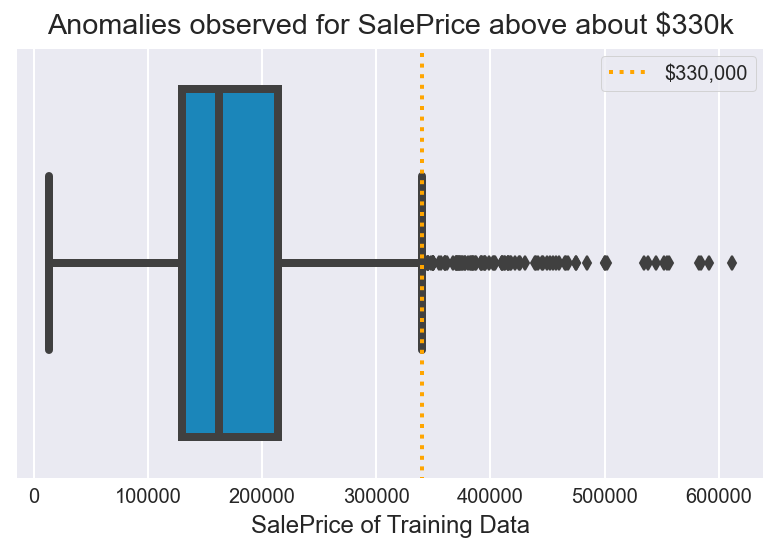

In [93]:
sns.boxplot(data=train['SalePrice'], orient='horizontal');
plt.axvline(340000, color="orange", linestyle=':',linewidth=2, label='$330,000');
plt.xlabel('SalePrice of Training Data');
plt.title('Anomalies observed for SalePrice above about $330k')
plt.legend()
plt.yticks([]);

From the heatmap below, the darker red and blue cell indicate that there are still some features that have significant correlation. 

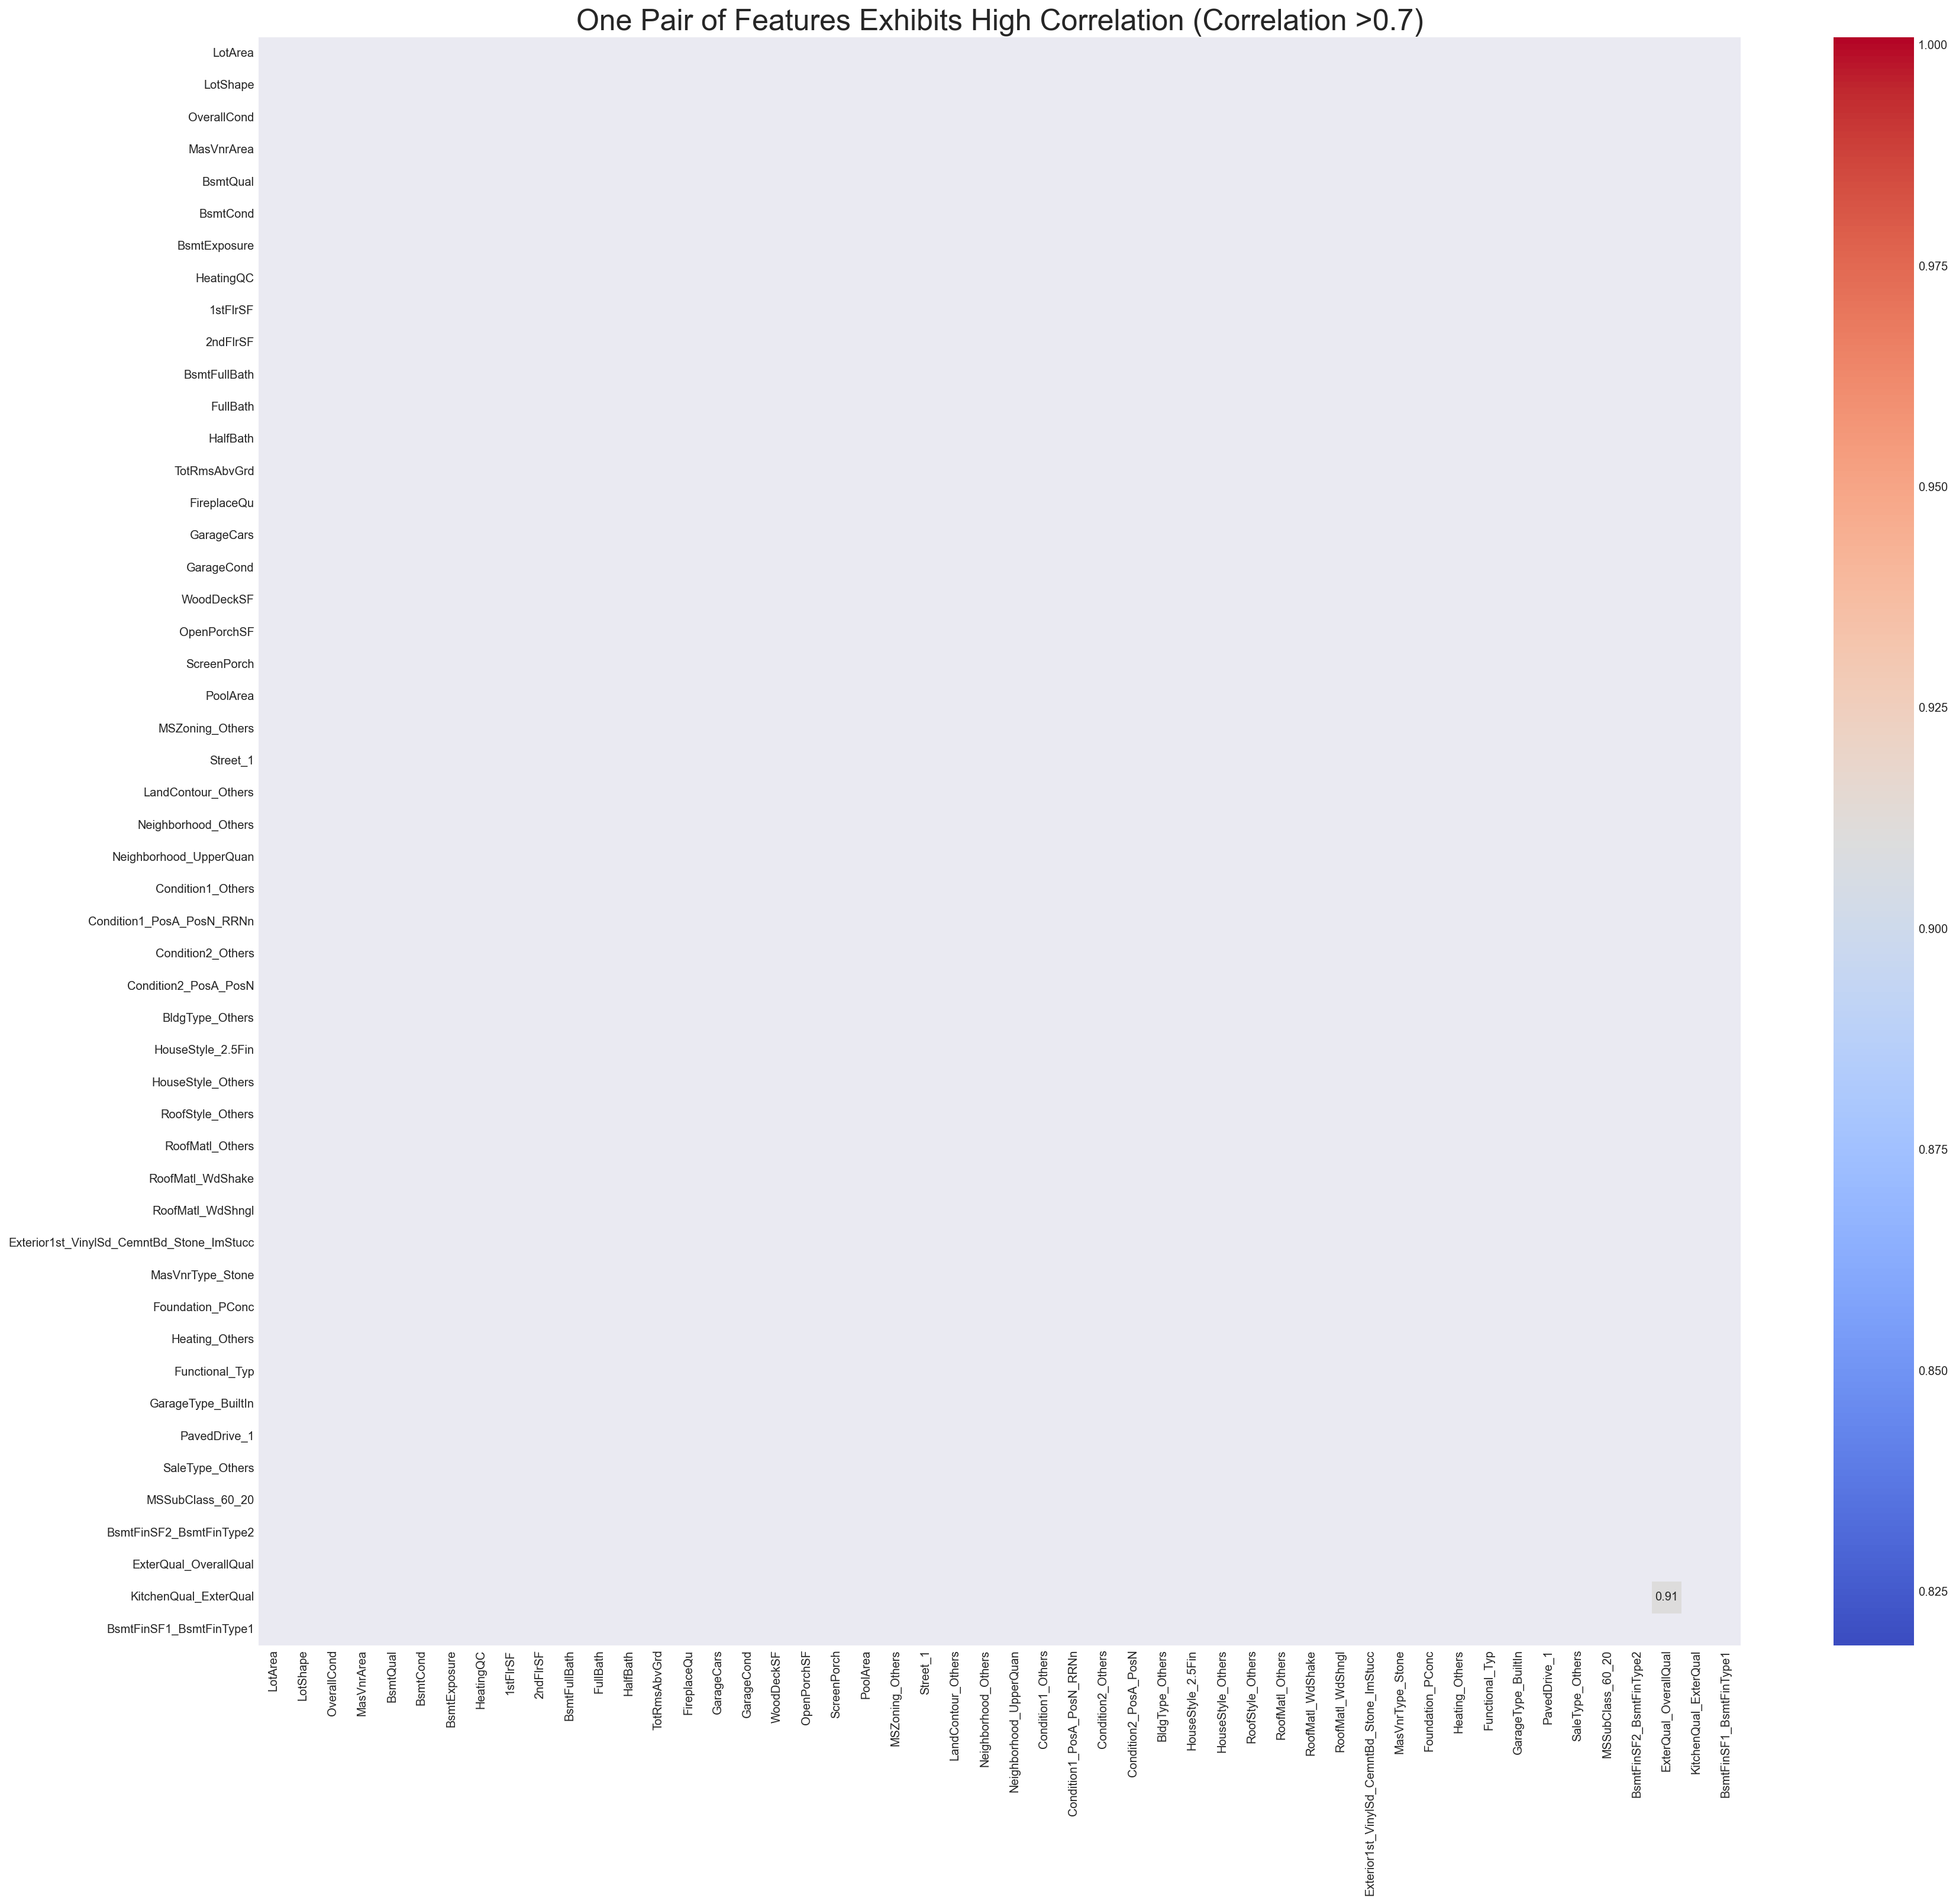

In [94]:
# M - Multicollinearity/Independence of Predictors still exist in the data set.
mask = np.zeros_like(X5.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 25))
plt.title('One Pair of Features Exhibits High Correlation (Correlation >0.7)', fontsize=25)
sns.heatmap(X5.corr()[abs(X5.corr())>0.7], cmap='coolwarm', annot=True, mask = mask);

#### Scoring the Model

Scoring is based on Root Mean Square Error (RMSE). It is a metric that compute the average distance between the predicted values from the model and the actual values in the dataset.

**RMSE**

In [95]:
# Compute RMSE score on the X_train data set 
np.sqrt(metrics.mean_squared_error(y5_train, y5_pred_train))

23463.149028711974

In [96]:
# Compute RMSE score on the X_test data set 
np.sqrt(metrics.mean_squared_error(y5_test, y5_pred_test))

24279.572764914385

In [97]:
# Compute cross_val_score (RMSE) on the X_train data set 
np.sqrt(-1*cross_val_score(ridge_5, X5_train_sc, y5_train, cv=5, scoring='neg_mean_squared_error')).mean()

24839.73393472245

**$R^2$**

In [98]:
# Compute R2 score on the X_train data set 
ridge_5.score(X5_train_sc, y5_train)

0.9134786355413109

In [99]:
# Compute R2 score on the X_test data set 
ridge_5.score(X5_test_sc, y5_test)

0.9011737433181854

In [100]:
# Compute cross_val_score (R2) on the X_train data set 
cross_val_score(ridge_5, X5_train_sc, y5_train, cv=5).mean()

0.901540846035429

---
## 3. Recommendations and Future Works

### Proposed Predicting Property Price Model: Model 5

The project proposed the adoption of Model 5 to the Senior Management Team of the agency.
1. The model has significant coefficient(change of more than \$5000 in saleprice against an unit change in the features) for last than 10 features despite having 50 features.
2. The model has a low RMSE (about \$25k between predicted price and true price). 
3. The features in the model is able to explain up to 90% of the variability in SalePrice.
4. The top 5 features in terms of absolute coefficients are `1stFlrSF`, `ExterQual_OverallQual` metric, `2ndFlrSF`, `BsmtFinSF1_BsmtFinType1` metric and `Neighborhood_UpperQuan`. This means that the price varies significantly with these features. 
    - Looking at the top 3 features, it is evident that the bigger the property (1stFlrSF and 2ndFlrSF, as well as BsmtFinSF1_BsmtFinType1) will likely have a higher selling price. Seller of such house should renovate it so that the ExterQual and OverallQual are good to increase selling price.
    - It is an added bonus if the house is located in neighborhoods where median selling price is above the 75% quantile of the selling price distribution. They are: 'ClearCr', 'GrnHill', 'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Veenker'.  

### Future Work to Improve Accuracy (Reduce RMSE) of the Model
1. The range of error have equal variance up to about \\$330k sale price and diverge slightly with increasing predicted sale price. This is likely due to the lack of data with higher sale price in the training set. Future work include gather data for sale price more than \\$330k to increase the accuracy of the model. 
2. Multi-colinearity in one pair of features: `KitchenQual_ExterQual` and `ExterQual_OverallQual` (high correlation of 0.91). In addition, both features have significant coefficient in the model. Further analysis should be considered in future work. 
3. Review of sub-categories in Nominal Data types as they seem to display notable coefficients. 
4. Analysis on sale price based on time. As the year sold was dropped after translating it into property age, the model does not take into consideration the trends in recent transanction. Property age was also subsequently dropped after Lasso assigned coefficient of zero to it.  

---
## 4. Processing of Test Data for Kaggle Submission
The test dataframe needs to be processed (create dummy variables, scaled etc) to predict the sale price. Sale prices will be predicted based on the optimised model identified earlier: **Model 5: Ridge Model**.

### Dummy Variables
Dummy variables were generated in the earlier section of the notebook, [here](#Dummy-Variables).

### Preparing Kaggle Test Data 

In [101]:
# assign X variable
X_kaggletest = test.drop(columns=['Id'])

In [102]:
X_kaggletest.head()

LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   9142.0         4            6            8         0.0          3   
1   9662.0         3            5            4         0.0          3   
2  17104.0         3            7            5         0.0          4   
3   8520.0         4            5            6         0.0          4   
4   9500.0         3            6            5       247.0          3   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          2         2         3             1             1         0.0   
1          3         4         3             1             1         0.0   
2          3         4         4             3             6       554.0   
3          3         3         3             1             1         0.0   
4          3         4         3             1             4       609.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0             1         0.0     1020.0          4     908.0    1020.0   
1             1         0.0     1967.0          3    1967.0       0.0   
2             1         0.0      100.0          5     664.0     832.0   
3             1         0.0      968.0          3     968.0       0.0   
4             1         0.0      785.0          4    1394.0       0.0   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           0.0             0             0         2         0             4   
1           0.0             0             0         2         0             6   
2           0.0             1             0         2         1             3   
3           0.0             0             0         1         0             2   
4           0.0             1             0         1         1             3   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            2             9           0            0             1   
1            3            10           0            0             3   
2            4             7           1            4             2   
3            3             5           0            0             1   
4            3             6           2            4             2   

   GarageCars  ...  LandContour_Others  Neighborhood_Others  \
0           1  ...                   1                    0   
1           2  ...                   1                    0   
2           2  ...                   1                    1   
3           2  ...                   1                    0   
4           2  ...                   1                    1   

   Neighborhood_UpperQuan  Condition1_Others  Condition1_PosA_PosN_RRNn  \
0                       0                  0                          0   
1                       0                  0                          0   
2                       0                  0                          0   
3                       0                  0                          0   
4                       0                  0                          0   

   Condition2_Others  Condition2_PosA_PosN  BldgType_Others  \
0                  0                     0                1   
1                  0                     0                1   
2                  0                     0                0   
3                  0                     0                0   
4                  0                     0                0   

   HouseStyle_2.5Fin  HouseStyle_Others  RoofStyle_Others  RoofMatl_Others  \
0                  0                  0                 1                0   
1                  0                  0                 1                0   
2                  0                  0                 1                0   
3                  0                  0                 1                0   
4                  0                  0                 1                0   

   RoofMatl_WdShake  RoofMatl_WdShngl  \
0                 0                

In [103]:
# Drop zero_coef_features in X.
X_kaggletest = X_kaggletest.drop(columns=zero_coef_features)

In [104]:
# Drop EnclosedPorch, 3SsnPorch and PoolQC columns
X_kaggletest = X_kaggletest.drop(columns=['EnclosedPorch', '3SsnPorch', 'PoolQC'])

In [105]:
# create new features.
X_kaggletest['BsmtFinSF2_BsmtFinType2'] = X_kaggletest['BsmtFinSF2']*X_kaggletest['BsmtFinType2']
X_kaggletest['ExterQual_OverallQual'] = X_kaggletest['ExterQual']*X_kaggletest['OverallQual']
X_kaggletest['KitchenQual_ExterQual'] = X_kaggletest['KitchenQual']*X_kaggletest['ExterQual']
X_kaggletest['BsmtFinSF1_BsmtFinType1'] = X_kaggletest['BsmtFinSF1']*X_kaggletest['BsmtFinType1']

In [106]:
# drop unnecessary features
X_kaggletest.drop(columns=['BsmtFinSF2', 'BsmtFinType2', 'ExterQual', 'OverallQual', 
                           'KitchenQual', 'ExterQual', 'BsmtFinSF1', 'BsmtFinType1'], 
                  inplace=True)

In [107]:
# Verify dataframe shape is compatible. 
X_kaggletest.shape, X5_train.shape

((878, 50), (1639, 50))

### Standard Scaling

In [108]:
# Scale our data.
ss_kaggletest = StandardScaler()

# Fit training data set
X5_train_sc = ss_kaggletest.fit_transform(X5_train)

# Scale kaggle test Data
X_kaggletest_sc = ss_kaggletest.transform(X_kaggletest)


In [109]:
# Scale our test data.
X_kaggletest_sc = ss_kaggletest.transform(X_kaggletest)

### Re-create Model 5: Ridge Model
Model was recreated under [Evaluation](#Evaluation).

### Predict Sale Price


In [110]:
# generate predictions based on X5_train_sc set. 
y5_pred_train = ridge_5.predict(X5_train_sc)

# generate predictions based on X_kaggletest_sc set. 
y_pred_kaggletest = ridge_5.predict(X_kaggletest_sc)

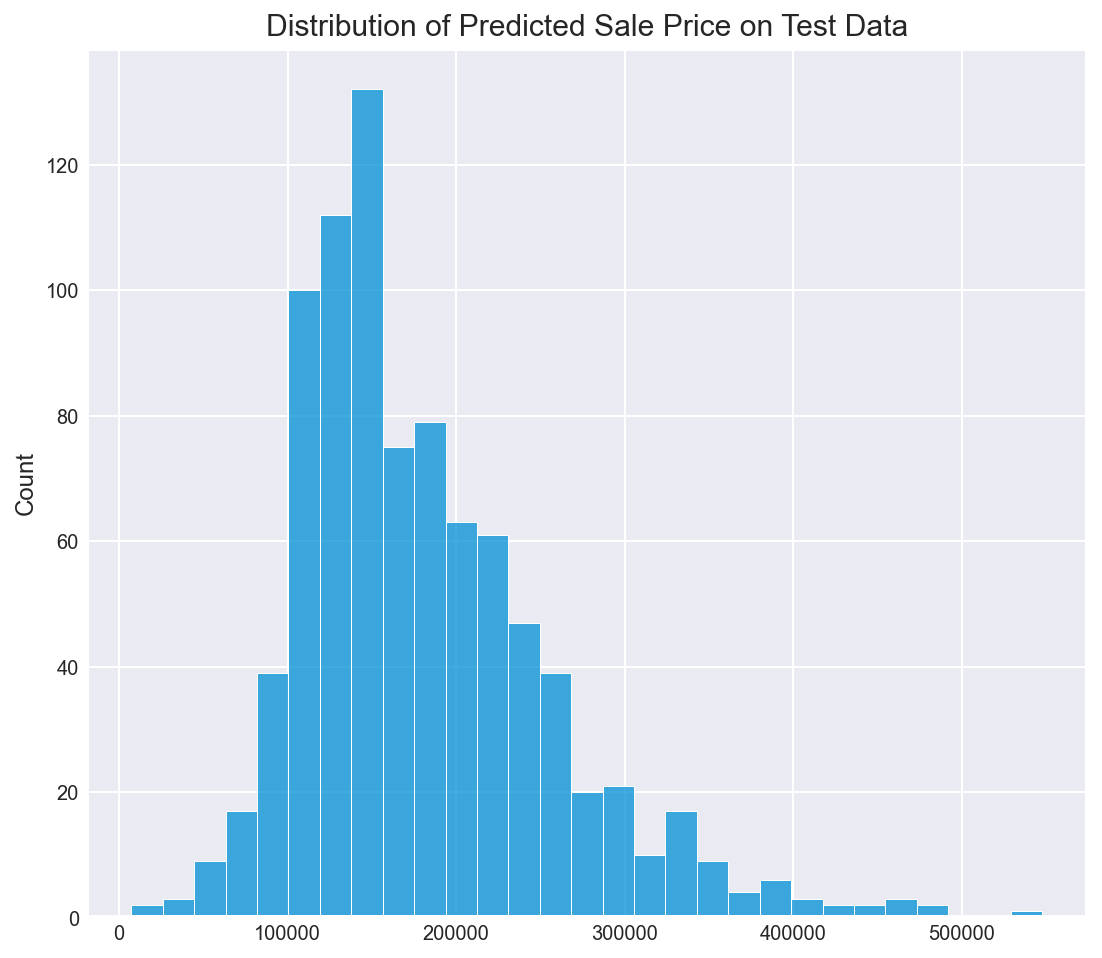

In [111]:
# Visualising predicted sale price
plt.figure(figsize=(8,8))
plt.title('Distribution of Predicted Sale Price on Test Data', size=15)
sns.histplot(y_pred_kaggletest);

### Preparation Kaggle Submissions csv File


In [112]:
# Create dataframe for Sale Price
kaggle_submission = pd.DataFrame(y_pred_kaggletest, columns=['SalePrice'])
kaggle_submission.head()

SalePrice
0  142850.553989
1  159445.777936
2  231855.785902
3  107516.046531
4  179699.395540

In [113]:
# Verify dataframe info.
kaggle_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  878 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [114]:
# format kagglesubmission to include 'ID'
kaggle_submission['Id'] = test['Id']
kaggle_submission = kaggle_submission[['Id', 'SalePrice']]

In [115]:
# Display first few rows of dataframe
kaggle_submission.head()

Id      SalePrice
0  2658  142850.553989
1  2718  159445.777936
2  2414  231855.785902
3  1989  107516.046531
4   625  179699.395540

In [116]:
# Save as csv.
kaggle_submission.to_csv('../datasets/kaggle_submission.csv', index=False)

### Kaggle Submissions Result

![](../images/kaggle_score.png)
- Public:  28944.37892
- Private: 22833.12214

## 5. Conclusion

The solution to the buyer and sellers should be customised based on their desires and budget. 

The Ridge Model 5 developed in the project is able to explain 90% of the variability in SalePrice of past transaction and has low RMSE of about $25k between predicted price and true price. 
- It will help buyer/seller to consider the total cost of buying and selling the property and adjusts their requirements accordingly, e.g. buy a poor quality property then renovate to increase its valuation or buy a good quality property with minimal renovation needed. 
- It also serve as a tool to provide a reference price to both seller and buyer so that both may agree on a common price. 
- It also provide the significance of features which contributes to the sale price. The top 5 factors for buyer and seller to consider when buying/selling a house are `1stFlrSF`, `ExterQual_OverallQual` metric, `2ndFlrSF`, `BsmtFinSF1_BsmtFinType1` metric and `Neighborhood_UpperQuan`, which affect the sale price significantly.

# <center> End of Notebook